In [1]:
import seaborn as sns; sns.set()
sns.set(color_codes=True)
sns.set(font_scale=1.2)


import utilities
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, jaccard_score, hamming_loss, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.utils.multiclass import unique_labels

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterSampler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline, make_union
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

# CLASSIFIERS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

#REGRESSORS
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor


from scipy.spatial.distance import cdist, pdist
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn import (manifold, decomposition, ensemble,
                     discriminant_analysis, random_projection)

import statistics
#plt.style.use('seaborn')

import numpy as np
import tensorflow as tf

from scipy.linalg import lu
from scipy.linalg import solve

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


SEED = 3
import os
import random as rn

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
rn.seed(SEED)

name_prefix = 'condensed'


In [2]:
# Data preparation
def data_preparation():
    
    MXene = MXene.strip()
    MXene = MXene.replace(' ', '')
    elements = MXene.split('2', 1)
    M = elements[0]
    X = elements[1][0]
    T = elements[1][1:]
    print(M, X, T)

In [3]:
# Evaluation
def multi_output_score(test, pred):
    true = 0
    for i in range(len(test)):
        if test[i]==pred[i]:
            true = true + 1
    return true/len(test)

In [4]:
# load data from csv file
def load_data(filename='data.csv'):
    X_df = pd.read_csv(filename)
    X_df = X_df.fillna(0)
    return X_df

In [5]:
def evaluation(true, pred):
    index_abs = 0
    jaccard_score_list = []
    hamming_score_list = []
    f1_score_list = []
    precision_score_list = []
    recall_score_list = []
    pred = pred.tolist()
    for row in true:
        single_score = jaccard_score(row, pred[index_abs], average='micro')
        hammung_score = hamming_loss(row, pred[index_abs])
        recall = recall_score(row, pred[index_abs], average='micro')
        precision = precision_score(row, pred[index_abs], average='micro')
        f1 = f1_score(row, pred[index_abs], average='micro')
        jaccard_score_list.append(single_score)
        hamming_score_list.append(hammung_score)
        precision_score_list.append(precision)
        recall_score_list.append(recall)
        f1_score_list.append(f1)
        index_abs = index_abs + 1
    return jaccard_score_list, hamming_score_list, f1_score_list, precision_score_list, recall_score_list


## Load data and preprocess

In [6]:
import pandas as pd

X_df = load_data('Gold_dataset/Au_nanoparticle_dataset.csv')
X_df.describe()

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4.000000e+03,4000.000000,4000.000000,...,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.000000,4000.000000
mean,2000.500000,615.000000,0.000055,8.200000,3476.786500,2521.550250,955.23625,5.885368e-26,16.436127,26.028875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12742.661846,851.243153
std,1154.844867,223.625808,0.000081,2.856929,3679.286769,2976.232459,721.87022,6.227819e-26,6.761951,9.822659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13690.999369,771.395830
min,1.000000,273.000000,0.000000,1.000000,236.000000,89.000000,137.00000,4.000000e-27,0.519100,9.665200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-53772.854000,0.000000
25%,1000.750000,410.500000,0.000000,7.000000,1061.000000,618.750000,437.00000,1.800000e-26,11.898975,18.570825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-16504.678000,334.640675
50%,2000.500000,598.000000,0.000000,10.000000,1867.000000,1199.000000,666.00000,3.160000e-26,14.914300,22.978850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6754.782950,553.118000
75%,3000.250000,785.500000,0.000100,10.000000,4503.000000,3183.000000,1301.75000,7.620000e-26,19.352375,34.207525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3786.450450,1107.184500
max,4000.000000,973.000000,0.000250,10.000000,14277.000000,11580.000000,3190.00000,2.420000e-25,35.136500,66.289500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-783.428590,4470.351000


In [7]:
# TODO: 5 cases 
feature_set_surface = ['N_surface', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1-10', 'Curve_11-20', 'Curve_21-30', 'Curve_31-40', 'Curve_41-50', 'Curve_51-60', 'Curve_61-70', 'Curve_71-80', 'Avg_surf', 'SCN_1', 'SCN_2', 'SCN_3', 'SCN_4', 'SCN_5', 'SCN_6', 'SCN_7', 'SCN_8', 'SCN_9', 'SCN_10', 'SCN_11', 'SCN_12', 'SCN_13', 'SCN_14', 'SCN_15', 'q6q6_S0', 'q6q6_S1', 'q6q6_S2', 'q6q6_S3', 'q6q6_S4', 'q6q6_S5', 'q6q6_S6', 'q6q6_S7', 'q6q6_S8', 'q6q6_S9', 'q6q6_S10', 'q6q6_S11', 'q6q6_S12', 'q6q6_S13']
feature_set_total = ['N_total', 'Volume', 'R_min', 'R_max', 'R_diff', 'R_avg', 'R_std', 'R_skew', 'R_kurt', 'Avg_total', 'TCN_1', 'TCN_2', 'TCN_3', 'TCN_4', 'TCN_5', 'TCN_6', 'TCN_7', 'TCN_8', 'TCN_9', 'TCN_10', 'TCN_11', 'TCN_12', 'TCN_13', 'TCN_14', 'TCN_15', 'TCN_16', 'TCN_17', 'Avg_bonds', 'Std_bonds', 'Max_bonds', 'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'q6q6_avg_total', 'q6q6_avg_bulk', 'q6q6_avg_surf', 'q6q6_T0', 'q6q6_T1', 'q6q6_T2', 'q6q6_T3', 'q6q6_T4', 'q6q6_T5', 'q6q6_T6', 'q6q6_T7', 'q6q6_T8', 'q6q6_T9', 'q6q6_T10', 'q6q6_T11', 'q6q6_T12', 'q6q6_T13', 'q6q6_T14', 'q6q6_T15']
feature_set_condensed = ['N_total', 'N_bulk', 'N_surface', 'Volume', 'R_min', 'R_max', 'R_diff', 'R_avg', 'R_std', 'R_skew', 'R_kurt', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1-10', 'Curve_11-20', 'Curve_21-30', 'Curve_31-40', 'Curve_41-50', 'Curve_51-60', 'Curve_61-70', 'Curve_71-80', 'Avg_bulk', 'Avg_total', 'Avg_surf', 'TCN_1', 'TCN_2', 'TCN_3', 'TCN_4', 'TCN_5', 'TCN_6', 'TCN_7', 'TCN_8', 'TCN_9', 'TCN_10', 'TCN_11', 'TCN_12', 'TCN_13', 'TCN_14', 'TCN_15', 'TCN_16', 'TCN_17', 'BCN_5', 'BCN_6', 'BCN_7', 'BCN_8', 'BCN_9', 'BCN_10', 'BCN_11', 'BCN_12', 'BCN_13', 'BCN_14', 'BCN_15', 'BCN_16', 'BCN_17', 'SCN_1', 'SCN_2', 'SCN_3', 'SCN_4', 'SCN_5', 'SCN_6', 'SCN_7', 'SCN_8', 'SCN_9', 'SCN_10', 'SCN_11', 'SCN_12', 'SCN_13', 'SCN_14', 'SCN_15', 'Avg_bonds', 'Std_bonds', 'Max_bonds', 'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'FCC', 'HCP', 'ICOS', 'DECA','q6q6_avg_total', 'q6q6_avg_bulk', 'q6q6_avg_surf', 'q6q6_T0', 'q6q6_T1', 'q6q6_T2', 'q6q6_T3', 'q6q6_T4', 'q6q6_T5', 'q6q6_T6', 'q6q6_T7', 'q6q6_T8', 'q6q6_T9', 'q6q6_T10', 'q6q6_T11', 'q6q6_T12', 'q6q6_T13', 'q6q6_T14', 'q6q6_T15',  'q6q6_B0', 'q6q6_B1', 'q6q6_B2', 'q6q6_B3', 'q6q6_B4', 'q6q6_B5', 'q6q6_B6', 'q6q6_B7', 'q6q6_B8', 'q6q6_B9', 'q6q6_B10', 'q6q6_B11', 'q6q6_B12', 'q6q6_B13', 'q6q6_B14', 'q6q6_B15', 'q6q6_S0', 'q6q6_S1', 'q6q6_S2', 'q6q6_S3', 'q6q6_S4', 'q6q6_S5', 'q6q6_S6', 'q6q6_S7', 'q6q6_S8', 'q6q6_S9', 'q6q6_S10', 'q6q6_S11', 'q6q6_S12', 'q6q6_S13']
feature_set_expanded = ['N_total', 'N_bulk', 'N_surface', 'Volume', 'R_min', 'R_max', 'R_diff', 'R_avg', 'R_std', 'R_skew', 'R_kurt', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1', 'Curve_2', 'Curve_3', 'Curve_4', 'Curve_5', 'Curve_6','Curve_7', 'Curve_8', 'Curve_9', 'Curve_10', 'Curve_11','Curve_12', 'Curve_13', 'Curve_14', 'Curve_15', 'Curve_16','Curve_17', 'Curve_18', 'Curve_19', 'Curve_20', 'Curve_21', 'Curve_22', 'Curve_23', 'Curve_24', 'Curve_25', 'Curve_26', 'Curve_27', 'Curve_28', 'Curve_29', 'Curve_30', 'Curve_31', 'Curve_32', 'Curve_33', 'Curve_34', 'Curve_35', 'Curve_36', 'Curve_37', 'Curve_38', 'Curve_39', 'Curve_40', 'Curve_41', 'Curve_42', 'Curve_43', 'Curve_44', 'Curve_45', 'Curve_46', 'Curve_47', 'Curve_48', 'Curve_49', 'Curve_50', 'Curve_51', 'Curve_52', 'Curve_53', 'Curve_54', 'Curve_55', 'Curve_56', 'Curve_57', 'Curve_58', 'Curve_59', 'Curve_60', 'Curve_61', 'Curve_62', 'Curve_63', 'Curve_64', 'Curve_65', 'Curve_66', 'Curve_67', 'Curve_68', 'Curve_69', 'Curve_70', 'Curve_71', 'Curve_72', 'Curve_73', 'Curve_74', 'Curve_75', 'Curve_76', 'Curve_77', 'Curve_78', 'Curve_79', 'Curve_80', 'Avg_bulk', 'Avg_total', 'Avg_surf', 'TCN_1', 'TCN_2', 'TCN_3', 'TCN_4', 'TCN_5', 'TCN_6', 'TCN_7', 'TCN_8', 'TCN_9', 'TCN_10', 'TCN_11', 'TCN_12', 'TCN_13', 'TCN_14', 'TCN_15', 'TCN_16', 'TCN_17', 'BCN_5', 'BCN_6', 'BCN_7', 'BCN_8', 'BCN_9', 'BCN_10', 'BCN_11', 'BCN_12', 'BCN_13', 'BCN_14', 'BCN_15', 'BCN_16', 'BCN_17', 'SCN_1', 'SCN_2', 'SCN_3', 'SCN_4', 'SCN_5', 'SCN_6', 'SCN_7', 'SCN_8', 'SCN_9', 'SCN_10', 'SCN_11', 'SCN_12', 'SCN_13', 'SCN_14', 'SCN_15', 'SCNO_0', 'SCNO_1', 'SCNO_2', 'SCNO_3', 'SCNO_4', 'SCNO_5', 'SCNO_6', 'SCNO_7', 'SCNO_8', 'SCNO_9', 'SCNO_10', 'SCNO_11', 'SCNO_12', 'SCNO_13', 'Avg_bonds', 'Std_bonds', 'Max_bonds', 'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'FCC', 'HCP', 'ICOS', 'DECA','q6q6_avg_total', 'q6q6_avg_bulk', 'q6q6_avg_surf', 'q6q6_T0', 'q6q6_T1', 'q6q6_T2', 'q6q6_T3', 'q6q6_T4', 'q6q6_T5', 'q6q6_T6', 'q6q6_T7', 'q6q6_T8', 'q6q6_T9', 'q6q6_T10', 'q6q6_T11', 'q6q6_T12', 'q6q6_T13', 'q6q6_T14', 'q6q6_T15',  'q6q6_B0', 'q6q6_B1', 'q6q6_B2', 'q6q6_B3', 'q6q6_B4', 'q6q6_B5', 'q6q6_B6', 'q6q6_B7', 'q6q6_B8', 'q6q6_B9', 'q6q6_B10', 'q6q6_B11', 'q6q6_B12', 'q6q6_B13', 'q6q6_B14', 'q6q6_B15', 'q6q6_S0', 'q6q6_S1', 'q6q6_S2', 'q6q6_S3', 'q6q6_S4', 'q6q6_S5', 'q6q6_S6', 'q6q6_S7', 'q6q6_S8', 'q6q6_S9', 'q6q6_S10', 'q6q6_S11', 'q6q6_S12', 'q6q6_S13']
feature_set_bulk = ['N_bulk', 'Avg_bulk', 'BCN_5', 'BCN_6', 'BCN_7', 'BCN_8', 'BCN_9', 'BCN_10', 'BCN_11', 'BCN_12', 'BCN_13', 'BCN_14', 'BCN_15', 'BCN_16', 'BCN_17', 'FCC', 'HCP', 'ICOS', 'DECA', 'q6q6_B0', 'q6q6_B1', 'q6q6_B2', 'q6q6_B3', 'q6q6_B4', 'q6q6_B5', 'q6q6_B6', 'q6q6_B7', 'q6q6_B8', 'q6q6_B9', 'q6q6_B10', 'q6q6_B11', 'q6q6_B12', 'q6q6_B13', 'q6q6_B14', 'q6q6_B15']


In [8]:
name_prefix = 'condensed'

feature_set_bulk = ['N_bulk', 'Avg_bulk', 'BCN_5', 'BCN_6', 'BCN_7', 'BCN_8', 'BCN_9', 'BCN_10', 'BCN_11', 'BCN_12', 'BCN_13', 'BCN_14', 'BCN_15', 'BCN_16', 'BCN_17', 'FCC', 'HCP', 'ICOS', 'DECA', 'q6q6_B0', 'q6q6_B1', 'q6q6_B2', 'q6q6_B3', 'q6q6_B4', 'q6q6_B5', 'q6q6_B6', 'q6q6_B7', 'q6q6_B8', 'q6q6_B9', 'q6q6_B10', 'q6q6_B11', 'q6q6_B12', 'q6q6_B13', 'q6q6_B14', 'q6q6_B15']

X_features = X_df[feature_set_condensed] 
feature_names = X_features.columns.values

y_multilabel = X_df.iloc[:,-1:] 
label_names = y_multilabel.columns.values

In [9]:
print('Feature names: \n', feature_names)
print('Label names: ', label_names)

Feature names: 
 ['N_total' 'N_bulk' 'N_surface' 'Volume' 'R_min' 'R_max' 'R_diff' 'R_avg'
 'R_std' 'R_skew' 'R_kurt' 'S_100' 'S_111' 'S_110' 'S_311' 'Curve_1-10'
 'Curve_11-20' 'Curve_21-30' 'Curve_31-40' 'Curve_41-50' 'Curve_51-60'
 'Curve_61-70' 'Curve_71-80' 'Avg_bulk' 'Avg_total' 'Avg_surf' 'TCN_1'
 'TCN_2' 'TCN_3' 'TCN_4' 'TCN_5' 'TCN_6' 'TCN_7' 'TCN_8' 'TCN_9' 'TCN_10'
 'TCN_11' 'TCN_12' 'TCN_13' 'TCN_14' 'TCN_15' 'TCN_16' 'TCN_17' 'BCN_5'
 'BCN_6' 'BCN_7' 'BCN_8' 'BCN_9' 'BCN_10' 'BCN_11' 'BCN_12' 'BCN_13'
 'BCN_14' 'BCN_15' 'BCN_16' 'BCN_17' 'SCN_1' 'SCN_2' 'SCN_3' 'SCN_4'
 'SCN_5' 'SCN_6' 'SCN_7' 'SCN_8' 'SCN_9' 'SCN_10' 'SCN_11' 'SCN_12'
 'SCN_13' 'SCN_14' 'SCN_15' 'Avg_bonds' 'Std_bonds' 'Max_bonds'
 'Min_bonds' 'N_bonds' 'angle_avg' 'angle_std' 'FCC' 'HCP' 'ICOS' 'DECA'
 'q6q6_avg_total' 'q6q6_avg_bulk' 'q6q6_avg_surf' 'q6q6_T0' 'q6q6_T1'
 'q6q6_T2' 'q6q6_T3' 'q6q6_T4' 'q6q6_T5' 'q6q6_T6' 'q6q6_T7' 'q6q6_T8'
 'q6q6_T9' 'q6q6_T10' 'q6q6_T11' 'q6q6_T12' 'q6q6_T13' 'q6q6_T14'

<Figure size 360x360 with 0 Axes>

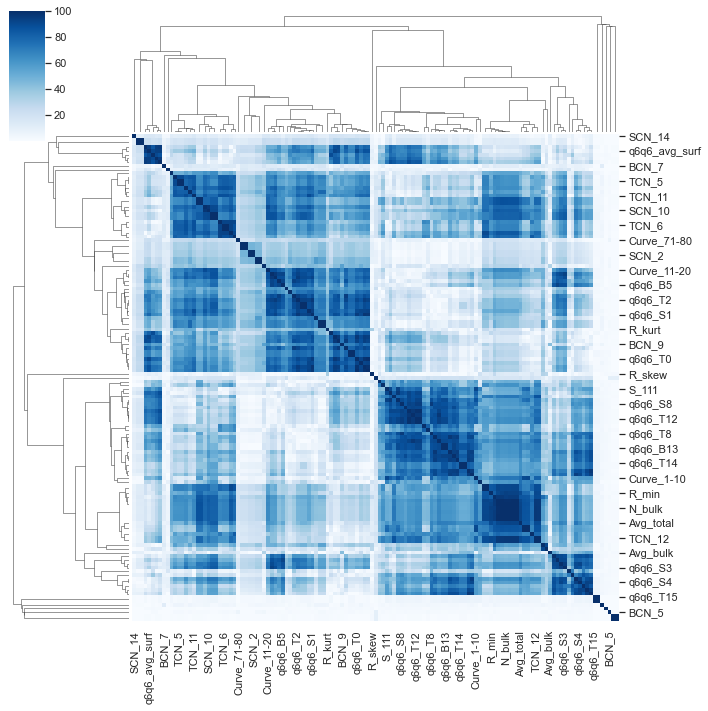

,N_total,N_bulk,N_surface,Volume,R_min,R_max,R_diff,R_avg,R_std,R_skew,...,q6q6_S4,q6q6_S5,q6q6_S6,q6q6_S7,q6q6_S8,q6q6_S9,q6q6_S10,q6q6_S11,q6q6_S12,q6q6_S13
N_total,100.000000,99.948785,99.644072,99.999782,93.226462,95.031828,57.880156,99.918684,44.691724,12.905259,...,55.981767,56.766149,57.818208,60.982108,58.764177,49.553579,55.120164,45.027667,46.030140,16.972074
N_bulk,99.948785,100.000000,99.353274,99.949071,93.925706,94.366377,56.278863,99.820880,43.121435,12.272449,...,55.586418,56.221627,57.364792,60.543014,58.749107,49.359771,54.442530,44.182040,45.183500,16.827808
N_surface,99.644072,99.353274,100.000000,99.643615,90.814750,96.379881,62.030545,99.690112,48.867311,14.247862,...,57.140885,58.342615,59.158138,62.191935,58.952951,50.278266,57.131646,47.367310,48.394481,17.321814
Volume,99.999782,99.949071,99.643615,100.000000,93.227782,95.029725,57.876828,99.918655,44.689611,12.894855,...,55.984312,56.767413,57.818955,60.982985,58.769004,49.558838,55.120993,45.023071,46.023043,16.974150
R_min,93.226462,93.925706,90.814750,93.227782,100.000000,81.814579,33.818301,92.500087,21.560349,14.230213,...,41.656088,43.627808,47.259220,52.704073,50.305050,42.897799,45.241229,37.024786,37.203175,14.590841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
q6q6_S9,49.553579,49.359771,50.278266,49.558838,42.897799,46.515123,28.572837,49.187604,40.168612,4.685679,...,43.778994,58.516479,73.527437,87.104984,88.821880,100.000000,85.652455,53.908005,47.938728,14.014848
q6q6_S10,55.120164,54.442530,57.131646,55.120993,45.241229,51.896943,31.472075,54.336534,35.744451,5.183082,...,57.368802,75.959443,89.007525,92.046068,85.969892,85.652455,100.000000,78.494439,70.253280,18.940643
q6q6_S11,45.027667,44.182040,47.367310,45.023071,37.024786,39.843280,18.178670,43.624065,15.936131,0.798587,...,50.555056,70.823333,83.165972,78.626322,66.191418,53.908005,78.494439,100.000000,82.006278,18.963887
q6q6_S12,46.030140,45.183500,48.394481,46.023043,37.203175,42.686545,24.862060,44.853091,18.888905,2.431038,...,49.533272,64.225227,73.000863,68.584132,58.947649,47.938728,70.253280,82.006278,100.000000,22.734512


In [43]:
import matplotlib.pyplot as plt

# Correlation Coefficient Filter

sns.set()
correlated = X_features.corr(method='spearman').abs().mul(100).astype(float)
plt.figure(figsize=(5,5))
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=50, as_cmap=True)
cg = sns.clustermap(data = correlated, cmap='Blues', metric='correlation')
#cg = sns.clustermap(data = correlated, cmap='Blues', metric='correlation', annot =False, fmt='1g')
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.savefig('./Gold/condensed/correlation_matrix_{}.png'.format(name_prefix), dpi=300, bbox_inches='tight')
plt.show()
correlated




In [11]:
# print correlated features
for c1 in feature_names:
  for c2 in feature_names:
    if c1 != c2 and correlated[c1][c2] > 95:
        print(c1, c2)

N_total N_bulk
N_total N_surface
N_total Volume
N_total R_max
N_total R_avg
N_total TCN_12
N_total BCN_12
N_total N_bonds
N_bulk N_total
N_bulk N_surface
N_bulk Volume
N_bulk R_avg
N_bulk TCN_12
N_bulk BCN_12
N_bulk N_bonds
N_surface N_total
N_surface N_bulk
N_surface Volume
N_surface R_max
N_surface R_avg
N_surface TCN_12
N_surface BCN_12
N_surface N_bonds
Volume N_total
Volume N_bulk
Volume N_surface
Volume R_max
Volume R_avg
Volume TCN_12
Volume BCN_12
Volume N_bonds
R_max N_total
R_max N_surface
R_max Volume
R_max R_avg
R_avg N_total
R_avg N_bulk
R_avg N_surface
R_avg Volume
R_avg R_max
R_avg TCN_12
R_avg BCN_12
R_avg N_bonds
TCN_1 SCN_1
TCN_2 SCN_2
TCN_3 SCN_3
TCN_4 SCN_4
TCN_5 SCN_5
TCN_6 SCN_6
TCN_7 SCN_7
TCN_8 SCN_8
TCN_9 SCN_9
TCN_10 SCN_10
TCN_12 N_total
TCN_12 N_bulk
TCN_12 N_surface
TCN_12 Volume
TCN_12 R_avg
TCN_12 BCN_12
TCN_12 N_bonds
TCN_13 BCN_13
TCN_14 BCN_14
TCN_15 BCN_15
TCN_16 BCN_16
TCN_17 BCN_17
BCN_12 N_total
BCN_12 N_bulk
BCN_12 N_surface
BCN_12 Volume
BCN_12 R

In [12]:
# data processing

from sklearn import preprocessing

X_scaled = preprocessing.StandardScaler().fit_transform(X_features)
y_scaled = preprocessing.StandardScaler().fit_transform(y_multilabel)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [14]:
# Build base model

base_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

base_model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history = base_model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1, validation_data=(X_test, y_test), shuffle=True)

tf.keras.models.save_model(base_model, './Gold/base_model_{}.h5'.format(name_prefix))

print("Model saved!")

2021-12-25 10:38:00.350230: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-25 10:38:00.462992: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
320/320 [==============================] - 1s 1ms/step - loss: 0.6355 - mae: 0.4459 - val_loss: 0.2521 - val_mae: 0.3244
Epoch 2/200
320/320 [==============================] - 0s 833us/step - loss: 0.2473 - mae: 0.2510 - val_loss: 0.0991 - val_mae: 0.1944
Epoch 3/200
320/320 [==============================] - 0s 836us/step - loss: 0.1523 - mae: 0.1854 - val_loss: 0.0690 - val_mae: 0.1658
Epoch 4/200
320/320 [==============================] - 0s 895us/step - loss: 0.1075 - mae: 0.1569 - val_loss: 0.0502 - val_mae: 0.1416
Epoch 5/200
320/320 [==============================] - 0s 807us/step - loss: 0.0780 - mae: 0.1347 - val_loss: 0.0428 - val_mae: 0.1331
Epoch 6/200
320/320 [==============================] - 0s 858us/step - loss: 0.0591 - mae: 0.1235 - val_loss: 0.0317 - val_mae: 0.1153
Epoch 7/200
320/320 [==============================] - 0s 912us/step - loss: 0.0462 - mae: 0.1136 - val_loss: 0.0298 - val_mae: 0.1100
Epoch 8/200
320/320 [==============================] - 0s

KeyboardInterrupt: 

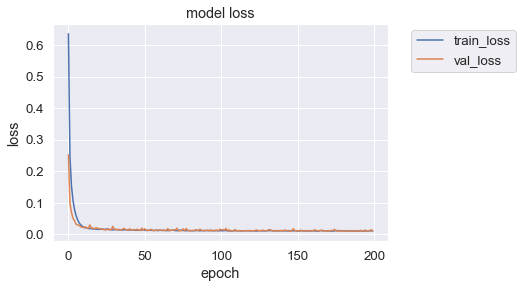

In [13]:
import matplotlib.pyplot as plt


# plot training curve
plt.plot(history.history['loss'])
# plt.plot(history.history['mae'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig('./Gold/base_model_{}_loss_learning_curve.png'.format(name_prefix), dpi = 300, bbox_inches='tight')
plt.show()

In [15]:

stop_call_back = utilities.EarlyStoppingByLossVal(monitor='loss', value=0.0110, verbose=0)

base_model = tf.keras.models.load_model('./Gold/base_model_{}.h5'.format(name_prefix))

base_model.trainable = False

feature_model = utilities.Feature_Importance_Layer.make_feature_model(base_model, shape=(len(feature_names)))

opt = utilities.tf.keras.optimizers.Adam()

feature_model.compile(loss='mse', optimizer=opt, metrics=['mae'], run_eagerly=True)

history = feature_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_data=(X_test, y_test), shuffle=True, callbacks=[stop_call_back])


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 131)]             0         
_________________________________________________________________
feature_extractor (Sequentia (None, 131)               131       
_________________________________________________________________
sequential (Sequential)      (10, 1)                   132       
Total params: 263
Trainable params: 131
Non-trainable params: 132
_________________________________________________________________
Epoch 1/100
320/320 [==============================] - 2s 8ms/step - loss: 0.3968 - mae: 0.4109 - val_loss: 0.1889 - val_mae: 0.2704
Epoch 2/100
320/320 [==============================] - 2s 7ms/step - loss: 0.1226 - mae: 0.2140 - val_loss: 0.1062 - val_mae: 0.1878
Epoch 3/100
320/320 [==============================] - 2s 8ms/step - loss: 0.0772 - mae: 0.1617 - val_loss: 0.0735 - val_mae:

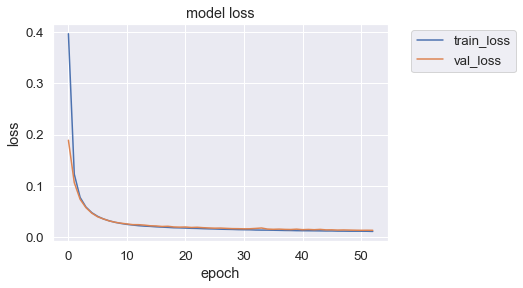

In [16]:
# plot training curve
plt.plot(history.history['loss'])
# plt.plot(history.history['mae'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig('./Gold/feature_model_{}_loss_learning_curve.png'.format(name_prefix), dpi = 300, bbox_inches='tight')
plt.show()

In [11]:
from copy import copy
import numpy as np
from numpy import arange

from scipy.spatial.distance import cdist,pdist
from scipy.stats import levene, pearsonr

from pandas import Series, DataFrame

from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D




def plot_feature_importance(ft_set, feature_importance, show_cols = 30):
    
    fig = plt.figure(figsize=(5,4))
    w_lr_sort, ft_sorted, _ = return_feature_importance(ft_set, feature_importance, show_cols = show_cols)
    x_val = list(range(len(w_lr_sort)))
    
    for i in range(16):
        plt.text(-0.3+i, 2, ft_sorted[i], rotation=90, fontsize=12)


    plt.bar(x_val, w_lr_sort)
    plt.ylabel('Ranking', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(x_val)
    
    return fig

def plot_feature_importance_reverse(ft_set, feature_importance, show_cols = 30):
    
    fig = plt.figure(figsize=(5,4))
    w_lr_sort, ft_sorted, _ = return_feature_importance(ft_set, feature_importance, show_cols = show_cols)
    x_val = list(range(len(w_lr_sort)))
    
    for i in range(16):
        plt.text(-0.3+i, 2, ft_sorted[i], rotation=90, fontsize=12)

    plt.bar(x_val, w_lr_sort, color='r')
    plt.ylabel('Ranking', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(x_val)
    
    return fig

def return_feature_importance(ft_set, feature_importance, show_cols = 30):

    w_lr = copy(np.abs(feature_importance))
    w_lr = 100 * (w_lr / w_lr.max())
    sorted_index_pos = [index for index, num in sorted(enumerate(w_lr), key=lambda x: x[-1], 
                   reverse=True)]

    ft_sorted = []
    w_lr_sort = []
    for i, idx in enumerate(sorted_index_pos):
        if i > show_cols:
            break
        ft_sorted.append(ft_set[idx])
        w_lr_sort.append(w_lr[idx])

    return w_lr_sort, ft_sorted, sorted_index_pos





In [12]:
weights = np.load('gold_weights_output_condensed.npy')

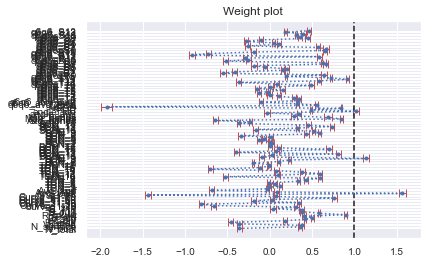

In [19]:
x = feature_names
y = weights_mean
fig, ax = plt.subplots(nrows=1, sharex=True)
ax.errorbar(y, x, xerr=weights_std, fmt='.:', elinewidth=1, capsize=4, color='b', ecolor='r')
ax.set_title('Weight plot')
# ax.set_yticklabels(labels, fontsize=8)
ax.tick_params(axis='both', labelsize=10)
ax.axvline(1, color="k", linestyle="--")
# ax.set_xlabel('weight')
# ax.set_facecolor("none")
# ax.grid(b=False)
fig.savefig('./Gold/{}_weight_plot.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

In [38]:
a = []
for i in range(50):
    weights_mean = np.abs(np.subtract(weights[:i], 1)).mean(axis=0)
    a.append(utilities.rank_importance(feature_names, weights_mean))

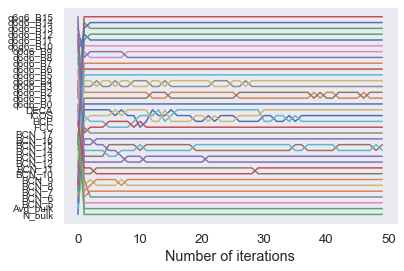

In [40]:
from matplotlib import pyplot as plt
a = np.array(a)
# print(a)
b = [i for i in range(50)]
for i in range(35):
    plt.plot(b, a[:,i])
plt.yticks([i for i in range(1,36)], feature_names, fontsize=10)
plt.xlabel("Number of iterations")
plt.grid(b=None)

plt.savefig('./Gold/{}_training_interation_converge.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

In [16]:
weights_std = np.std(weights, axis=0)
weights_std

array([0.02987624, 0.02618957, 0.02923406, 0.02771864, 0.02527587,
       0.02571924, 0.01106086, 0.02342279, 0.01917205, 0.01435721,
       0.01197087, 0.0284511 , 0.02766896, 0.0384677 , 0.03454428,
       0.02799452, 0.02960985, 0.02261297, 0.03228315, 0.02493881,
       0.02815952, 0.03302035, 0.03513543, 0.03590089, 0.02598479,
       0.02665091, 0.01993469, 0.02074491, 0.01864453, 0.02320085,
       0.0216234 , 0.01588677, 0.0204248 , 0.02688222, 0.02996622,
       0.02708024, 0.02288235, 0.02840536, 0.02593404, 0.02992159,
       0.02522246, 0.02133771, 0.01988902, 0.01331297, 0.01527107,
       0.0175433 , 0.03813427, 0.02976639, 0.027824  , 0.02712398,
       0.02917556, 0.02893195, 0.03558796, 0.02007733, 0.02061769,
       0.02522905, 0.01935647, 0.02251947, 0.02270541, 0.02126424,
       0.01853697, 0.03230569, 0.02795284, 0.02056078, 0.01822434,
       0.02535307, 0.017415  , 0.02281492, 0.03196391, 0.01661114,
       0.01655025, 0.02783575, 0.01669451, 0.04838852, 0.03490

In [15]:
weights_mean = weights.mean(axis=0)
weights_mean

array([-3.61144245e-01,  3.58209223e-01,  3.78339082e-01, -3.59205604e-01,
       -4.62496996e-01,  1.81644768e-01,  4.18974131e-01,  5.05189717e-01,
        4.04525071e-01,  8.95261765e-01,  5.86031973e-01,  3.81380856e-01,
        3.77715975e-01,  4.04456705e-02,  3.15760493e-01, -6.59422874e-01,
       -8.07197034e-01,  3.43638003e-01, -1.90515071e-01,  2.96784211e-02,
        7.63114393e-01,  7.37934634e-02, -1.43597853e+00,  1.56780350e+00,
        8.21773559e-02, -6.85470819e-01, -2.88058221e-02, -2.86293915e-03,
        1.25156641e-01,  5.92037849e-02, -1.35238869e-02,  3.36043179e-01,
        4.29389805e-01,  5.92735946e-01, -5.22770882e-01,  9.31355059e-02,
        5.93788624e-01,  3.86582822e-01,  7.92885274e-02, -7.02482939e-01,
       -1.12636641e-01, -7.44555565e-03, -4.30893712e-03, -1.93241894e-01,
        1.04239978e-01,  2.32265949e-01,  1.13656652e+00, -9.61043760e-02,
        2.42931880e-02,  8.11970174e-01, -3.92562330e-01,  7.53318369e-02,
        7.04949975e-01,  

In [14]:
weights_scaled = np.abs(np.subtract(weights, 1)).mean(axis=0)
weights_scaled

array([1.361144  , 0.64179105, 0.621661  , 1.3592057 , 1.4624975 ,
       0.8183555 , 0.5810259 , 0.49481034, 0.595475  , 0.10473841,
       0.4139681 , 0.618619  , 0.62228376, 0.9595543 , 0.6842396 ,
       1.6594234 , 1.8071971 , 0.6563616 , 1.1905149 , 0.9703215 ,
       0.2368853 , 0.92620647, 2.4359787 , 0.5678037 , 0.91782266,
       1.685471  , 1.0288055 , 1.002863  , 0.8748431 , 0.9407965 ,
       1.0135238 , 0.6639569 , 0.57061   , 0.40726405, 1.5227714 ,
       0.9068645 , 0.40621144, 0.6134171 , 0.9207116 , 1.7024823 ,
       1.1126367 , 1.0074456 , 1.0043088 , 1.1932417 , 0.89575976,
       0.76773405, 0.13656674, 1.0961044 , 0.975707  , 0.1880299 ,
       1.392562  , 0.92466795, 0.29505002, 0.8885698 , 0.9949171 ,
       0.99931526, 0.96976644, 1.0002292 , 1.1309192 , 1.0671004 ,
       0.98552305, 1.3366709 , 0.56887525, 0.4103846 , 0.4787923 ,
       1.1666309 , 0.6767493 , 0.2671572 , 0.5435549 , 1.364467  ,
       1.2270446 , 1.6416854 , 0.15623789, 0.3124299 , 0.71827

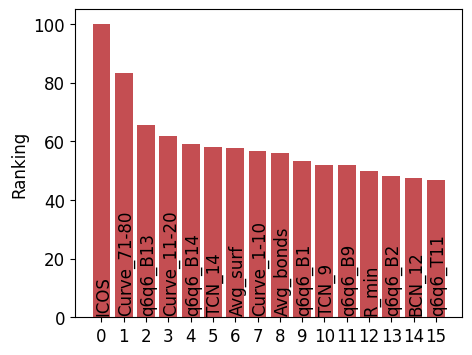

In [18]:
plt.style.use('default')

fig_FI_Weight_unimportant = plot_feature_importance_reverse(feature_names, weights_scaled, 15)
fig_FI_Weight_unimportant.savefig('./New_figures/condensed/{}_hist_TV_only.png'.format(name_prefix), dpi = 300, bbox_inches='tight')


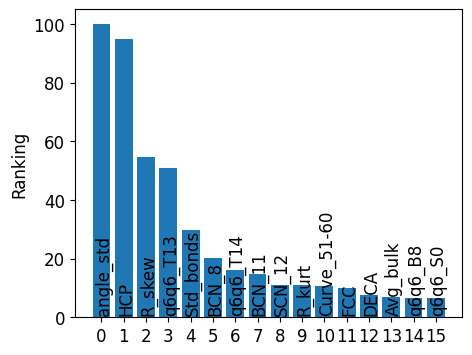

In [20]:
fig_FI_VT = plot_feature_importance(feature_names, np.abs((weights_mean)/(weights_std*weights_scaled)), 15)
fig_FI_VT.savefig('./New_figures/condensed/{}_hist_VT.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

In [21]:
base_model = tf.keras.models.load_model('./Gold/base_model_condensed.h5')

base_model.trainable = False

2021-12-25 10:43:40.200243: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
# Benchmark
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = base_model.evaluate(X_train, y_train, batch_size=10)
print("test loss, test acc:", results)

Evaluate on test data
  1/320 [..............................] - ETA: 1:06 - loss: 0.0044 - mae: 0.0557

2021-12-25 10:43:41.399144: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


320/320 [==============================] - 0s 671us/step - loss: 0.0087 - mae: 0.0615
test loss, test acc: [0.008732059970498085, 0.06150823086500168]


In [23]:
# Baseline
array_aux = np.zeros(np.shape(X_train))
results = base_model.evaluate(array_aux, y_train, batch_size=10)

320/320 [==============================] - 0s 563us/step - loss: 0.9931 - mae: 0.7446


In [24]:
# Individula contribution
single_contribution_set = []
for i in range(len(X_train[-1])):
    aux_array = []
    array_aux = np.zeros(np.shape(X_train))
    array_aux[:, i] = X_train[:, i]
    results = base_model.evaluate(array_aux, y_train, batch_size=10)
    
    aux_array.append(results[0])
    aux_array.append(results[1])
    single_contribution_set.append(aux_array)

320/320 [==============================] - 0s 468us/step - loss: 0.9922 - mae: 0.7440


In [25]:
# All contribution
# Set each feature to be 0 and calculate the drop of change as its contribution
# it is different from permutation method, providing permutation method results
contribution_set = []
for i in range(len(X_train[-1])):
    aux_array = []
    array_aux = np.ones(np.shape(X_train))
    array_aux[:,i] = 0
    X_new = array_aux * X_train
    results_new = base_model.evaluate(X_new, y_train, batch_size=10)
    aux_array.append(results_new[0])
    aux_array.append(results_new[1])
    contribution_set.append(aux_array)

320/320 [==============================] - 0s 433us/step - loss: 0.0088 - mae: 0.0617


In [26]:
# Individual contribution of each single feature
# Compare this with permutation method
# Can be used to calculate feature interaction
contribution_set = np.round(contribution_set, 4)
for i in range(len(contribution_set)):
    contribution_set[i] = abs(contribution_set[i][0]-0.0087)
contribution_set

array([[2.000e-04, 2.000e-04],
       [4.710e-02, 4.710e-02],
       [4.200e-03, 4.200e-03],
       [1.900e-03, 1.900e-03],
       [5.000e-04, 5.000e-04],
       [6.500e-03, 6.500e-03],
       [2.660e-02, 2.660e-02],
       [2.130e-02, 2.130e-02],
       [8.500e-03, 8.500e-03],
       [9.000e-04, 9.000e-04],
       [1.500e-03, 1.500e-03],
       [1.800e-03, 1.800e-03],
       [4.500e-03, 4.500e-03],
       [2.000e-04, 2.000e-04],
       [1.000e-04, 1.000e-04],
       [8.000e-04, 8.000e-04],
       [3.000e-04, 3.000e-04],
       [3.220e-02, 3.220e-02],
       [1.000e-04, 1.000e-04],
       [1.000e-04, 1.000e-04],
       [3.000e-04, 3.000e-04],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [4.000e-04, 4.000e-04],
       [8.000e-04, 8.000e-04],
       [1.300e-03, 1.300e-03],
       [4.440e-02, 4.440e-02],
       [1.800e-03, 1.800e-03],
       [1.900e-03, 1.900e-03],
       [6.100e-03, 6.100e-03],
       [2.860e-02, 2.860e-02],
       [

In [32]:
# We find the contribution and coefficient relationship through previous method (benchmark)
weights_output = np.zeros(np.shape(weights))
X_data = []
y_data = []
contribution_set = np.round(contribution_set, 4)
for j in range(len(weights)):
    for i in range(len(X_train[-1])):
        array_aux = np.ones(np.shape(X_train))
        array_aux[:,i] = 1-weights[j][i]
#         banchmark
        con_feature = contribution_set[i][0]
        X_new = array_aux * X_train
        results_new = base_model.evaluate(X_new, y_train, batch_size=10)
        results_round = np.round(results_new[0],4)
#         the loss change to banchmark
        con = abs(0.0087-results_new[0])
#         weights_output[j][i] = con/con_feature
        
        weight = weights[j][i]
        print(con, weight)

        weights_output[j][i] = con/con_feature

#     break

320/320 [==============================] - 0s 586us/step - loss: 0.0089 - mae: 0.0621
0.00016737462133169234 -0.36832616
320/320 [==============================] - 0s 537us/step - loss: 0.0158 - mae: 0.0874
0.007054865482449532 0.33398622
320/320 [==============================] - 0s 448us/step - loss: 0.0099 - mae: 0.0670
0.0012145816639065748 0.41023874
320/320 [==============================] - 0s 491us/step - loss: 0.0103 - mae: 0.0680
0.001563361036777497 -0.3447978
320/320 [==============================] - 0s 468us/step - loss: 0.0101 - mae: 0.0679
0.001414040225744248 -0.5095445
320/320 [==============================] - 0s 525us/step - loss: 0.0092 - mae: 0.0643
0.0005184254899621016 0.15415215
320/320 [==============================] - 0s 485us/step - loss: 0.0119 - mae: 0.0744
0.003238543058931828 0.40490893
320/320 [==============================] - 0s 451us/step - loss: 0.0152 - mae: 0.0887
0.006454516324400902 0.48921427
320/320 [==============================] - 0s 494us

320/320 [==============================] - 0s 450us/step - loss: 0.0122 - mae: 0.0755
0.003509858745336533 0.4178129
320/320 [==============================] - 0s 436us/step - loss: 0.0161 - mae: 0.0921
0.0074236040294170386 0.53391665
320/320 [==============================] - 0s 443us/step - loss: 0.0107 - mae: 0.0727
0.0020032386586070067 0.41714406
320/320 [==============================] - 0s 438us/step - loss: 0.0095 - mae: 0.0633
0.0007753634184598929 0.89944947
320/320 [==============================] - 0s 441us/step - loss: 0.0092 - mae: 0.0642
0.0005235747724771506 0.58539414
320/320 [==============================] - 0s 437us/step - loss: 0.0090 - mae: 0.0621
0.00031363231241703093 0.38980106
320/320 [==============================] - 0s 444us/step - loss: 0.0097 - mae: 0.0657
0.0009978805959224707 0.35291988
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0616
4.357204884290755e-05 0.068122424
320/320 [==============================] - 0s 43

320/320 [==============================] - 0s 429us/step - loss: 0.0100 - mae: 0.0667
0.00125810516178608 0.42016703
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0616
4.2545731365681294e-05 0.062172856
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0614
3.679946064955031e-07 0.27488577
320/320 [==============================] - 0s 445us/step - loss: 0.0110 - mae: 0.0709
0.00232611143141985 -0.64730513
320/320 [==============================] - 0s 421us/step - loss: 0.0100 - mae: 0.0680
0.0012912062287330633 -0.8463004
320/320 [==============================] - 0s 427us/step - loss: 0.0109 - mae: 0.0690
0.0022038092195987707 0.33925208
320/320 [==============================] - 0s 428us/step - loss: 0.0090 - mae: 0.0628
0.00029677537381649077 -0.24641374
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0613
1.1509925127023424e-06 0.055237375
320/320 [==============================] - 0s

320/320 [==============================] - 0s 448us/step - loss: 0.0089 - mae: 0.0624
0.0002178113266825682 -0.18270396
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0613
1.0438904166215623e-06 0.055047728
320/320 [==============================] - 0s 431us/step - loss: 0.0089 - mae: 0.0627
0.0002294547215104109 0.77730644
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0615
3.192865401506484e-05 0.0625702
320/320 [==============================] - 0s 429us/step - loss: 0.0088 - mae: 0.0617
6.255612820386947e-05 -1.4770476
320/320 [==============================] - 0s 429us/step - loss: 0.0088 - mae: 0.0627
0.00010176573991775573 1.5325106
320/320 [==============================] - 0s 438us/step - loss: 0.0087 - mae: 0.0611
3.796524256467759e-05 0.08367569
320/320 [==============================] - 0s 436us/step - loss: 0.0084 - mae: 0.0600
0.0002548088029026979 -0.67968166
320/320 [==============================] - 0s

0.001168056513369084 0.27250147
320/320 [==============================] - 0s 424us/step - loss: 0.0090 - mae: 0.0624
0.0002611401781439787 0.14056058
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0615
2.6846426725388173e-05 -0.0031538543
320/320 [==============================] - 0s 422us/step - loss: 0.0101 - mae: 0.0676
0.0014454826071858412 -0.12206356
320/320 [==============================] - 0s 425us/step - loss: 0.0087 - mae: 0.0612
3.416730910539567e-05 -0.00860811
320/320 [==============================] - 0s 422us/step - loss: 0.0091 - mae: 0.0631
0.0004155506670475012 0.15435997
320/320 [==============================] - 0s 434us/step - loss: 0.0084 - mae: 0.0598
0.0003310599073767656 -0.12917286
320/320 [==============================] - 0s 427us/step - loss: 0.0087 - mae: 0.0614
1.7717602849007252e-05 0.019159183
320/320 [==============================] - 0s 435us/step - loss: 0.0082 - mae: 0.0592
0.000461085577309131 0.49938065
320/320 

320/320 [==============================] - 0s 436us/step - loss: 0.0084 - mae: 0.0599
0.0003262943297624582 -0.12346549
320/320 [==============================] - 0s 437us/step - loss: 0.0088 - mae: 0.0616
5.431392341852248e-05 -0.02896654
320/320 [==============================] - 0s 431us/step - loss: 0.0082 - mae: 0.0592
0.00046146741956472337 0.49606872
320/320 [==============================] - 0s 423us/step - loss: 0.0084 - mae: 0.0601
0.0002872272104024881 0.08973238
320/320 [==============================] - 0s 423us/step - loss: 0.0093 - mae: 0.0637
0.0006062436208128935 -0.34974763
320/320 [==============================] - 0s 427us/step - loss: 0.1374 - mae: 0.2593
0.1287230831861496 0.61279666
320/320 [==============================] - 0s 421us/step - loss: 0.0375 - mae: 0.1276
0.028760528314113618 0.9419511
320/320 [==============================] - 0s 513us/step - loss: 0.0117 - mae: 0.0652
0.002956362563371659 0.7301771
320/320 [==============================] - 0s 435us

320/320 [==============================] - 0s 550us/step - loss: 0.0087 - mae: 0.0615
2.755143791437209e-05 0.0023899658
320/320 [==============================] - 0s 411us/step - loss: 0.0131 - mae: 0.0797
0.004399935837090016 0.34396574
320/320 [==============================] - 0s 460us/step - loss: 0.0149 - mae: 0.0855
0.006238170090317727 0.4122593
320/320 [==============================] - 0s 442us/step - loss: 0.0121 - mae: 0.0768
0.0033633933693170553 0.5758346
320/320 [==============================] - 0s 600us/step - loss: 0.0096 - mae: 0.0655
0.0008702093094587332 -0.5280965
320/320 [==============================] - 0s 507us/step - loss: 0.0089 - mae: 0.0623
0.00017023843824863494 0.073717475
320/320 [==============================] - 0s 669us/step - loss: 0.0659 - mae: 0.1594
0.05717930768728256 0.59651977
320/320 [==============================] - 0s 513us/step - loss: 0.0197 - mae: 0.0972
0.011032939079403878 0.41105795
320/320 [==============================] - 0s 410us

0.027051942545175553 0.90991396
320/320 [==============================] - 0s 461us/step - loss: 0.0115 - mae: 0.0650
0.002831574651598931 0.71856874
320/320 [==============================] - 0s 488us/step - loss: 0.0087 - mae: 0.0614
1.607636809349e-05 0.18070891
320/320 [==============================] - 0s 515us/step - loss: 0.0125 - mae: 0.0717
0.0038109264627099043 0.61307716
320/320 [==============================] - 0s 428us/step - loss: 0.0088 - mae: 0.0615
7.639278769493163e-05 -0.5770745
320/320 [==============================] - 0s 425us/step - loss: 0.0093 - mae: 0.0634
0.0005621538788080221 -0.38665056
320/320 [==============================] - 0s 412us/step - loss: 0.0087 - mae: 0.0612
1.3132457435130473e-05 0.12111907
320/320 [==============================] - 0s 409us/step - loss: 0.0096 - mae: 0.0655
0.00093785219937563 0.21736296
320/320 [==============================] - 0s 431us/step - loss: 0.0089 - mae: 0.0623
0.00022597250640392363 -0.075100824
320/320 [========

320/320 [==============================] - 0s 488us/step - loss: 0.0096 - mae: 0.0655
0.0009462443470954901 0.21878678
320/320 [==============================] - 0s 414us/step - loss: 0.0089 - mae: 0.0622
0.0002125474914908415 -0.070430815
320/320 [==============================] - 0s 488us/step - loss: 0.0087 - mae: 0.0613
2.24000483751291e-05 -0.15128008
320/320 [==============================] - 0s 435us/step - loss: 0.0083 - mae: 0.0595
0.00035307264775037706 0.64106137
320/320 [==============================] - 0s 428us/step - loss: 0.0088 - mae: 0.0597
5.1654066145420674e-05 0.61450136
320/320 [==============================] - 0s 441us/step - loss: 0.0084 - mae: 0.0597
0.0003495326906442636 -0.49372557
320/320 [==============================] - 0s 618us/step - loss: 0.0083 - mae: 0.0590
0.00038806523084640443 -0.29953644
320/320 [==============================] - 0s 468us/step - loss: 0.0124 - mae: 0.0742
0.0037442325904965407 -0.3207164
320/320 [==============================] 

320/320 [==============================] - 0s 452us/step - loss: 0.0088 - mae: 0.0615
6.905582845211089e-05 -0.19473945
320/320 [==============================] - 0s 415us/step - loss: 0.0087 - mae: 0.0615
2.317235916853011e-05 0.099525526
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0615
2.4365383386612538e-05 0.22259036
320/320 [==============================] - 0s 558us/step - loss: 0.0087 - mae: 0.0615
2.188527137041152e-05 1.1564424
320/320 [==============================] - 0s 453us/step - loss: 0.0087 - mae: 0.0616
2.208923101425231e-05 -0.1149965
320/320 [==============================] - 0s 720us/step - loss: 0.0087 - mae: 0.0615
2.8575892746449116e-05 -0.016302349
320/320 [==============================] - 0s 464us/step - loss: 0.0693 - mae: 0.1507
0.060574045526981354 0.8472154
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0615
3.487815260887206e-05 -0.38776153
320/320 [==============================] - 0

320/320 [==============================] - 0s 419us/step - loss: 0.0128 - mae: 0.0754
0.004125715355575085 -0.3420146
320/320 [==============================] - 0s 412us/step - loss: 0.0508 - mae: 0.1555
0.042066099244356156 0.58526117
320/320 [==============================] - 0s 510us/step - loss: 0.0110 - mae: 0.0693
0.002276173914968968 -0.87554324
320/320 [==============================] - 0s 545us/step - loss: 0.0086 - mae: 0.0602
0.0001246145635843271 -0.671991
320/320 [==============================] - 0s 419us/step - loss: 0.0087 - mae: 0.0615
1.976744383573592e-05 -0.16437212
320/320 [==============================] - 0s 445us/step - loss: 0.0139 - mae: 0.0821
0.005203994113206864 0.6235593
320/320 [==============================] - 0s 600us/step - loss: 0.0094 - mae: 0.0653
0.0006894386664032942 0.6462045
320/320 [==============================] - 0s 458us/step - loss: 0.0106 - mae: 0.0706
0.0019078870594501501 0.51939094
320/320 [==============================] - 0s 451us/s

320/320 [==============================] - 0s 431us/step - loss: 0.0087 - mae: 0.0615
3.499736189842284e-05 -0.40411487
320/320 [==============================] - 0s 428us/step - loss: 0.0085 - mae: 0.0606
0.0001543023332953447 0.08468604
320/320 [==============================] - 0s 458us/step - loss: 0.0087 - mae: 0.0614
3.4692987799650465e-06 0.7350337
320/320 [==============================] - 0s 433us/step - loss: 0.0088 - mae: 0.0617
6.225065439939559e-05 0.112820715
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0615
2.7962151169777516e-05 0.012554542
320/320 [==============================] - 0s 434us/step - loss: 0.0087 - mae: 0.0615
2.3847568035126332e-05 -0.0063193063
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0615
3.435288667678893e-05 -0.013524038
320/320 [==============================] - 0s 437us/step - loss: 0.0088 - mae: 0.0616
7.03382596373564e-05 0.022960717
320/320 [=============================

0.0007300946220755583 0.66969484
320/320 [==============================] - 0s 440us/step - loss: 0.0107 - mae: 0.0711
0.0020179163023829466 0.53929
320/320 [==============================] - 0s 438us/step - loss: 0.0090 - mae: 0.0625
0.0002522693306207663 -0.2687723
320/320 [==============================] - 0s 437us/step - loss: 0.0098 - mae: 0.0660
0.001106444868445397 0.12643506
320/320 [==============================] - 0s 436us/step - loss: 0.0086 - mae: 0.0607
0.00014678376615047395 0.032994904
320/320 [==============================] - 0s 437us/step - loss: 0.0092 - mae: 0.0634
0.00048196048587560714 -0.31634024
320/320 [==============================] - 0s 431us/step - loss: 0.0094 - mae: 0.0644
0.0007327228143811232 -0.101909615
320/320 [==============================] - 0s 433us/step - loss: 0.0092 - mae: 0.0633
0.0004532925143837935 0.46443775
320/320 [==============================] - 0s 438us/step - loss: 0.0096 - mae: 0.0638
0.000862977589666844 0.33625522
320/320 [=====

320/320 [==============================] - 0s 434us/step - loss: 0.0092 - mae: 0.0634
0.0004870017349720007 0.4923861
320/320 [==============================] - 0s 528us/step - loss: 0.0097 - mae: 0.0642
0.0009770534291863447 0.34693775
320/320 [==============================] - 0s 423us/step - loss: 0.0119 - mae: 0.0729
0.0032485985487699515 0.32605234
320/320 [==============================] - 0s 425us/step - loss: 0.0104 - mae: 0.0674
0.0016507013991475111 0.43170154
320/320 [==============================] - 0s 427us/step - loss: 0.0089 - mae: 0.0622
0.00019746099710464537 0.19870076
320/320 [==============================] - 0s 421us/step - loss: 0.0087 - mae: 0.0616
4.992646276950896e-05 0.46235397
320/320 [==============================] - 0s 432us/step - loss: 0.0089 - mae: 0.0622
0.00018268183916807235 -0.40702158
320/320 [==============================] - 0s 431us/step - loss: 0.0176 - mae: 0.0933
0.008938953402638436 0.38616103
320/320 [==============================] - 0s 4

320/320 [==============================] - 0s 427us/step - loss: 0.0088 - mae: 0.0620
0.00014917378425598204 -0.3216152
320/320 [==============================] - 0s 422us/step - loss: 0.0173 - mae: 0.0924
0.0086456110060215 0.3784102
320/320 [==============================] - 0s 428us/step - loss: 0.0097 - mae: 0.0659
0.0009730412915349013 0.34363204
320/320 [==============================] - 0s 425us/step - loss: 0.0104 - mae: 0.0686
0.0017159526526927954 -0.36948472
320/320 [==============================] - 0s 428us/step - loss: 0.0098 - mae: 0.0668
0.0011478682339191443 -0.43644768
320/320 [==============================] - 0s 429us/step - loss: 0.0093 - mae: 0.0647
0.0005889247462153441 0.1725766
320/320 [==============================] - 0s 424us/step - loss: 0.0126 - mae: 0.0771
0.0039005169004201895 0.43557858
320/320 [==============================] - 0s 420us/step - loss: 0.0160 - mae: 0.0915
0.007250201079249383 0.52613026
320/320 [==============================] - 0s 426us

3.097311705350936e-05 0.4853624
320/320 [==============================] - 0s 426us/step - loss: 0.0087 - mae: 0.0616
4.0905672311783436e-05 -0.36365736
320/320 [==============================] - 0s 425us/step - loss: 0.0088 - mae: 0.0615
5.865761190652907e-05 -0.23424317
320/320 [==============================] - 0s 433us/step - loss: 0.0089 - mae: 0.0630
0.00021291443258524 -0.60466534
320/320 [==============================] - 0s 438us/step - loss: 0.0099 - mae: 0.0695
0.0012166342988610274 0.8234829
320/320 [==============================] - 0s 436us/step - loss: 0.0087 - mae: 0.0615
2.652977705001891e-05 0.689195
320/320 [==============================] - 0s 425us/step - loss: 0.0087 - mae: 0.0615
3.1018751859665517e-05 0.2534314
320/320 [==============================] - 0s 426us/step - loss: 0.0192 - mae: 0.0983
0.010472627478837968 0.3804479
320/320 [==============================] - 0s 423us/step - loss: 0.0087 - mae: 0.0615
2.203148901462615e-05 0.031775694
320/320 [=========

320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0615
3.109977692365706e-05 0.23178263
320/320 [==============================] - 0s 433us/step - loss: 0.0162 - mae: 0.0890
0.007450325536727906 0.30909023
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0614
1.3163435459137562e-05 0.060428463
320/320 [==============================] - 0s 426us/step - loss: 0.0088 - mae: 0.0626
9.228860139846862e-05 1.0322037
320/320 [==============================] - 0s 430us/step - loss: 0.1815 - mae: 0.2822
0.1727778745174408 0.49145612
320/320 [==============================] - 0s 440us/step - loss: 0.0915 - mae: 0.1689
0.08282469784021378 0.8433315
320/320 [==============================] - 0s 423us/step - loss: 0.0087 - mae: 0.0615
3.8510310649872426e-05 -1.8527899
320/320 [==============================] - 0s 429us/step - loss: 0.0118 - mae: 0.0713
0.0030606632411479956 0.552979
320/320 [==============================] - 0s 425us/ste

320/320 [==============================] - 0s 460us/step - loss: 0.0098 - mae: 0.0661
0.0010929239273071295 0.3782213
320/320 [==============================] - 0s 426us/step - loss: 0.0087 - mae: 0.0615
3.809494078159392e-05 0.036076624
320/320 [==============================] - 0s 431us/step - loss: 0.0087 - mae: 0.0614
3.6581128835672105e-06 0.36576846
320/320 [==============================] - 0s 436us/step - loss: 0.0109 - mae: 0.0703
0.0021631197363138205 -0.6155833
320/320 [==============================] - 0s 464us/step - loss: 0.0100 - mae: 0.0679
0.001264455850422383 -0.83467674
320/320 [==============================] - 0s 425us/step - loss: 0.0103 - mae: 0.0669
0.0016435097262263304 0.30887234
320/320 [==============================] - 0s 431us/step - loss: 0.0089 - mae: 0.0623
0.00019461953192949355 -0.1627754
320/320 [==============================] - 0s 435us/step - loss: 0.0087 - mae: 0.0613
8.390162885188457e-06 0.06838468
320/320 [==============================] - 0s 

320/320 [==============================] - 0s 427us/step - loss: 0.0089 - mae: 0.0624
0.0002122392237186438 -0.17796858
320/320 [==============================] - 0s 421us/step - loss: 0.0087 - mae: 0.0616
4.227937310934127e-05 -0.015624059
320/320 [==============================] - 0s 426us/step - loss: 0.0089 - mae: 0.0626
0.00021750864684581817 0.74058366
320/320 [==============================] - 0s 431us/step - loss: 0.0087 - mae: 0.0615
3.1871843338013295e-05 0.09428309
320/320 [==============================] - 0s 432us/step - loss: 0.0088 - mae: 0.0616
5.95619261264807e-05 -1.3546374
320/320 [==============================] - 0s 433us/step - loss: 0.0088 - mae: 0.0627
0.00010506634712219298 1.5533327
320/320 [==============================] - 0s 435us/step - loss: 0.0086 - mae: 0.0610
6.538151651620805e-05 0.11874365
320/320 [==============================] - 0s 434us/step - loss: 0.0084 - mae: 0.0600
0.00025077431350946366 -0.6645073
320/320 [==============================] - 

0.0012164787679910666 0.2781971
320/320 [==============================] - 0s 432us/step - loss: 0.0088 - mae: 0.0616
9.066623747348845e-05 0.09697267
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0612
2.2337649762629863e-05 -0.035056423
320/320 [==============================] - 0s 422us/step - loss: 0.0098 - mae: 0.0663
0.0011400684073567396 -0.1017529
320/320 [==============================] - 0s 435us/step - loss: 0.0084 - mae: 0.0600
0.0003077740490436548 -0.055786014
320/320 [==============================] - 0s 427us/step - loss: 0.0090 - mae: 0.0626
0.00029685826152563155 0.1112341
320/320 [==============================] - 0s 424us/step - loss: 0.0084 - mae: 0.0599
0.0003257653385400766 -0.12290074
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0616
4.231848865747512e-05 -0.013464324
320/320 [==============================] - 0s 432us/step - loss: 0.0082 - mae: 0.0592
0.0004627573013305658 0.47020686
320/320 

320/320 [==============================] - 0s 430us/step - loss: 0.0084 - mae: 0.0597
0.0003383270174264902 -0.16170254
320/320 [==============================] - 0s 435us/step - loss: 0.0087 - mae: 0.0614
4.191073775292042e-06 0.037611775
320/320 [==============================] - 0s 432us/step - loss: 0.0082 - mae: 0.0592
0.000457702082395553 0.51960254
320/320 [==============================] - 0s 430us/step - loss: 0.0086 - mae: 0.0608
0.0001423041045665735 0.04308459
320/320 [==============================] - 0s 419us/step - loss: 0.0094 - mae: 0.0640
0.0006938000500202185 -0.39276022
320/320 [==============================] - 0s 425us/step - loss: 0.1205 - mae: 0.2424
0.11175907229185104 0.5686997
320/320 [==============================] - 0s 427us/step - loss: 0.0381 - mae: 0.1286
0.029366066801548005 0.95307934
320/320 [==============================] - 0s 420us/step - loss: 0.0117 - mae: 0.0652
0.0029667151451110846 0.7311291
320/320 [==============================] - 0s 422us

320/320 [==============================] - 0s 433us/step - loss: 0.0088 - mae: 0.0618
8.314487636089385e-05 -0.02431997
320/320 [==============================] - 0s 446us/step - loss: 0.0125 - mae: 0.0775
0.003815786103904248 0.3152454
320/320 [==============================] - 0s 430us/step - loss: 0.0154 - mae: 0.0871
0.006741103838384152 0.431732
320/320 [==============================] - 0s 431us/step - loss: 0.0125 - mae: 0.0787
0.003829177591204644 0.6237744
320/320 [==============================] - 0s 431us/step - loss: 0.0095 - mae: 0.0652
0.0008076821744441992 -0.49633208
320/320 [==============================] - 0s 434us/step - loss: 0.0088 - mae: 0.0620
0.00011430227309465468 0.04723282
320/320 [==============================] - 0s 426us/step - loss: 0.0631 - mae: 0.1564
0.054439356672763825 0.58173573
320/320 [==============================] - 0s 420us/step - loss: 0.0191 - mae: 0.0953
0.010359475511312485 0.39579213
320/320 [==============================] - 0s 429us/st

320/320 [==============================] - 0s 430us/step - loss: 0.0117 - mae: 0.0653
0.003029842051863671 0.7369045
320/320 [==============================] - 0s 429us/step - loss: 0.0087 - mae: 0.0614
1.7302919924258586e-05 0.1864158
320/320 [==============================] - 0s 424us/step - loss: 0.0126 - mae: 0.0719
0.00392301579117775 0.6223731
320/320 [==============================] - 0s 421us/step - loss: 0.0088 - mae: 0.0615
7.816881984472335e-05 -0.5900601
320/320 [==============================] - 0s 424us/step - loss: 0.0095 - mae: 0.0642
0.0007664935022592551 -0.4497422
320/320 [==============================] - 0s 425us/step - loss: 0.0087 - mae: 0.0614
2.523244470357955e-05 0.18601967
320/320 [==============================] - 0s 440us/step - loss: 0.0096 - mae: 0.0652
0.0008721213147044188 0.20600739
320/320 [==============================] - 0s 436us/step - loss: 0.0089 - mae: 0.0621
0.00017465104460716308 -0.056888465
320/320 [==============================] - 0s 437u

320/320 [==============================] - 0s 429us/step - loss: 0.0184 - mae: 0.0934
0.009696558240056039 0.38029125
320/320 [==============================] - 0s 428us/step - loss: 0.0085 - mae: 0.0605
0.00018405157029628694 0.0686057
320/320 [==============================] - 0s 438us/step - loss: 0.0096 - mae: 0.0647
0.0009496352925896651 -0.73095065
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0616
4.7392334043980244e-05 -0.09194238
320/320 [==============================] - 0s 423us/step - loss: 0.0087 - mae: 0.0615
2.9401975870133046e-05 -0.0071189473
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0615
4.895229935646117e-05 -0.009856748
320/320 [==============================] - 0s 431us/step - loss: 0.0088 - mae: 0.0615
6.724347472190917e-05 -0.18580467
320/320 [==============================] - 0s 438us/step - loss: 0.0087 - mae: 0.0615
2.341729700565398e-05 0.09656648
320/320 [==============================

2.426014393568099e-05 0.0047115884
320/320 [==============================] - 0s 428us/step - loss: 0.0088 - mae: 0.0615
7.171941101551116e-05 -0.2077734
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0615
2.5865744054318074e-05 0.06793424
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0615
2.4657818675041798e-05 0.21267094
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0615
2.1872232854366902e-05 1.1659008
320/320 [==============================] - 0s 427us/step - loss: 0.0087 - mae: 0.0616
2.2498081624508504e-05 -0.09339144
320/320 [==============================] - 0s 427us/step - loss: 0.0088 - mae: 0.0615
6.268837600946486e-05 0.044509586
320/320 [==============================] - 0s 436us/step - loss: 0.0679 - mae: 0.1495
0.05920274381637573 0.83747476
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0615
3.460061848163665e-05 -0.34980556
320/320 [

320/320 [==============================] - 0s 433us/step - loss: 0.0610 - mae: 0.1429
0.05234361638426781 0.7869622
320/320 [==============================] - 0s 439us/step - loss: 0.0087 - mae: 0.0615
3.4744973480702046e-05 -0.36957172
320/320 [==============================] - 0s 436us/step - loss: 0.0086 - mae: 0.0609
9.504414051771104e-05 0.05411271
320/320 [==============================] - 0s 427us/step - loss: 0.0087 - mae: 0.0614
7.25233107805312e-06 0.6303273
320/320 [==============================] - 0s 420us/step - loss: 0.0088 - mae: 0.0617
5.486154109239638e-05 0.092885554
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0615
2.945692390203536e-05 0.03650631
320/320 [==============================] - 0s 427us/step - loss: 0.0087 - mae: 0.0615
3.738434165716231e-05 0.004019033
320/320 [==============================] - 0s 423us/step - loss: 0.0087 - mae: 0.0615
2.7460168302059773e-05 0.040516764
320/320 [==============================] - 0s 4

320/320 [==============================] - 0s 434us/step - loss: 0.0094 - mae: 0.0655
0.0007307186082005507 0.6700491
320/320 [==============================] - 0s 433us/step - loss: 0.0110 - mae: 0.0722
0.0022733175486326224 0.5836499
320/320 [==============================] - 0s 434us/step - loss: 0.0090 - mae: 0.0626
0.0002845191687345511 -0.30374995
320/320 [==============================] - 0s 429us/step - loss: 0.0096 - mae: 0.0650
0.0008638148486614233 0.10364559
320/320 [==============================] - 0s 423us/step - loss: 0.0086 - mae: 0.0608
0.00011388759016990602 0.026210576
320/320 [==============================] - 0s 423us/step - loss: 0.0091 - mae: 0.0630
0.0004020828112959868 -0.2680275
320/320 [==============================] - 0s 427us/step - loss: 0.0097 - mae: 0.0654
0.00098404021114111 -0.12786375
320/320 [==============================] - 0s 432us/step - loss: 0.0092 - mae: 0.0633
0.0004650942340493208 0.47431514
320/320 [==============================] - 0s 43

320/320 [==============================] - 0s 452us/step - loss: 0.0087 - mae: 0.0615
2.9305118322373036e-05 0.020509578
320/320 [==============================] - 0s 431us/step - loss: 0.0088 - mae: 0.0618
9.776384681463302e-05 0.032124158
320/320 [==============================] - 0s 427us/step - loss: 0.0087 - mae: 0.0615
3.083434998989165e-05 -0.14696899
320/320 [==============================] - 0s 443us/step - loss: 0.0087 - mae: 0.0613
9.43162590265334e-06 -0.03944294
320/320 [==============================] - 0s 433us/step - loss: 0.0088 - mae: 0.0621
0.00013035454899072707 0.03637672
320/320 [==============================] - 0s 430us/step - loss: 0.0092 - mae: 0.0638
0.0005144226655364043 -0.3551591
320/320 [==============================] - 0s 433us/step - loss: 0.0122 - mae: 0.0760
0.003510179120302201 0.44681334
320/320 [==============================] - 0s 427us/step - loss: 0.0150 - mae: 0.0875
0.006254510144889355 0.57133615
320/320 [==============================] - 0s

320/320 [==============================] - 0s 431us/step - loss: 0.0092 - mae: 0.0634
0.0004739501804113394 0.48165658
320/320 [==============================] - 0s 421us/step - loss: 0.0095 - mae: 0.0636
0.0007947731122374541 0.3296134
320/320 [==============================] - 0s 420us/step - loss: 0.0119 - mae: 0.0727
0.0031782874196767813 0.32152596
320/320 [==============================] - 0s 419us/step - loss: 0.0101 - mae: 0.0667
0.0014174367591738707 0.39490402
320/320 [==============================] - 0s 426us/step - loss: 0.0089 - mae: 0.0622
0.00020668854117393554 0.20793016
320/320 [==============================] - 0s 536us/step - loss: 0.0087 - mae: 0.0616
4.920189380645812e-05 0.44749662
320/320 [==============================] - 0s 441us/step - loss: 0.0088 - mae: 0.0620
0.00014788762778043807 -0.3182746
320/320 [==============================] - 0s 425us/step - loss: 0.0175 - mae: 0.0928
0.0087767654389143 0.38189128
320/320 [==============================] - 0s 429u

320/320 [==============================] - 0s 434us/step - loss: 0.0088 - mae: 0.0620
0.00014616654366254866 -0.3138216
320/320 [==============================] - 0s 423us/step - loss: 0.0172 - mae: 0.0920
0.008499896275997162 0.37451342
320/320 [==============================] - 0s 433us/step - loss: 0.0098 - mae: 0.0666
0.0011253088071942335 0.38623142
320/320 [==============================] - 0s 437us/step - loss: 0.0103 - mae: 0.0681
0.0015900350466370589 -0.34918067
320/320 [==============================] - 0s 432us/step - loss: 0.0100 - mae: 0.0675
0.0013275799632072455 -0.48647568
320/320 [==============================] - 0s 434us/step - loss: 0.0093 - mae: 0.0645
0.000559482845664025 0.16496629
320/320 [==============================] - 0s 440us/step - loss: 0.0124 - mae: 0.0762
0.0036821059241890913 0.42575705
320/320 [==============================] - 0s 438us/step - loss: 0.0157 - mae: 0.0907
0.007021475705504418 0.5157233
320/320 [==============================] - 0s 427

3.118452727794707e-05 0.3906056
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0616
4.116085469722808e-05 -0.37237278
320/320 [==============================] - 0s 423us/step - loss: 0.0088 - mae: 0.0615
5.734630972147048e-05 -0.22358583
320/320 [==============================] - 0s 439us/step - loss: 0.0090 - mae: 0.0632
0.00025259715616703093 -0.6688928
320/320 [==============================] - 0s 432us/step - loss: 0.0100 - mae: 0.0699
0.0012833216518163687 0.8410652
320/320 [==============================] - 0s 426us/step - loss: 0.0087 - mae: 0.0615
2.7509528398514393e-05 0.56246555
320/320 [==============================] - 0s 441us/step - loss: 0.0087 - mae: 0.0615
3.107928782701552e-05 0.23725219
320/320 [==============================] - 0s 436us/step - loss: 0.0184 - mae: 0.0961
0.00971847412288189 0.36368465
320/320 [==============================] - 0s 433us/step - loss: 0.0088 - mae: 0.0616
5.084474682807982e-05 -0.057925746
320/320 [====

320/320 [==============================] - 0s 427us/step - loss: 0.0087 - mae: 0.0615
3.100385069847167e-05 0.257334
320/320 [==============================] - 0s 427us/step - loss: 0.0166 - mae: 0.0904
0.007872730615735055 0.31980348
320/320 [==============================] - 0s 426us/step - loss: 0.0087 - mae: 0.0616
4.4473569095135335e-05 -0.038527444
320/320 [==============================] - 0s 485us/step - loss: 0.0088 - mae: 0.0625
7.219811081886351e-05 0.99311405
320/320 [==============================] - 0s 432us/step - loss: 0.1846 - mae: 0.2846
0.17586825613975526 0.49565637
320/320 [==============================] - 0s 429us/step - loss: 0.0930 - mae: 0.1703
0.08427384321689606 0.8503035
320/320 [==============================] - 0s 431us/step - loss: 0.0087 - mae: 0.0615
3.8214150071144704e-05 -1.7826684
320/320 [==============================] - 0s 440us/step - loss: 0.0118 - mae: 0.0715
0.003133960190415383 0.56117487
320/320 [==============================] - 0s 436us/s

320/320 [==============================] - 0s 432us/step - loss: 0.0098 - mae: 0.0660
0.0010659174352884299 0.37112415
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0616
4.3843063712120656e-05 0.06970747
320/320 [==============================] - 0s 431us/step - loss: 0.0087 - mae: 0.0614
3.89094352722108e-06 0.37526205
320/320 [==============================] - 0s 424us/step - loss: 0.0111 - mae: 0.0712
0.0023900709405541426 -0.6594832
320/320 [==============================] - 0s 428us/step - loss: 0.0098 - mae: 0.0670
0.0010796004265546805 -0.75098556
320/320 [==============================] - 0s 427us/step - loss: 0.0112 - mae: 0.0703
0.002531240816414357 0.35541573
320/320 [==============================] - 0s 432us/step - loss: 0.0090 - mae: 0.0626
0.00025817670971155227 -0.21600592
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0613
8.688017725938524e-07 0.054729104
320/320 [==============================] - 0s

320/320 [==============================] - 0s 438us/step - loss: 0.0090 - mae: 0.0628
0.00029274740368127883 -0.2432992
320/320 [==============================] - 0s 436us/step - loss: 0.0087 - mae: 0.0615
2.482825070619643e-05 0.011406507
320/320 [==============================] - 0s 428us/step - loss: 0.0089 - mae: 0.0627
0.0002297667145729071 0.7782572
320/320 [==============================] - 0s 434us/step - loss: 0.0087 - mae: 0.0615
3.193051666021407e-05 0.06434977
320/320 [==============================] - 0s 432us/step - loss: 0.0088 - mae: 0.0617
6.176636666059554e-05 -1.4449077
320/320 [==============================] - 0s 424us/step - loss: 0.0088 - mae: 0.0628
0.00011693046540021956 1.6251233
320/320 [==============================] - 0s 429us/step - loss: 0.0086 - mae: 0.0611
5.009013116359651e-05 0.09901031
320/320 [==============================] - 0s 432us/step - loss: 0.0084 - mae: 0.0600
0.00025564606189727723 -0.6828808
320/320 [==============================] - 0s 

320/320 [==============================] - 0s 429us/step - loss: 0.0087 - mae: 0.0613
2.7283217012882832e-05 0.06831201
320/320 [==============================] - 0s 423us/step - loss: 0.0087 - mae: 0.0614
1.1696602404118184e-05 -0.012543564
320/320 [==============================] - 0s 424us/step - loss: 0.0103 - mae: 0.0682
0.0015980090305209166 -0.13156696
320/320 [==============================] - 0s 426us/step - loss: 0.0086 - mae: 0.0609
0.00010131473541259706 -0.018094089
320/320 [==============================] - 0s 465us/step - loss: 0.0091 - mae: 0.0630
0.00038686965703964293 0.14423057
320/320 [==============================] - 0s 447us/step - loss: 0.0084 - mae: 0.0597
0.0003389007121324533 -0.15955402
320/320 [==============================] - 0s 441us/step - loss: 0.0087 - mae: 0.0616
4.294620007276595e-05 -0.014284858
320/320 [==============================] - 0s 435us/step - loss: 0.0082 - mae: 0.0592
0.00046201503723859727 0.4534984
320/320 [===========================

320/320 [==============================] - 0s 431us/step - loss: 0.0084 - mae: 0.0600
0.0002538886561989778 -0.67617196
320/320 [==============================] - 0s 436us/step - loss: 0.0087 - mae: 0.0615
2.8403598070145253e-05 -0.028294636
320/320 [==============================] - 0s 434us/step - loss: 0.0088 - mae: 0.0616
6.417011022567809e-05 -0.019603023
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0614
2.4599145352841023e-05 0.090111
320/320 [==============================] - 0s 440us/step - loss: 0.0087 - mae: 0.0613
1.1587637662888173e-05 0.0377092
320/320 [==============================] - 0s 427us/step - loss: 0.0087 - mae: 0.0614
1.6773241758347157e-05 0.008310333
320/320 [==============================] - 0s 442us/step - loss: 0.0132 - mae: 0.0800
0.004491388919949532 0.34829178
320/320 [==============================] - 0s 425us/step - loss: 0.0166 - mae: 0.0906
0.007866146165132523 0.47288123
320/320 [==============================] - 

320/320 [==============================] - 0s 474us/step - loss: 0.0132 - mae: 0.0799
0.004470480728149415 0.34730664
320/320 [==============================] - 0s 490us/step - loss: 0.0160 - mae: 0.0890
0.007330127182602883 0.45366085
320/320 [==============================] - 0s 477us/step - loss: 0.0126 - mae: 0.0791
0.003939038264751435 0.6346661
320/320 [==============================] - 0s 640us/step - loss: 0.0096 - mae: 0.0655
0.0008623442903161055 -0.52414346
320/320 [==============================] - 0s 444us/step - loss: 0.0090 - mae: 0.0630
0.00032022048830986083 0.13273264
320/320 [==============================] - 0s 493us/step - loss: 0.0633 - mae: 0.1566
0.05459280138015747 0.58257335
320/320 [==============================] - 0s 455us/step - loss: 0.0175 - mae: 0.0908
0.008758993941545487 0.35747215
320/320 [==============================] - 0s 424us/step - loss: 0.0085 - mae: 0.0606
0.00016374687552452027 0.060477987
320/320 [==============================] - 0s 436us

320/320 [==============================] - 0s 482us/step - loss: 0.0087 - mae: 0.0614
2.0836357772349712e-05 0.20332786
320/320 [==============================] - 0s 435us/step - loss: 0.0127 - mae: 0.0721
0.004001114639639855 0.62877053
320/320 [==============================] - 0s 464us/step - loss: 0.0088 - mae: 0.0615
7.657439559698165e-05 -0.5784276
320/320 [==============================] - 0s 432us/step - loss: 0.0093 - mae: 0.0635
0.0005862788587808615 -0.39466432
320/320 [==============================] - 0s 446us/step - loss: 0.0087 - mae: 0.0612
2.393621206284169e-06 0.15654181
320/320 [==============================] - 0s 440us/step - loss: 0.0096 - mae: 0.0655
0.0009340915188193327 0.21672176
320/320 [==============================] - 0s 461us/step - loss: 0.0090 - mae: 0.0625
0.00027619593888521254 -0.09204875
320/320 [==============================] - 0s 455us/step - loss: 0.0087 - mae: 0.0612
3.855290710925996e-05 -0.1987002
320/320 [==============================] - 0s

320/320 [==============================] - 0s 440us/step - loss: 0.0084 - mae: 0.0601
0.0002707763284444803 0.11367507
320/320 [==============================] - 0s 431us/step - loss: 0.0094 - mae: 0.0638
0.0006889236450195318 -0.6546743
320/320 [==============================] - 0s 439us/step - loss: 0.0087 - mae: 0.0616
4.710734933614791e-05 -0.09068457
320/320 [==============================] - 0s 446us/step - loss: 0.0087 - mae: 0.0616
4.0681223571301106e-05 0.014643986
320/320 [==============================] - 0s 456us/step - loss: 0.0087 - mae: 0.0615
4.2974139750004414e-05 -0.0064191446
320/320 [==============================] - 0s 470us/step - loss: 0.0088 - mae: 0.0615
6.853149384260238e-05 -0.19216569
320/320 [==============================] - 0s 471us/step - loss: 0.0087 - mae: 0.0615
2.2685277462006215e-05 0.105412684
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0615
2.4166080355644826e-05 0.22941603
320/320 [============================

0.00018538267463445723 -0.06077984
320/320 [==============================] - 0s 451us/step - loss: 0.0087 - mae: 0.0612
4.372547268867433e-05 -0.21415582
320/320 [==============================] - 0s 438us/step - loss: 0.0083 - mae: 0.0596
0.0003531480848789209 0.64015806
320/320 [==============================] - 0s 452us/step - loss: 0.0088 - mae: 0.0599
0.0001224569335579878 0.6414807
320/320 [==============================] - 0s 459us/step - loss: 0.0083 - mae: 0.0596
0.00036451115161180436 -0.53470933
320/320 [==============================] - 0s 439us/step - loss: 0.0083 - mae: 0.0595
0.000385968823730945 -0.2001462
320/320 [==============================] - 0s 439us/step - loss: 0.0117 - mae: 0.0719
0.003003449301421643 -0.27634445
320/320 [==============================] - 0s 446us/step - loss: 0.0573 - mae: 0.1655
0.04857045610547066 0.63309264
320/320 [==============================] - 0s 440us/step - loss: 0.0110 - mae: 0.0692
0.002259115810692311 -0.8708243
320/320 [======

320/320 [==============================] - 0s 456us/step - loss: 0.0465 - mae: 0.1486
0.03783042182326317 0.5521122
320/320 [==============================] - 0s 458us/step - loss: 0.0110 - mae: 0.0693
0.0022949288889765745 -0.8807155
320/320 [==============================] - 0s 437us/step - loss: 0.0086 - mae: 0.0602
0.00010532035380601823 -0.706821
320/320 [==============================] - 0s 443us/step - loss: 0.0087 - mae: 0.0615
1.4561350643635396e-05 -0.23780875
320/320 [==============================] - 0s 444us/step - loss: 0.0148 - mae: 0.0847
0.006089180830121041 0.67507786
320/320 [==============================] - 0s 447us/step - loss: 0.0094 - mae: 0.0654
0.0007180665910243994 0.66281605
320/320 [==============================] - 0s 449us/step - loss: 0.0108 - mae: 0.0716
0.0021271567150950438 0.5585626
320/320 [==============================] - 0s 457us/step - loss: 0.0089 - mae: 0.0623
0.00021171209514141143 -0.22345026
320/320 [==============================] - 0s 439

320/320 [==============================] - 0s 451us/step - loss: 0.0086 - mae: 0.0608
0.00011927249729633271 0.066056274
320/320 [==============================] - 0s 441us/step - loss: 0.0087 - mae: 0.0613
2.5426328182226454e-06 0.76119936
320/320 [==============================] - 0s 455us/step - loss: 0.0088 - mae: 0.0618
6.374263316392959e-05 0.11656388
320/320 [==============================] - 0s 443us/step - loss: 0.0087 - mae: 0.0615
3.650982975959838e-05 -0.008131706
320/320 [==============================] - 0s 449us/step - loss: 0.0087 - mae: 0.0615
2.819194346666276e-05 -0.050599027
320/320 [==============================] - 0s 444us/step - loss: 0.0087 - mae: 0.0615
2.7243170142174367e-05 0.043712314
320/320 [==============================] - 0s 440us/step - loss: 0.0088 - mae: 0.0618
9.385508596897185e-05 0.030947717
320/320 [==============================] - 0s 447us/step - loss: 0.0087 - mae: 0.0615
2.5714869797230366e-05 -0.11628767
320/320 [===========================

0.002199155400693417 0.5710169
320/320 [==============================] - 0s 439us/step - loss: 0.0090 - mae: 0.0626
0.0002719519019126898 -0.29022685
320/320 [==============================] - 0s 447us/step - loss: 0.0099 - mae: 0.0665
0.0012189039319753653 0.13636577
320/320 [==============================] - 0s 441us/step - loss: 0.0085 - mae: 0.0604
0.00021268042623996675 0.048068617
320/320 [==============================] - 0s 497us/step - loss: 0.0092 - mae: 0.0635
0.0005080133035779005 -0.33158892
320/320 [==============================] - 0s 442us/step - loss: 0.0094 - mae: 0.0641
0.0006651441857218748 -0.09435642
320/320 [==============================] - 0s 443us/step - loss: 0.0092 - mae: 0.0634
0.00048227341026067794 0.488511
320/320 [==============================] - 0s 448us/step - loss: 0.0097 - mae: 0.0644
0.0010388857975602156 0.3525261
320/320 [==============================] - 0s 438us/step - loss: 0.0118 - mae: 0.0725
0.0031298009037971503 0.3183766
320/320 [======

320/320 [==============================] - 0s 432us/step - loss: 0.0096 - mae: 0.0640
0.0009018640324473387 0.33995366
320/320 [==============================] - 0s 462us/step - loss: 0.0115 - mae: 0.0716
0.0028289548411965376 0.29830343
320/320 [==============================] - 0s 430us/step - loss: 0.0102 - mae: 0.0668
0.0014574799045920378 0.40142557
320/320 [==============================] - 0s 447us/step - loss: 0.0089 - mae: 0.0621
0.0001700791820883757 0.17046313
320/320 [==============================] - 0s 438us/step - loss: 0.0088 - mae: 0.0616
5.010155141353667e-05 0.46599782
320/320 [==============================] - 0s 439us/step - loss: 0.0089 - mae: 0.0621
0.00015445717722177565 -0.33525085
320/320 [==============================] - 0s 435us/step - loss: 0.0169 - mae: 0.0912
0.008239641907811165 0.3674726
320/320 [==============================] - 0s 448us/step - loss: 0.0099 - mae: 0.0669
0.0011853781819343573 0.402458
320/320 [==============================] - 0s 454u

320/320 [==============================] - 0s 432us/step - loss: 0.0157 - mae: 0.0871
0.006980762007832528 0.3318058
320/320 [==============================] - 0s 453us/step - loss: 0.0097 - mae: 0.0662
0.0010400173544883734 0.36264172
320/320 [==============================] - 0s 438us/step - loss: 0.0106 - mae: 0.0693
0.0019122745200991637 -0.39996493
320/320 [==============================] - 0s 475us/step - loss: 0.0099 - mae: 0.0668
0.0011624201491475111 -0.44061023
320/320 [==============================] - 0s 444us/step - loss: 0.0096 - mae: 0.0662
0.0008717413350939757 0.24053396
320/320 [==============================] - 0s 434us/step - loss: 0.0121 - mae: 0.0751
0.0034110854670405394 0.41317177
320/320 [==============================] - 0s 442us/step - loss: 0.0148 - mae: 0.0873
0.006074147421121598 0.4708106
320/320 [==============================] - 0s 441us/step - loss: 0.0105 - mae: 0.0719
0.0018385612696409231 0.39445847
320/320 [==============================] - 0s 433u

320/320 [==============================] - 0s 427us/step - loss: 0.0158 - mae: 0.0909
0.0070808046787977225 0.5184382
320/320 [==============================] - 0s 424us/step - loss: 0.0106 - mae: 0.0723
0.0019177842244505888 0.4054852
320/320 [==============================] - 0s 430us/step - loss: 0.0095 - mae: 0.0633
0.000773888203501702 0.89853096
320/320 [==============================] - 0s 426us/step - loss: 0.0092 - mae: 0.0642
0.0005331971973180777 0.5909465
320/320 [==============================] - 0s 430us/step - loss: 0.0090 - mae: 0.0621
0.00028998603224754393 0.37274438
320/320 [==============================] - 0s 428us/step - loss: 0.0098 - mae: 0.0661
0.0011118660971522337 0.38315615
320/320 [==============================] - 0s 420us/step - loss: 0.0087 - mae: 0.0616
4.469708651304305e-05 0.07461773
320/320 [==============================] - 0s 423us/step - loss: 0.0087 - mae: 0.0614
3.93140316010121e-07 0.27449664
320/320 [==============================] - 0s 433us/

320/320 [==============================] - 0s 584us/step - loss: 0.0087 - mae: 0.0615
2.6440370082855824e-05 -0.03433189
320/320 [==============================] - 0s 554us/step - loss: 0.0087 - mae: 0.0614
4.45812940591539e-08 0.28168556
320/320 [==============================] - 0s 544us/step - loss: 0.0111 - mae: 0.0711
0.0023645722597837454 -0.65464616
320/320 [==============================] - 0s 533us/step - loss: 0.0099 - mae: 0.0676
0.0012073145538568503 -0.8094586
320/320 [==============================] - 0s 580us/step - loss: 0.0116 - mae: 0.0718
0.002937676507234574 0.37421447
320/320 [==============================] - 0s 478us/step - loss: 0.0089 - mae: 0.0623
0.00018706650584936202 -0.15614828
320/320 [==============================] - 0s 472us/step - loss: 0.0087 - mae: 0.0614
1.8635886907578114e-05 0.021435356
320/320 [==============================] - 0s 499us/step - loss: 0.0089 - mae: 0.0626
0.00021804788261652053 0.74225736
320/320 [==============================] -

0.0030734838277101523 0.5544191
320/320 [==============================] - 0s 494us/step - loss: 0.0195 - mae: 0.1072
0.01079731819331646 0.3368049
320/320 [==============================] - 0s 501us/step - loss: 0.0088 - mae: 0.0620
0.00014809810668230117 -0.045640454
320/320 [==============================] - 0s 500us/step - loss: 0.0096 - mae: 0.0686
0.0009053918823599821 0.30906367
320/320 [==============================] - 0s 491us/step - loss: 0.0143 - mae: 0.0761
0.005627995479106904 0.38084695
320/320 [==============================] - 0s 488us/step - loss: 0.0102 - mae: 0.0666
0.0015295270189642912 0.31250682
320/320 [==============================] - 0s 497us/step - loss: 0.0090 - mae: 0.0623
0.00025052216947078765 0.13838781
320/320 [==============================] - 0s 476us/step - loss: 0.0087 - mae: 0.0615
3.1268346309662465e-05 -0.00047620412
320/320 [==============================] - 0s 481us/step - loss: 0.0108 - mae: 0.0704
0.002147763158380986 -0.16308224
320/320 [==

320/320 [==============================] - 0s 443us/step - loss: 0.0088 - mae: 0.0618
9.838131368160308e-05 0.037204828
320/320 [==============================] - 0s 447us/step - loss: 0.0098 - mae: 0.0661
0.001100266474485398 -0.09895998
320/320 [==============================] - 0s 447us/step - loss: 0.0085 - mae: 0.0604
0.00021916708797216355 -0.03740938
320/320 [==============================] - 0s 447us/step - loss: 0.0093 - mae: 0.0637
0.0005791505157947546 0.20911185
320/320 [==============================] - 0s 454us/step - loss: 0.0084 - mae: 0.0597
0.0003376071050763124 -0.16388732
320/320 [==============================] - 0s 442us/step - loss: 0.0087 - mae: 0.0615
4.0465156733990315e-05 -0.01104073
320/320 [==============================] - 0s 456us/step - loss: 0.0082 - mae: 0.0592
0.0004616369202733034 0.4943958
320/320 [==============================] - 0s 443us/step - loss: 0.0085 - mae: 0.0605
0.0001988093078136438 0.059594966
320/320 [==============================] -

320/320 [==============================] - 0s 443us/step - loss: 0.0087 - mae: 0.0615
3.403996229171813e-05 0.01144794
320/320 [==============================] - 0s 454us/step - loss: 0.0088 - mae: 0.0617
7.352431416511596e-05 -0.02309381
320/320 [==============================] - 0s 446us/step - loss: 0.0087 - mae: 0.0614
2.503221035003722e-05 0.09400793
320/320 [==============================] - 0s 446us/step - loss: 0.0087 - mae: 0.0613
6.805296242237691e-06 0.04917127
320/320 [==============================] - 0s 455us/step - loss: 0.0087 - mae: 0.0613
3.159168362618092e-06 0.016275657
320/320 [==============================] - 0s 451us/step - loss: 0.0128 - mae: 0.0784
0.004060714627802373 0.32752824
320/320 [==============================] - 0s 451us/step - loss: 0.0148 - mae: 0.0850
0.006114256690442563 0.40734583
320/320 [==============================] - 0s 456us/step - loss: 0.0120 - mae: 0.0765
0.003291915293037892 0.568202
320/320 [==============================] - 0s 443us

320/320 [==============================] - 0s 445us/step - loss: 0.0084 - mae: 0.0599
0.0003282482445240015 0.10653284
320/320 [==============================] - 0s 451us/step - loss: 0.0092 - mae: 0.0635
0.0005492047697305685 -0.3206984
320/320 [==============================] - 0s 450us/step - loss: 0.1337 - mae: 0.2557
0.1250047815322876 0.6033917
320/320 [==============================] - 0s 453us/step - loss: 0.0350 - mae: 0.1234
0.026305934536457062 0.89561385
320/320 [==============================] - 0s 444us/step - loss: 0.0114 - mae: 0.0648
0.0026948956131935126 0.70557547
320/320 [==============================] - 0s 452us/step - loss: 0.0087 - mae: 0.0614
1.9213062524794933e-05 0.19547322
320/320 [==============================] - 0s 459us/step - loss: 0.0133 - mae: 0.0734
0.004610403563082219 0.6766661
320/320 [==============================] - 0s 446us/step - loss: 0.0088 - mae: 0.0615
7.877324819564879e-05 -0.5944105
320/320 [==============================] - 0s 453us/st

320/320 [==============================] - 0s 456us/step - loss: 0.0122 - mae: 0.0772
0.003468832123279572 0.58695173
320/320 [==============================] - 0s 453us/step - loss: 0.0095 - mae: 0.0651
0.0007750290736556059 -0.47942242
320/320 [==============================] - 0s 450us/step - loss: 0.0089 - mae: 0.0625
0.0002093511924147612 0.090509795
320/320 [==============================] - 0s 453us/step - loss: 0.0658 - mae: 0.1593
0.05709391658306122 0.59606457
320/320 [==============================] - 0s 456us/step - loss: 0.0173 - mae: 0.0902
0.008564029011130334 0.35258254
320/320 [==============================] - 0s 443us/step - loss: 0.0084 - mae: 0.0601
0.00026256113201379716 0.1081913
320/320 [==============================] - 0s 450us/step - loss: 0.0095 - mae: 0.0641
0.0007500994309782988 -0.67362285
320/320 [==============================] - 0s 457us/step - loss: 0.0088 - mae: 0.0617
5.407084822654784e-05 -0.11947567
320/320 [==============================] - 0s 44

320/320 [==============================] - 0s 449us/step - loss: 0.0088 - mae: 0.0615
7.378229051828444e-05 -0.55757284
320/320 [==============================] - 0s 447us/step - loss: 0.0093 - mae: 0.0637
0.0006426741659641272 -0.41274923
320/320 [==============================] - 0s 453us/step - loss: 0.0087 - mae: 0.0612
3.0620664358133043e-06 0.14701593
320/320 [==============================] - 0s 624us/step - loss: 0.0095 - mae: 0.0649
0.0008047336071729666 0.19398412
320/320 [==============================] - 0s 455us/step - loss: 0.0089 - mae: 0.0620
0.00015349605232477248 -0.04908224
320/320 [==============================] - 0s 446us/step - loss: 0.0087 - mae: 0.0612
3.307114243507325e-05 -0.18245733
320/320 [==============================] - 0s 450us/step - loss: 0.0083 - mae: 0.0595
0.0003519792750477785 0.65281683
320/320 [==============================] - 0s 451us/step - loss: 0.0089 - mae: 0.0600
0.00016399764567613662 0.65635294
320/320 [==============================] 

320/320 [==============================] - 0s 453us/step - loss: 0.0087 - mae: 0.0616
4.4199760258198384e-05 -0.07712977
320/320 [==============================] - 0s 479us/step - loss: 0.0087 - mae: 0.0616
4.44111704826361e-05 0.019413363
320/320 [==============================] - 0s 447us/step - loss: 0.0088 - mae: 0.0616
0.00010489498376846373 -0.03973376
320/320 [==============================] - 0s 449us/step - loss: 0.0088 - mae: 0.0615
6.780599355697692e-05 -0.18858165
320/320 [==============================] - 0s 457us/step - loss: 0.0087 - mae: 0.0615
2.4529296159744862e-05 0.083447255
320/320 [==============================] - 0s 457us/step - loss: 0.0087 - mae: 0.0615
2.3994717001915578e-05 0.23535162
320/320 [==============================] - 0s 446us/step - loss: 0.0087 - mae: 0.0615
2.1979334950447682e-05 1.1117649
320/320 [==============================] - 0s 440us/step - loss: 0.0087 - mae: 0.0616
2.215069830417693e-05 -0.10807226
320/320 [==============================

0.0003546037420630449 0.60323286
320/320 [==============================] - 0s 454us/step - loss: 0.0088 - mae: 0.0599
0.00010145188421011031 0.63370633
320/320 [==============================] - 0s 449us/step - loss: 0.0084 - mae: 0.0598
0.0003339190676808351 -0.45696107
320/320 [==============================] - 0s 448us/step - loss: 0.0083 - mae: 0.0591
0.00040275498181581437 -0.26521266
320/320 [==============================] - 0s 453us/step - loss: 0.0117 - mae: 0.0719
0.003023440140485764 -0.27760193
320/320 [==============================] - 0s 446us/step - loss: 0.0479 - mae: 0.1509
0.03920215194225311 0.5630401
320/320 [==============================] - 0s 448us/step - loss: 0.0112 - mae: 0.0700
0.0025260608002543455 -0.94304425
320/320 [==============================] - 0s 449us/step - loss: 0.0086 - mae: 0.0602
7.12451234459871e-05 -0.7591782
320/320 [==============================] - 0s 462us/step - loss: 0.0087 - mae: 0.0615
1.2654933333397511e-05 -0.26539144
320/320 [===

320/320 [==============================] - 0s 452us/step - loss: 0.0086 - mae: 0.0602
0.00010010494738817155 -0.715485
320/320 [==============================] - 0s 454us/step - loss: 0.0087 - mae: 0.0615
1.8188852071762684e-05 -0.18633163
320/320 [==============================] - 0s 445us/step - loss: 0.0148 - mae: 0.0848
0.006102353456616402 0.6758154
320/320 [==============================] - 0s 445us/step - loss: 0.0095 - mae: 0.0658
0.0007918245449662215 0.7041323
320/320 [==============================] - 0s 447us/step - loss: 0.0108 - mae: 0.0715
0.002113948698341847 0.55625707
320/320 [==============================] - 0s 454us/step - loss: 0.0090 - mae: 0.0625
0.00026325428038835585 -0.28078717
320/320 [==============================] - 0s 441us/step - loss: 0.0100 - mae: 0.0668
0.0012931685253977782 0.14273348
320/320 [==============================] - 0s 446us/step - loss: 0.0086 - mae: 0.0608
0.00013042229115962922 0.029568786
320/320 [==============================] - 0s 

320/320 [==============================] - 0s 449us/step - loss: 0.0088 - mae: 0.0617
5.614676624536574e-05 0.09654479
320/320 [==============================] - 0s 464us/step - loss: 0.0087 - mae: 0.0616
4.8825639486313466e-05 -0.023560803
320/320 [==============================] - 0s 448us/step - loss: 0.0088 - mae: 0.0616
9.52120229601866e-05 0.04433749
320/320 [==============================] - 0s 443us/step - loss: 0.0087 - mae: 0.0615
2.824154794216216e-05 0.030917222
320/320 [==============================] - 0s 454us/step - loss: 0.0087 - mae: 0.0615
3.91585111618048e-05 -0.024471447
320/320 [==============================] - 0s 450us/step - loss: 0.0087 - mae: 0.0615
2.8359825909138325e-05 -0.13419218
320/320 [==============================] - 0s 452us/step - loss: 0.0087 - mae: 0.0612
1.8187507987016405e-06 -0.0703923
320/320 [==============================] - 0s 453us/step - loss: 0.0087 - mae: 0.0615
2.3492734134197835e-05 -0.0038223683
320/320 [============================

320/320 [==============================] - 0s 450us/step - loss: 0.0085 - mae: 0.0602
0.00024120776802301347 0.055415735
320/320 [==============================] - 0s 451us/step - loss: 0.0092 - mae: 0.0633
0.00045679894387722075 -0.30137983
320/320 [==============================] - 0s 451us/step - loss: 0.0096 - mae: 0.0652
0.0009149649471044546 -0.12102681
320/320 [==============================] - 0s 455us/step - loss: 0.0091 - mae: 0.0632
0.0004228187084198004 0.43847102
320/320 [==============================] - 0s 455us/step - loss: 0.0101 - mae: 0.0655
0.001438737969100476 0.38588798
320/320 [==============================] - 0s 445us/step - loss: 0.0116 - mae: 0.0717
0.002871276001632214 0.30118543
320/320 [==============================] - 0s 449us/step - loss: 0.0100 - mae: 0.0664
0.0013137181580066687 0.3775725
320/320 [==============================] - 0s 447us/step - loss: 0.0089 - mae: 0.0621
0.00018321362435817778 0.1841753
320/320 [==============================] - 0s 

320/320 [==============================] - 0s 462us/step - loss: 0.0103 - mae: 0.0672
0.001606702926754952 0.4249711
320/320 [==============================] - 0s 443us/step - loss: 0.0089 - mae: 0.0622
0.00019317132532596648 0.19436784
320/320 [==============================] - 0s 449us/step - loss: 0.0088 - mae: 0.0616
5.122658908367217e-05 0.48869023
320/320 [==============================] - 0s 451us/step - loss: 0.0089 - mae: 0.0621
0.00015651633143425048 -0.34055
320/320 [==============================] - 0s 452us/step - loss: 0.0160 - mae: 0.0882
0.007320791605114937 0.34172207
320/320 [==============================] - 0s 450us/step - loss: 0.0097 - mae: 0.0661
0.0010004361450672156 0.35146132
320/320 [==============================] - 0s 447us/step - loss: 0.0106 - mae: 0.0692
0.0018821350589394575 -0.39537254
320/320 [==============================] - 0s 452us/step - loss: 0.0101 - mae: 0.0678
0.0013847175344824797 -0.5017884
320/320 [==============================] - 0s 565u

320/320 [==============================] - 0s 448us/step - loss: 0.0110 - mae: 0.0676
0.0022635246917605406 0.30689842
320/320 [==============================] - 0s 446us/step - loss: 0.0085 - mae: 0.0604
0.00017765617817640245 0.70688057
320/320 [==============================] - 0s 449us/step - loss: 0.0087 - mae: 0.0615
3.1066249310970906e-05 0.44334126
320/320 [==============================] - 0s 447us/step - loss: 0.0087 - mae: 0.0616
4.180439859628737e-05 -0.39377502
320/320 [==============================] - 0s 455us/step - loss: 0.0088 - mae: 0.0615
5.988416373729766e-05 -0.24411596
320/320 [==============================] - 0s 450us/step - loss: 0.0089 - mae: 0.0629
0.00020350621193647445 -0.588434
320/320 [==============================] - 0s 452us/step - loss: 0.0100 - mae: 0.0701
0.0013306943058967596 0.8532866
320/320 [==============================] - 0s 454us/step - loss: 0.0087 - mae: 0.0615
2.6466447114945058e-05 0.6973268
320/320 [==============================] - 0s

320/320 [==============================] - 0s 445us/step - loss: 0.0101 - mae: 0.0678
0.0013901555269956595 -0.50323164
320/320 [==============================] - 0s 450us/step - loss: 0.0094 - mae: 0.0653
0.0007036003574728972 0.20118399
320/320 [==============================] - 0s 452us/step - loss: 0.0122 - mae: 0.0753
0.003462750586867333 0.41560698
320/320 [==============================] - 0s 456us/step - loss: 0.0147 - mae: 0.0870
0.005996706086397172 0.46699768
320/320 [==============================] - 0s 450us/step - loss: 0.0106 - mae: 0.0723
0.0019061305850744253 0.40387678
320/320 [==============================] - 0s 446us/step - loss: 0.0095 - mae: 0.0633
0.0007911083579063422 0.9092153
320/320 [==============================] - 0s 453us/step - loss: 0.0092 - mae: 0.0642
0.0005211421579122549 0.5839816
320/320 [==============================] - 0s 451us/step - loss: 0.0090 - mae: 0.0621
0.0003138651430606848 0.389967
320/320 [==============================] - 0s 458us/s

0.0012336514249444014 0.8280127
320/320 [==============================] - 0s 449us/step - loss: 0.0087 - mae: 0.0615
2.655212879180968e-05 0.6866122
320/320 [==============================] - 0s 450us/step - loss: 0.0087 - mae: 0.0615
3.1057867407799367e-05 0.24370164
320/320 [==============================] - 0s 448us/step - loss: 0.0181 - mae: 0.0951
0.009411485987901688 0.35668218
320/320 [==============================] - 0s 439us/step - loss: 0.0087 - mae: 0.0616
4.928850680589736e-05 -0.05321363
320/320 [==============================] - 0s 448us/step - loss: 0.0088 - mae: 0.0624
6.360572874546111e-05 0.97550327
320/320 [==============================] - 0s 455us/step - loss: 0.1804 - mae: 0.2814
0.17172202293872835 0.4900125
320/320 [==============================] - 0s 449us/step - loss: 0.0931 - mae: 0.1704
0.08441158210039139 0.85096323
320/320 [==============================] - 0s 445us/step - loss: 0.0087 - mae: 0.0615
3.87794628739363e-05 -1.915007
320/320 [==============

320/320 [==============================] - 0s 451us/step - loss: 0.1793 - mae: 0.2805
0.17062246625423433 0.48850435
320/320 [==============================] - 0s 453us/step - loss: 0.0930 - mae: 0.1703
0.08425627474784851 0.85021925
320/320 [==============================] - 0s 446us/step - loss: 0.0087 - mae: 0.0615
3.925536870956481e-05 -2.0248952
320/320 [==============================] - 0s 445us/step - loss: 0.0117 - mae: 0.0712
0.003023034083843232 0.5487339
320/320 [==============================] - 0s 459us/step - loss: 0.0192 - mae: 0.1060
0.010456338647007943 0.3308069
320/320 [==============================] - 0s 460us/step - loss: 0.0091 - mae: 0.0633
0.0003986778959631926 -0.114971705
320/320 [==============================] - 0s 458us/step - loss: 0.0099 - mae: 0.0705
0.0011941856995224959 0.34341666
320/320 [==============================] - 0s 458us/step - loss: 0.0127 - mae: 0.0726
0.004013544070720673 0.3201689
320/320 [==============================] - 0s 445us/step

320/320 [==============================] - 0s 451us/step - loss: 0.0100 - mae: 0.0681
0.001310684840381146 -0.85469264
320/320 [==============================] - 0s 449us/step - loss: 0.0108 - mae: 0.0688
0.0021369374647736555 0.33582178
320/320 [==============================] - 0s 448us/step - loss: 0.0089 - mae: 0.0624
0.00021224760562181533 -0.17797703
320/320 [==============================] - 0s 451us/step - loss: 0.0088 - mae: 0.0616
5.4807524383068684e-05 -0.03407741
320/320 [==============================] - 0s 459us/step - loss: 0.0089 - mae: 0.0626
0.00021911424696445525 0.7455655
320/320 [==============================] - 0s 443us/step - loss: 0.0087 - mae: 0.0615
3.1968700885773305e-05 0.04153262
320/320 [==============================] - 0s 469us/step - loss: 0.0088 - mae: 0.0617
6.0444819927216176e-05 -1.3910936
320/320 [==============================] - 0s 446us/step - loss: 0.0088 - mae: 0.0627
0.00010530662834644378 1.5548234
320/320 [==============================] -

320/320 [==============================] - 0s 460us/step - loss: 0.0138 - mae: 0.0750
0.005092826794087887 0.3618404
320/320 [==============================] - 0s 450us/step - loss: 0.0096 - mae: 0.0645
0.0008695089548826224 0.23431246
320/320 [==============================] - 0s 463us/step - loss: 0.0088 - mae: 0.0619
0.00014971115738153518 0.114833124
320/320 [==============================] - 0s 451us/step - loss: 0.0087 - mae: 0.0615
2.855447232723296e-05 -0.0021143258
320/320 [==============================] - 0s 494us/step - loss: 0.0102 - mae: 0.0677
0.00148644217401743 -0.124653794
320/320 [==============================] - 0s 451us/step - loss: 0.0085 - mae: 0.0607
0.0001604509249329561 -0.02726886
320/320 [==============================] - 0s 463us/step - loss: 0.0092 - mae: 0.0635
0.0005072980478405958 0.18565752
320/320 [==============================] - 0s 441us/step - loss: 0.0084 - mae: 0.0600
0.0003119379922747606 -0.110764556
320/320 [==============================] -

320/320 [==============================] - 0s 442us/step - loss: 0.0088 - mae: 0.0627
0.00011177280098199904 1.5944655
320/320 [==============================] - 0s 460us/step - loss: 0.0086 - mae: 0.0609
7.985240668058335e-05 0.13787076
320/320 [==============================] - 0s 453us/step - loss: 0.0085 - mae: 0.0600
0.0002495058521628374 -0.65982753
320/320 [==============================] - 0s 525us/step - loss: 0.0087 - mae: 0.0615
2.6729080080986622e-05 -0.051356807
320/320 [==============================] - 0s 455us/step - loss: 0.0087 - mae: 0.0615
2.9211986064911488e-05 0.005809849
320/320 [==============================] - 0s 452us/step - loss: 0.0087 - mae: 0.0615
3.778387904167235e-05 0.14881153
320/320 [==============================] - 0s 455us/step - loss: 0.0087 - mae: 0.0612
1.403380930423137e-06 0.0745415
320/320 [==============================] - 0s 459us/step - loss: 0.0088 - mae: 0.0619
0.00010673248320818007 -0.034251682
320/320 [==============================]

320/320 [==============================] - 0s 454us/step - loss: 0.0087 - mae: 0.0613
8.612062036991719e-06 0.044652723
320/320 [==============================] - 0s 450us/step - loss: 0.0088 - mae: 0.0617
5.7542818784714345e-05 -0.012693988
320/320 [==============================] - 0s 457us/step - loss: 0.0134 - mae: 0.0807
0.004688343155384064 0.3574668
320/320 [==============================] - 0s 455us/step - loss: 0.0157 - mae: 0.0879
0.006989585357904435 0.44109184
320/320 [==============================] - 0s 453us/step - loss: 0.0118 - mae: 0.0758
0.0031212727829813963 0.549656
320/320 [==============================] - 0s 454us/step - loss: 0.0096 - mae: 0.0655
0.0008722302794456488 -0.5291103
320/320 [==============================] - 0s 439us/step - loss: 0.0090 - mae: 0.0630
0.0003152975171804434 0.13099337
320/320 [==============================] - 0s 456us/step - loss: 0.0663 - mae: 0.1598
0.05759679352045059 0.5987411
320/320 [==============================] - 0s 457us/

320/320 [==============================] - 0s 458us/step - loss: 0.0369 - mae: 0.1265
0.02815242310166359 0.93065894
320/320 [==============================] - 0s 448us/step - loss: 0.0118 - mae: 0.0655
0.003100330132246018 0.7432858
320/320 [==============================] - 0s 454us/step - loss: 0.0087 - mae: 0.0614
1.9010965526103374e-05 0.19448726
320/320 [==============================] - 0s 454us/step - loss: 0.0127 - mae: 0.0721
0.004015913355350495 0.6299754
320/320 [==============================] - 0s 453us/step - loss: 0.0088 - mae: 0.0615
7.176038920879424e-05 -0.5420448
320/320 [==============================] - 0s 501us/step - loss: 0.0094 - mae: 0.0638
0.0006609085306525236 -0.41841686
320/320 [==============================] - 0s 477us/step - loss: 0.0087 - mae: 0.0612
7.218971848493849e-07 0.1537876
320/320 [==============================] - 0s 509us/step - loss: 0.0096 - mae: 0.0655
0.0009368445083498961 0.21719092
320/320 [==============================] - 0s 464us/s

320/320 [==============================] - 0s 457us/step - loss: 0.0713 - mae: 0.1652
0.0626270977139473 0.62489724
320/320 [==============================] - 0s 446us/step - loss: 0.0173 - mae: 0.0902
0.008577708277106286 0.35292724
320/320 [==============================] - 0s 454us/step - loss: 0.0086 - mae: 0.0607
0.00014206475466489732 0.052365713
320/320 [==============================] - 0s 446us/step - loss: 0.0096 - mae: 0.0645
0.0008716957002878195 -0.70929193
320/320 [==============================] - 0s 457us/step - loss: 0.0088 - mae: 0.0618
6.366160809993804e-05 -0.15354238
320/320 [==============================] - 0s 448us/step - loss: 0.0087 - mae: 0.0615
2.800033539533675e-05 -0.012791871
320/320 [==============================] - 0s 450us/step - loss: 0.0087 - mae: 0.0615
1.2054917216300365e-05 0.028246358
320/320 [==============================] - 0s 455us/step - loss: 0.0088 - mae: 0.0615
7.28770449757582e-05 -0.21342467
320/320 [==============================] - 0

320/320 [==============================] - 0s 454us/step - loss: 0.0099 - mae: 0.0664
0.0011612038418650633 0.2535999
320/320 [==============================] - 0s 451us/step - loss: 0.0090 - mae: 0.0627
0.0003306289494037634 -0.10956982
320/320 [==============================] - 0s 444us/step - loss: 0.0087 - mae: 0.0612
4.440440684556901e-05 -0.2162013
320/320 [==============================] - 0s 459us/step - loss: 0.0084 - mae: 0.0595
0.0003466483846306795 0.6896645
320/320 [==============================] - 0s 459us/step - loss: 0.0087 - mae: 0.0597
2.571021318435729e-05 0.60400856
320/320 [==============================] - 0s 447us/step - loss: 0.0083 - mae: 0.0597
0.0003564449667930597 -0.5117721
320/320 [==============================] - 0s 448us/step - loss: 0.0083 - mae: 0.0590
0.0003938394308090204 -0.28988698
320/320 [==============================] - 0s 459us/step - loss: 0.0123 - mae: 0.0737
0.0035920544818043715 -0.31194755
320/320 [==============================] - 0s 4

320/320 [==============================] - 0s 452us/step - loss: 0.0088 - mae: 0.0615
6.88155472278601e-05 -0.19355963
320/320 [==============================] - 0s 447us/step - loss: 0.0087 - mae: 0.0615
2.2532540559769276e-05 0.10722306
320/320 [==============================] - 0s 448us/step - loss: 0.0087 - mae: 0.0615
2.418191283941329e-05 0.22879949
320/320 [==============================] - 0s 460us/step - loss: 0.0087 - mae: 0.0615
2.197747230529845e-05 1.1112734
320/320 [==============================] - 0s 448us/step - loss: 0.0087 - mae: 0.0616
2.2197264432907704e-05 -0.10493986
320/320 [==============================] - 0s 451us/step - loss: 0.0088 - mae: 0.0615
8.042075783014357e-05 0.059863053
320/320 [==============================] - 0s 447us/step - loss: 0.0583 - mae: 0.1403
0.049638794857263566 0.76613766
320/320 [==============================] - 0s 442us/step - loss: 0.0087 - mae: 0.0615
3.467978090047896e-05 -0.3609031
320/320 [==============================] - 0s 

320/320 [==============================] - 0s 443us/step - loss: 0.0115 - mae: 0.0711
0.002772948826849461 -0.2615676
320/320 [==============================] - 0s 446us/step - loss: 0.0526 - mae: 0.1583
0.04388654057979584 0.59899735
320/320 [==============================] - 0s 454us/step - loss: 0.0109 - mae: 0.0691
0.0022216747805476195 -0.86041427
320/320 [==============================] - 0s 451us/step - loss: 0.0086 - mae: 0.0602
0.00010151869505643785 -0.71316785
320/320 [==============================] - 0s 465us/step - loss: 0.0087 - mae: 0.0615
1.704239398241103e-05 -0.20249614
320/320 [==============================] - 0s 447us/step - loss: 0.0142 - mae: 0.0831
0.0055391026020050055 0.64354604
320/320 [==============================] - 0s 456us/step - loss: 0.0093 - mae: 0.0650
0.0006413395807147032 0.6174917
320/320 [==============================] - 0s 445us/step - loss: 0.0111 - mae: 0.0726
0.0023553801059722906 0.5974089
320/320 [==============================] - 0s 445

0.05822507863044739 0.83046097
320/320 [==============================] - 0s 447us/step - loss: 0.0087 - mae: 0.0615
3.506907373666823e-05 -0.414338
320/320 [==============================] - 0s 447us/step - loss: 0.0085 - mae: 0.0603
0.0002213538333773607 0.12700437
320/320 [==============================] - 0s 463us/step - loss: 0.0087 - mae: 0.0613
2.436462044716481e-06 0.7641236
320/320 [==============================] - 0s 445us/step - loss: 0.0088 - mae: 0.0617
5.428691506385863e-05 0.091235675
320/320 [==============================] - 0s 447us/step - loss: 0.0087 - mae: 0.0615
2.743409126997054e-05 0.015904263
320/320 [==============================] - 0s 453us/step - loss: 0.0087 - mae: 0.0615
2.8044107556343678e-05 -0.0030689547
320/320 [==============================] - 0s 453us/step - loss: 0.0087 - mae: 0.0615
2.900988906621993e-05 0.023220316
320/320 [==============================] - 0s 443us/step - loss: 0.0087 - mae: 0.0615
3.499177396297515e-05 -0.02085106
320/320 [==

320/320 [==============================] - 0s 450us/step - loss: 0.0087 - mae: 0.0615
2.7892301976681355e-05 0.0349127
320/320 [==============================] - 0s 442us/step - loss: 0.0088 - mae: 0.0616
5.6834082305431965e-05 0.017286014
320/320 [==============================] - 0s 440us/step - loss: 0.0087 - mae: 0.0615
3.7581782042980794e-05 -0.17363328
320/320 [==============================] - 0s 456us/step - loss: 0.0087 - mae: 0.0612
1.0103628039354051e-06 -0.067512766
320/320 [==============================] - 0s 444us/step - loss: 0.0089 - mae: 0.0623
0.0001749527931213385 0.049993016
320/320 [==============================] - 0s 455us/step - loss: 0.0092 - mae: 0.0639
0.0005263584956526762 -0.3618881
320/320 [==============================] - 0s 445us/step - loss: 0.0115 - mae: 0.0731
0.002754560793936253 0.38279578
320/320 [==============================] - 0s 453us/step - loss: 0.0155 - mae: 0.0893
0.006794116581976414 0.5997461
320/320 [==============================] - 

320/320 [==============================] - 0s 462us/step - loss: 0.0092 - mae: 0.0634
0.00048291881680488646 0.48903924
320/320 [==============================] - 0s 485us/step - loss: 0.0095 - mae: 0.0637
0.0008251444727182394 0.3325962
320/320 [==============================] - 0s 452us/step - loss: 0.0113 - mae: 0.0709
0.0026297048956155783 0.28445688
320/320 [==============================] - 0s 467us/step - loss: 0.0102 - mae: 0.0670
0.0015374423295259482 0.4141849
320/320 [==============================] - 0s 448us/step - loss: 0.0089 - mae: 0.0621
0.00017035205960273803 0.17075503
320/320 [==============================] - 0s 453us/step - loss: 0.0088 - mae: 0.0616
5.1113899052143696e-05 0.486457
320/320 [==============================] - 0s 464us/step - loss: 0.0089 - mae: 0.0622
0.0001752843439579016 -0.38838783
320/320 [==============================] - 0s 447us/step - loss: 0.0155 - mae: 0.0866
0.006825902621448041 0.32721376
320/320 [==============================] - 0s 448

0.003408990922570229 0.43864593
320/320 [==============================] - 0s 453us/step - loss: 0.0150 - mae: 0.0876
0.006288400042057038 0.57315445
320/320 [==============================] - 0s 444us/step - loss: 0.0429 - mae: 0.1443
0.034199612337350846 0.52418065
320/320 [==============================] - 0s 450us/step - loss: 0.0094 - mae: 0.0645
0.0006884402886033064 -0.15730298
320/320 [==============================] - 0s 446us/step - loss: 0.0109 - mae: 0.0674
0.0021898254111409193 0.30313924
320/320 [==============================] - 0s 451us/step - loss: 0.0085 - mae: 0.0605
0.0001506981149315828 0.7525792
320/320 [==============================] - 0s 454us/step - loss: 0.0087 - mae: 0.0615
3.104017227888167e-05 0.45481157
320/320 [==============================] - 0s 443us/step - loss: 0.0087 - mae: 0.0616
4.0533143281937245e-05 -0.3510666
320/320 [==============================] - 0s 440us/step - loss: 0.0088 - mae: 0.0615
5.9540505707264546e-05 -0.24136633
320/320 [======

3.116496950388015e-05 0.40134344
320/320 [==============================] - 0s 446us/step - loss: 0.0087 - mae: 0.0616
4.096900224685729e-05 -0.36579725
320/320 [==============================] - 0s 536us/step - loss: 0.0088 - mae: 0.0615
5.526294112205565e-05 -0.20649846
320/320 [==============================] - 0s 454us/step - loss: 0.0089 - mae: 0.0631
0.0002320782572031027 -0.63648087
320/320 [==============================] - 0s 452us/step - loss: 0.0100 - mae: 0.0701
0.001330386038124562 0.8532082
320/320 [==============================] - 0s 447us/step - loss: 0.0087 - mae: 0.0615
2.6269006729126576e-05 0.72282124
320/320 [==============================] - 0s 456us/step - loss: 0.0087 - mae: 0.0615
3.0860427021980885e-05 0.29676393
320/320 [==============================] - 0s 442us/step - loss: 0.0174 - mae: 0.0929
0.00868492213189602 0.3396599
320/320 [==============================] - 0s 447us/step - loss: 0.0087 - mae: 0.0615
3.370561748743117e-05 -0.00515657
320/320 [=====

3.096659779548705e-05 0.26729658
320/320 [==============================] - 0s 454us/step - loss: 0.0167 - mae: 0.0906
0.007953336584568024 0.32181635
320/320 [==============================] - 0s 453us/step - loss: 0.0087 - mae: 0.0616
4.339789152145446e-05 -0.035213795
320/320 [==============================] - 0s 444us/step - loss: 0.0088 - mae: 0.0625
8.261588513851226e-05 1.0137228
320/320 [==============================] - 0s 448us/step - loss: 0.1826 - mae: 0.2831
0.17389826302528383 0.49298328
320/320 [==============================] - 0s 450us/step - loss: 0.0927 - mae: 0.1701
0.08404677187204361 0.849215
320/320 [==============================] - 0s 451us/step - loss: 0.0087 - mae: 0.0615
3.874407261610091e-05 -1.9071451
320/320 [==============================] - 0s 447us/step - loss: 0.0116 - mae: 0.0708
0.002853252115845681 0.5292618
320/320 [==============================] - 0s 451us/step - loss: 0.0187 - mae: 0.1044
0.010009756433963776 0.32280293
320/320 [===============

320/320 [==============================] - 0s 446us/step - loss: 0.0087 - mae: 0.0615
3.8704025745392445e-05 -1.8973796
320/320 [==============================] - 0s 517us/step - loss: 0.0118 - mae: 0.0715
0.0031495980277657515 0.5629123
320/320 [==============================] - 0s 456us/step - loss: 0.0190 - mae: 0.1054
0.010266693431138993 0.32742918
320/320 [==============================] - 0s 451us/step - loss: 0.0092 - mae: 0.0636
0.00047344074696302474 -0.13189453
320/320 [==============================] - 0s 453us/step - loss: 0.0098 - mae: 0.0696
0.0010546242177486426 0.32738325
320/320 [==============================] - 0s 450us/step - loss: 0.0139 - mae: 0.0752
0.005189397494494916 0.36534238
320/320 [==============================] - 0s 443us/step - loss: 0.0103 - mae: 0.0668
0.0016182550519704825 0.3215611
320/320 [==============================] - 0s 458us/step - loss: 0.0087 - mae: 0.0613
2.2299709916115407e-05 0.064886376
320/320 [==============================] - 0s 4

0.0028126185119152075 0.36856398
320/320 [==============================] - 0s 447us/step - loss: 0.0089 - mae: 0.0623
0.00019715179800987304 -0.16498302
320/320 [==============================] - 0s 454us/step - loss: 0.0087 - mae: 0.0614
1.3787421584129933e-05 0.029447746
320/320 [==============================] - 0s 505us/step - loss: 0.0089 - mae: 0.0627
0.00023809646368026793 0.8033859
320/320 [==============================] - 0s 453us/step - loss: 0.0087 - mae: 0.0615
3.1882087886334065e-05 0.08915271
320/320 [==============================] - 0s 448us/step - loss: 0.0088 - mae: 0.0617
6.208767294883788e-05 -1.4582462
320/320 [==============================] - 0s 452us/step - loss: 0.0088 - mae: 0.0628
0.00011874933838844359 1.635772
320/320 [==============================] - 0s 443us/step - loss: 0.0087 - mae: 0.0612
2.7422671020030376e-05 0.07057221
320/320 [==============================] - 0s 454us/step - loss: 0.0084 - mae: 0.0600
0.0002553024038672441 -0.68156385
320/320 [

0.00011061702966690123 1.5874863
320/320 [==============================] - 0s 453us/step - loss: 0.0087 - mae: 0.0612
3.194983005523622e-05 0.07617405
320/320 [==============================] - 0s 447us/step - loss: 0.0084 - mae: 0.0600
0.00025065882951021135 -0.664094
320/320 [==============================] - 0s 443us/step - loss: 0.0087 - mae: 0.0615
2.744619846344054e-05 -0.03950933
320/320 [==============================] - 0s 458us/step - loss: 0.0087 - mae: 0.0615
3.272493481636107e-05 -0.00084288523
320/320 [==============================] - 0s 448us/step - loss: 0.0087 - mae: 0.0615
3.5960349440575246e-05 0.1433454
320/320 [==============================] - 0s 455us/step - loss: 0.0087 - mae: 0.0613
6.739172339439992e-06 0.049338773
320/320 [==============================] - 0s 448us/step - loss: 0.0087 - mae: 0.0615
2.3834529519081715e-05 0.004399278
320/320 [==============================] - 0s 438us/step - loss: 0.0133 - mae: 0.0806
0.004641129757463933 0.35528448
320/320 

320/320 [==============================] - 0s 450us/step - loss: 0.0087 - mae: 0.0615
2.895214706659377e-05 0.0016436735
320/320 [==============================] - 0s 447us/step - loss: 0.0129 - mae: 0.0788
0.004165892611443997 0.332693
320/320 [==============================] - 0s 448us/step - loss: 0.0162 - mae: 0.0895
0.007490756112337113 0.45949048
320/320 [==============================] - 0s 452us/step - loss: 0.0122 - mae: 0.0772
0.0034670756489038473 0.58676887
320/320 [==============================] - 0s 448us/step - loss: 0.0096 - mae: 0.0656
0.0008951678231358534 -0.54056054
320/320 [==============================] - 0s 444us/step - loss: 0.0089 - mae: 0.0623
0.00016814016848802626 0.07278235
320/320 [==============================] - 0s 462us/step - loss: 0.0718 - mae: 0.1657
0.06310842757225037 0.6273438
320/320 [==============================] - 0s 447us/step - loss: 0.0178 - mae: 0.0916
0.00906597835123539 0.36506718
320/320 [==============================] - 0s 460us/s

320/320 [==============================] - 0s 545us/step - loss: 0.0115 - mae: 0.0649
0.0027626809954643256 0.7120572
320/320 [==============================] - 0s 450us/step - loss: 0.0087 - mae: 0.0614
1.875019520521104e-05 0.19324355
320/320 [==============================] - 0s 767us/step - loss: 0.0131 - mae: 0.0730
0.004444515454769135 0.6639586
320/320 [==============================] - 0s 511us/step - loss: 0.0088 - mae: 0.0615
7.17883288860327e-05 -0.5422769
320/320 [==============================] - 0s 432us/step - loss: 0.0095 - mae: 0.0641
0.000750326673686505 -0.44509688
320/320 [==============================] - 0s 519us/step - loss: 0.0087 - mae: 0.0612
9.531033039092418e-06 0.13258024
320/320 [==============================] - 0s 471us/step - loss: 0.0096 - mae: 0.0651
0.0008610404387116438 0.20405824
320/320 [==============================] - 0s 428us/step - loss: 0.0090 - mae: 0.0625
0.00027647999227047027 -0.092141114
320/320 [==============================] - 0s 435

320/320 [==============================] - 0s 442us/step - loss: 0.0183 - mae: 0.0932
0.009622203308343888 0.37852138
320/320 [==============================] - 0s 426us/step - loss: 0.0084 - mae: 0.0601
0.0002644843131303781 0.10943477
320/320 [==============================] - 0s 424us/step - loss: 0.0095 - mae: 0.0641
0.0007586592167615896 -0.6762166
320/320 [==============================] - 0s 434us/step - loss: 0.0088 - mae: 0.0617
5.463802367448867e-05 -0.12165839
320/320 [==============================] - 0s 429us/step - loss: 0.0087 - mae: 0.0615
3.312260955572188e-05 0.0022762257
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0615
3.934105038642943e-05 -0.0043066847
320/320 [==============================] - 0s 436us/step - loss: 0.0088 - mae: 0.0615
7.26963683962828e-05 -0.21253958
320/320 [==============================] - 0s 436us/step - loss: 0.0087 - mae: 0.0615
2.370973229408324e-05 0.09309106
320/320 [==============================] - 

320/320 [==============================] - 0s 430us/step - loss: 0.0089 - mae: 0.0621
0.0001763376697897917 -0.05750358
320/320 [==============================] - 0s 435us/step - loss: 0.0087 - mae: 0.0612
3.999459445476472e-05 -0.20299698
320/320 [==============================] - 0s 442us/step - loss: 0.0083 - mae: 0.0596
0.0003534377261996263 0.6362452
320/320 [==============================] - 0s 443us/step - loss: 0.0089 - mae: 0.0600
0.00016365864425897658 0.65623397
320/320 [==============================] - 0s 430us/step - loss: 0.0083 - mae: 0.0596
0.00037339783161878526 -0.56310797
320/320 [==============================] - 0s 437us/step - loss: 0.0083 - mae: 0.0592
0.0004040020227432245 -0.24800429
320/320 [==============================] - 0s 436us/step - loss: 0.0123 - mae: 0.0736
0.0035641650959849364 -0.31032252
320/320 [==============================] - 0s 435us/step - loss: 0.0483 - mae: 0.1515
0.03962170158624649 0.56634444
320/320 [==============================] - 0

6.786280423402846e-05 -0.18886937
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0615
2.0153942704201344e-05 0.13671258
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0615
2.460193932056487e-05 0.21463926
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0615
2.2001686692238454e-05 1.1005316
320/320 [==============================] - 0s 440us/step - loss: 0.0087 - mae: 0.0615
2.8121407330036763e-05 -0.026022173
320/320 [==============================] - 0s 427us/step - loss: 0.0088 - mae: 0.0615
6.159686595201552e-05 0.04344554
320/320 [==============================] - 0s 435us/step - loss: 0.0664 - mae: 0.1481
0.05772347574234009 0.8268394
320/320 [==============================] - 0s 437us/step - loss: 0.0087 - mae: 0.0615
3.452983796596587e-05 -0.3403971
320/320 [==============================] - 0s 427us/step - loss: 0.0086 - mae: 0.0609
9.822646975517213e-05 0.05564237
320/320 [====

0.054475514340400696 0.80299926
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0615
3.440410941839278e-05 -0.3229719
320/320 [==============================] - 0s 424us/step - loss: 0.0086 - mae: 0.0610
8.381145894527375e-05 0.048793547
320/320 [==============================] - 0s 482us/step - loss: 0.0087 - mae: 0.0614
6.100285053253773e-06 0.66207725
320/320 [==============================] - 0s 458us/step - loss: 0.0088 - mae: 0.0618
6.971520483493865e-05 0.13087517
320/320 [==============================] - 0s 457us/step - loss: 0.0087 - mae: 0.0615
2.799847275018752e-05 0.030857252
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0615
8.673284947871562e-06 -0.033009134
320/320 [==============================] - 0s 436us/step - loss: 0.0087 - mae: 0.0615
2.6987987756729725e-05 0.04792161
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0615
3.8839998841286305e-05 -0.024224412
320/320 

320/320 [==============================] - 0s 433us/step - loss: 0.0088 - mae: 0.0616
0.0001086891919374472 0.053005148
320/320 [==============================] - 0s 439us/step - loss: 0.0087 - mae: 0.0615
2.862245887517989e-05 0.026953816
320/320 [==============================] - 0s 435us/step - loss: 0.0088 - mae: 0.0616
6.518245786428511e-05 0.020923065
320/320 [==============================] - 0s 438us/step - loss: 0.0087 - mae: 0.0615
2.651953250169814e-05 -0.12249713
320/320 [==============================] - 0s 435us/step - loss: 0.0087 - mae: 0.0612
5.840201675891277e-06 -0.08906333
320/320 [==============================] - 0s 432us/step - loss: 0.0088 - mae: 0.0617
6.258872449398101e-05 0.012567442
320/320 [==============================] - 0s 433us/step - loss: 0.0093 - mae: 0.0642
0.0005915687710046774 -0.39766213
320/320 [==============================] - 0s 443us/step - loss: 0.0121 - mae: 0.0758
0.003446685272455216 0.4417016
320/320 [==============================] - 

320/320 [==============================] - 0s 431us/step - loss: 0.0098 - mae: 0.0658
0.001072422723472119 -0.13633123
320/320 [==============================] - 0s 496us/step - loss: 0.0092 - mae: 0.0633
0.00045594398975372374 0.46666276
320/320 [==============================] - 0s 426us/step - loss: 0.0098 - mae: 0.0644
0.0010586885094642645 0.3542886
320/320 [==============================] - 0s 432us/step - loss: 0.0117 - mae: 0.0720
0.0029704134270548826 0.30785996
320/320 [==============================] - 0s 429us/step - loss: 0.0100 - mae: 0.0662
0.001279174472391606 0.3716488
320/320 [==============================] - 0s 436us/step - loss: 0.0089 - mae: 0.0620
0.0001573005050420767 0.15681207
320/320 [==============================] - 0s 439us/step - loss: 0.0087 - mae: 0.0616
4.939374625682891e-05 0.45131835
320/320 [==============================] - 0s 427us/step - loss: 0.0089 - mae: 0.0621
0.00016734109371900618 -0.36823508
320/320 [==============================] - 0s 43

0.00050297671109438 -0.34865144
320/320 [==============================] - 0s 427us/step - loss: 0.0117 - mae: 0.0740
0.002982416312396527 0.40288532
320/320 [==============================] - 0s 440us/step - loss: 0.0157 - mae: 0.0899
0.0069595818698406225 0.6082345
320/320 [==============================] - 0s 433us/step - loss: 0.0435 - mae: 0.1454
0.03484800656437874 0.52970916
320/320 [==============================] - 0s 428us/step - loss: 0.0096 - mae: 0.0653
0.0008717730000615126 -0.19095898
320/320 [==============================] - 0s 435us/step - loss: 0.0115 - mae: 0.0692
0.002849516580998898 0.3349393
320/320 [==============================] - 0s 430us/step - loss: 0.0085 - mae: 0.0604
0.00015454727113246858 0.7465349
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0615
3.096659779548705e-05 0.48789704
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0616
4.016806483268798e-05 -0.3385971
320/320 [============

4.861516058445037e-05 0.43516353
320/320 [==============================] - 0s 432us/step - loss: 0.0088 - mae: 0.0620
0.0001463975116610533 -0.31441247
320/320 [==============================] - 0s 436us/step - loss: 0.0170 - mae: 0.0913
0.008279815438389779 0.36856595
320/320 [==============================] - 0s 439us/step - loss: 0.0097 - mae: 0.0659
0.000961764837801457 0.34038815
320/320 [==============================] - 0s 443us/step - loss: 0.0103 - mae: 0.0682
0.0016147458285093313 -0.35321435
320/320 [==============================] - 0s 433us/step - loss: 0.0099 - mae: 0.0671
0.00123469636887312 -0.46098763
320/320 [==============================] - 0s 434us/step - loss: 0.0092 - mae: 0.0641
0.00048431952595710814 0.14498004
320/320 [==============================] - 0s 473us/step - loss: 0.0123 - mae: 0.0759
0.003612519364058972 0.4225693
320/320 [==============================] - 0s 434us/step - loss: 0.0155 - mae: 0.0898
0.006780047091841698 0.50456333
320/320 [=========

320/320 [==============================] - 0s 430us/step - loss: 0.0124 - mae: 0.0762
0.003685287322103978 0.42590204
320/320 [==============================] - 0s 434us/step - loss: 0.0160 - mae: 0.0918
0.007344773161411286 0.53038794
320/320 [==============================] - 0s 440us/step - loss: 0.0106 - mae: 0.0724
0.001938293810188771 0.4083053
320/320 [==============================] - 0s 442us/step - loss: 0.0095 - mae: 0.0634
0.0008183951780200011 0.92589915
320/320 [==============================] - 0s 432us/step - loss: 0.0092 - mae: 0.0643
0.0005410324141383177 0.5954276
320/320 [==============================] - 0s 431us/step - loss: 0.0090 - mae: 0.0620
0.0002543024078011519 0.345446
320/320 [==============================] - 0s 434us/step - loss: 0.0098 - mae: 0.0660
0.0010828237339854246 0.3755756
320/320 [==============================] - 0s 425us/step - loss: 0.0087 - mae: 0.0616
4.324701726436675e-05 0.06623724
320/320 [==============================] - 0s 446us/step

3.077847063541472e-05 0.31931126
320/320 [==============================] - 0s 435us/step - loss: 0.0163 - mae: 0.0894
0.007568033534288407 0.3121038
320/320 [==============================] - 0s 427us/step - loss: 0.0087 - mae: 0.0615
2.4992163479328755e-05 0.022340909
320/320 [==============================] - 0s 426us/step - loss: 0.0088 - mae: 0.0626
8.435000777244628e-05 1.0170845
320/320 [==============================] - 0s 442us/step - loss: 0.1705 - mae: 0.2733
0.1617918295145035 0.47621232
320/320 [==============================] - 0s 426us/step - loss: 0.0925 - mae: 0.1699
0.08383998100757599 0.8482226
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0615
3.879529535770476e-05 -1.918875
320/320 [==============================] - 0s 435us/step - loss: 0.0121 - mae: 0.0721
0.003364573355019093 0.586384
320/320 [==============================] - 0s 427us/step - loss: 0.0184 - mae: 0.1033
0.009689752134680749 0.31695867
320/320 [==================

0.00116732728779316 0.39741322
320/320 [==============================] - 0s 439us/step - loss: 0.0087 - mae: 0.0615
3.32800030708319e-05 0.0073643033
320/320 [==============================] - 0s 438us/step - loss: 0.0087 - mae: 0.0614
4.104216396808025e-06 0.38546544
320/320 [==============================] - 0s 435us/step - loss: 0.0114 - mae: 0.0724
0.0027174783229827887 -0.71967566
320/320 [==============================] - 0s 439us/step - loss: 0.0099 - mae: 0.0676
0.0012043520167469984 -0.80813634
320/320 [==============================] - 0s 443us/step - loss: 0.0111 - mae: 0.0699
0.0024372862011194235 0.3508795
320/320 [==============================] - 0s 436us/step - loss: 0.0089 - mae: 0.0621
0.00015164272040128768 -0.124086455
320/320 [==============================] - 0s 441us/step - loss: 0.0087 - mae: 0.0613
8.8260218501085e-06 0.06919018
320/320 [==============================] - 0s 436us/step - loss: 0.0089 - mae: 0.0626
0.00020817586332559646 0.71133316
320/320 [====

320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0613
1.833483576768602e-07 0.053510245
320/320 [==============================] - 0s 431us/step - loss: 0.0089 - mae: 0.0627
0.00023310736864805282 0.7883573
320/320 [==============================] - 0s 431us/step - loss: 0.0087 - mae: 0.0615
3.186253011226714e-05 0.1003979
320/320 [==============================] - 0s 430us/step - loss: 0.0088 - mae: 0.0617
6.174774020910323e-05 -1.4442444
320/320 [==============================] - 0s 433us/step - loss: 0.0088 - mae: 0.0627
0.00010790781229734481 1.5709476
320/320 [==============================] - 0s 429us/step - loss: 0.0087 - mae: 0.0612
1.820444017648637e-05 0.05926922
320/320 [==============================] - 0s 434us/step - loss: 0.0084 - mae: 0.0600
0.00026612344086170137 -0.72460526
320/320 [==============================] - 0s 425us/step - loss: 0.0087 - mae: 0.0615
2.672535479068816e-05 -0.05152037
320/320 [==============================] - 0s

320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0614
9.528651833540236e-07 -0.019422937
320/320 [==============================] - 0s 439us/step - loss: 0.0100 - mae: 0.0669
0.0012845025688409811 -0.111591056
320/320 [==============================] - 0s 431us/step - loss: 0.0084 - mae: 0.0601
0.00026996235251426637 -0.047352888
320/320 [==============================] - 0s 439us/step - loss: 0.0092 - mae: 0.0633
0.0004807069256901747 0.17674895
320/320 [==============================] - 0s 432us/step - loss: 0.0084 - mae: 0.0597
0.0003396997869014734 -0.15322833
320/320 [==============================] - 0s 427us/step - loss: 0.0087 - mae: 0.0615
2.6899512112141255e-05 0.0068423976
320/320 [==============================] - 0s 431us/step - loss: 0.0082 - mae: 0.0592
0.000461831566691398 0.4923655
320/320 [==============================] - 0s 488us/step - loss: 0.0084 - mae: 0.0598
0.0003414637118577951 0.11253199
320/320 [==============================

320/320 [==============================] - 0s 434us/step - loss: 0.0087 - mae: 0.0615
3.175729066133559e-05 -0.0019156293
320/320 [==============================] - 0s 436us/step - loss: 0.0088 - mae: 0.0618
0.00011060678511858046 -0.034197368
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0615
2.9483932256699208e-05 0.11977392
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0614
1.4766241610050801e-05 0.030862808
320/320 [==============================] - 0s 439us/step - loss: 0.0088 - mae: 0.0617
6.219477504491866e-05 -0.014881956
320/320 [==============================] - 0s 438us/step - loss: 0.0127 - mae: 0.0780
0.003959138068556786 0.3224787
320/320 [==============================] - 0s 431us/step - loss: 0.0147 - mae: 0.0848
0.0060457839921116835 0.40461004
320/320 [==============================] - 0s 434us/step - loss: 0.0127 - mae: 0.0793
0.003995300392806531 0.64018774
320/320 [==============================]

320/320 [==============================] - 0s 439us/step - loss: 0.0149 - mae: 0.0855
0.006245968054234982 0.41256642
320/320 [==============================] - 0s 432us/step - loss: 0.0121 - mae: 0.0771
0.003434330347180367 0.5833321
320/320 [==============================] - 0s 431us/step - loss: 0.0096 - mae: 0.0655
0.0008639238134026533 -0.52494043
320/320 [==============================] - 0s 436us/step - loss: 0.0089 - mae: 0.0622
0.00015415636003017485 0.06643766
320/320 [==============================] - 0s 443us/step - loss: 0.0669 - mae: 0.1605
0.05822234426736832 0.6020543
320/320 [==============================] - 0s 432us/step - loss: 0.0178 - mae: 0.0918
0.009114993858337403 0.36626852
320/320 [==============================] - 0s 440us/step - loss: 0.0085 - mae: 0.0605
0.00018095212876796662 0.06732944
320/320 [==============================] - 0s 433us/step - loss: 0.0094 - mae: 0.0640
0.0007230147078633314 -0.6653227
320/320 [==============================] - 0s 431us/

320/320 [==============================] - 0s 431us/step - loss: 0.0135 - mae: 0.0736
0.004756895016133786 0.6876975
320/320 [==============================] - 0s 435us/step - loss: 0.0088 - mae: 0.0615
7.079367637634337e-05 -0.53447366
320/320 [==============================] - 0s 442us/step - loss: 0.0094 - mae: 0.0638
0.0006506546691060072 -0.415241
320/320 [==============================] - 0s 424us/step - loss: 0.0087 - mae: 0.0613
1.1105212569237355e-05 0.16920741
320/320 [==============================] - 0s 431us/step - loss: 0.0095 - mae: 0.0650
0.0008221577212214476 0.19713199
320/320 [==============================] - 0s 436us/step - loss: 0.0088 - mae: 0.0619
0.00012388930767774642 -0.037829146
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0612
4.9124349653720256e-05 -0.23045656
320/320 [==============================] - 0s 436us/step - loss: 0.0084 - mae: 0.0595
0.00034030980318784654 0.7191166
320/320 [==============================] - 0

320/320 [==============================] - 0s 439us/step - loss: 0.0095 - mae: 0.0641
0.0007591109082102782 -0.6763519
320/320 [==============================] - 0s 432us/step - loss: 0.0088 - mae: 0.0617
5.375606119632781e-05 -0.118265755
320/320 [==============================] - 0s 438us/step - loss: 0.0087 - mae: 0.0616
4.446239322423995e-05 0.019478302
320/320 [==============================] - 0s 425us/step - loss: 0.0087 - mae: 0.0615
4.494574964046538e-05 -0.007557679
320/320 [==============================] - 0s 436us/step - loss: 0.0088 - mae: 0.0615
6.508187502622664e-05 -0.17504205
320/320 [==============================] - 0s 436us/step - loss: 0.0087 - mae: 0.0615
2.3008446395397786e-05 0.10148558
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0615
2.3440580070019368e-05 0.25494024
320/320 [==============================] - 0s 429us/step - loss: 0.0087 - mae: 0.0615
2.1859194338322285e-05 1.1707879
320/320 [==============================]

320/320 [==============================] - 0s 429us/step - loss: 0.0083 - mae: 0.0595
0.00035276065468788087 0.644797
320/320 [==============================] - 0s 431us/step - loss: 0.0088 - mae: 0.0598
7.734925597906173e-05 0.6245544
320/320 [==============================] - 0s 434us/step - loss: 0.0084 - mae: 0.0598
0.0003336154565215105 -0.45629823
320/320 [==============================] - 0s 437us/step - loss: 0.0083 - mae: 0.0593
0.00039890955090522706 -0.22400637
320/320 [==============================] - 0s 444us/step - loss: 0.0117 - mae: 0.0719
0.0030019414901733404 -0.27624938
320/320 [==============================] - 0s 447us/step - loss: 0.0543 - mae: 0.1609
0.04555968021154404 0.61137474
320/320 [==============================] - 0s 437us/step - loss: 0.0112 - mae: 0.0701
0.002527759532630444 -0.94349486
320/320 [==============================] - 0s 439us/step - loss: 0.0086 - mae: 0.0602
0.00011582101583480775 -0.6884715
320/320 [==============================] - 0s 4

2.4415674805641774e-05 0.22095051
320/320 [==============================] - 0s 551us/step - loss: 0.0087 - mae: 0.0615
2.1893653273583058e-05 1.1546634
320/320 [==============================] - 0s 476us/step - loss: 0.0087 - mae: 0.0615
2.6054802536965016e-05 -0.043240853
320/320 [==============================] - 0s 573us/step - loss: 0.0087 - mae: 0.0615
4.04884397983557e-05 0.017617619
320/320 [==============================] - 0s 567us/step - loss: 0.0648 - mae: 0.1466
0.05613835726976395 0.8152907
320/320 [==============================] - 0s 458us/step - loss: 0.0087 - mae: 0.0615
3.5220879316330556e-05 -0.43496126
320/320 [==============================] - 0s 571us/step - loss: 0.0086 - mae: 0.0610
7.923493981361329e-05 0.04666633
320/320 [==============================] - 0s 434us/step - loss: 0.0087 - mae: 0.0614
3.0231952667242323e-06 0.74754316
320/320 [==============================] - 0s 465us/step - loss: 0.0088 - mae: 0.0617
6.126624643802703e-05 0.11029116
320/320 [==

0.00017459305822849214 0.096396826
320/320 [==============================] - 0s 445us/step - loss: 0.0087 - mae: 0.0614
6.204593181610707e-06 0.65899605
320/320 [==============================] - 0s 433us/step - loss: 0.0088 - mae: 0.0618
6.553729176521361e-05 0.12097964
320/320 [==============================] - 0s 446us/step - loss: 0.0087 - mae: 0.0615
2.812606394290984e-05 0.03146874
320/320 [==============================] - 0s 445us/step - loss: 0.0087 - mae: 0.0615
1.6010656952863966e-06 -0.024258344
320/320 [==============================] - 0s 442us/step - loss: 0.0087 - mae: 0.0615
2.758030891418517e-05 0.038895372
320/320 [==============================] - 0s 448us/step - loss: 0.0087 - mae: 0.0615
3.538665473461211e-05 0.003796847
320/320 [==============================] - 0s 445us/step - loss: 0.0087 - mae: 0.0615
3.049069195985854e-05 -0.14535335
320/320 [==============================] - 0s 442us/step - loss: 0.0087 - mae: 0.0612
6.54800683259904e-06 -0.09390113
320/320

320/320 [==============================] - 0s 430us/step - loss: 0.0088 - mae: 0.0616
5.1565590500832204e-05 0.014705326
320/320 [==============================] - 0s 436us/step - loss: 0.0087 - mae: 0.0614
2.405990958213866e-05 -0.098703206
320/320 [==============================] - 0s 423us/step - loss: 0.0087 - mae: 0.0612
7.42345005273759e-06 -0.102240376
320/320 [==============================] - 0s 422us/step - loss: 0.0087 - mae: 0.0614
1.5294301509857777e-05 -0.0076288236
320/320 [==============================] - 0s 469us/step - loss: 0.0091 - mae: 0.0635
0.00043656968623399794 -0.3097372
320/320 [==============================] - 0s 432us/step - loss: 0.0121 - mae: 0.0756
0.0034132135391235358 0.43898904
320/320 [==============================] - 0s 434us/step - loss: 0.0153 - mae: 0.0886
0.00656365801692009 0.5877524
320/320 [==============================] - 0s 427us/step - loss: 0.0414 - mae: 0.1419
0.03273518954515457 0.51150113
320/320 [==============================] - 

320/320 [==============================] - 0s 445us/step - loss: 0.0096 - mae: 0.0641
0.0009393385902047163 0.343461
320/320 [==============================] - 0s 449us/step - loss: 0.0119 - mae: 0.0727
0.003197897347807885 0.32279295
320/320 [==============================] - 0s 425us/step - loss: 0.0102 - mae: 0.0668
0.0014647851988673216 0.40260577
320/320 [==============================] - 0s 439us/step - loss: 0.0089 - mae: 0.0621
0.00017699797749519408 0.17772883
320/320 [==============================] - 0s 429us/step - loss: 0.0087 - mae: 0.0616
4.999072402715743e-05 0.4636879
320/320 [==============================] - 0s 431us/step - loss: 0.0089 - mae: 0.0621
0.00015731074959039748 -0.34258878
320/320 [==============================] - 0s 434us/step - loss: 0.0153 - mae: 0.0859
0.006585125002264977 0.3199747
320/320 [==============================] - 0s 435us/step - loss: 0.0099 - mae: 0.0669
0.0011887467756867415 0.4033597
320/320 [==============================] - 0s 429us/

320/320 [==============================] - 0s 437us/step - loss: 0.0455 - mae: 0.1486
0.036791043478250504 0.54597825
320/320 [==============================] - 0s 442us/step - loss: 0.0096 - mae: 0.0654
0.0008932222902774817 -0.19472422
320/320 [==============================] - 0s 464us/step - loss: 0.0113 - mae: 0.0685
0.0026064674660563475 0.32367653
320/320 [==============================] - 0s 434us/step - loss: 0.0085 - mae: 0.0604
0.0001605058729648584 0.7368898
320/320 [==============================] - 0s 434us/step - loss: 0.0087 - mae: 0.0615
3.111747205257476e-05 0.41901883
320/320 [==============================] - 0s 421us/step - loss: 0.0087 - mae: 0.0616
4.0475401282311085e-05 -0.34910303
320/320 [==============================] - 0s 427us/step - loss: 0.0088 - mae: 0.0615
5.4100650548935536e-05 -0.19693497
320/320 [==============================] - 0s 428us/step - loss: 0.0089 - mae: 0.0632
0.0002399237185716635 -0.6490606
320/320 [==============================] - 0s

320/320 [==============================] - 0s 459us/step - loss: 0.0100 - mae: 0.0674
0.0013127663463354117 0.43589947
320/320 [==============================] - 0s 434us/step - loss: 0.0104 - mae: 0.0684
0.001672536256909371 -0.3625541
320/320 [==============================] - 0s 439us/step - loss: 0.0099 - mae: 0.0672
0.0012391927942633635 -0.4622408
320/320 [==============================] - 0s 426us/step - loss: 0.0093 - mae: 0.0649
0.0006189254403114325 0.18021834
320/320 [==============================] - 0s 430us/step - loss: 0.0120 - mae: 0.0746
0.0033029198005795485 0.40801585
320/320 [==============================] - 0s 433us/step - loss: 0.0154 - mae: 0.0895
0.006675779941678048 0.4996855
320/320 [==============================] - 0s 425us/step - loss: 0.0106 - mae: 0.0721
0.0018797396972775465 0.40021735
320/320 [==============================] - 0s 426us/step - loss: 0.0095 - mae: 0.0633
0.0007650425016880041 0.8929949
320/320 [==============================] - 0s 431us/

320/320 [==============================] - 0s 429us/step - loss: 0.0107 - mae: 0.0725
0.0019558930128812796 0.4107142
320/320 [==============================] - 0s 429us/step - loss: 0.0095 - mae: 0.0633
0.0007617577269673353 0.89093286
320/320 [==============================] - 0s 430us/step - loss: 0.0092 - mae: 0.0642
0.0005328423634171492 0.59074134
320/320 [==============================] - 0s 424us/step - loss: 0.0090 - mae: 0.0620
0.0002553156867623335 0.3462525
320/320 [==============================] - 0s 451us/step - loss: 0.0100 - mae: 0.0667
0.0012651478230953223 0.4219024
320/320 [==============================] - 0s 434us/step - loss: 0.0087 - mae: 0.0615
3.712357133626998e-05 0.030312318
320/320 [==============================] - 0s 425us/step - loss: 0.0087 - mae: 0.0614
1.4769554138177599e-06 0.30817884
320/320 [==============================] - 0s 432us/step - loss: 0.0111 - mae: 0.0712
0.0023906157642602927 -0.65958625
320/320 [==============================] - 0s 43

320/320 [==============================] - 0s 439us/step - loss: 0.0087 - mae: 0.0614
2.317939698695537e-06 0.32669196
320/320 [==============================] - 0s 463us/step - loss: 0.0109 - mae: 0.0705
0.0022194554388523108 -0.62666273
320/320 [==============================] - 0s 505us/step - loss: 0.0100 - mae: 0.0681
0.0013107500329613692 -0.8547193
320/320 [==============================] - 0s 430us/step - loss: 0.0103 - mae: 0.0669
0.0016381834924221045 0.30856323
320/320 [==============================] - 0s 431us/step - loss: 0.0089 - mae: 0.0623
0.00019964401721954406 -0.16714191
320/320 [==============================] - 0s 435us/step - loss: 0.0087 - mae: 0.0616
4.9493397772312764e-05 -0.026344476
320/320 [==============================] - 0s 429us/step - loss: 0.0089 - mae: 0.0627
0.00022833992838859618 0.77390236
320/320 [==============================] - 0s 435us/step - loss: 0.0087 - mae: 0.0615
3.185228556394637e-05 0.10623261
320/320 [==============================] 

0.010806052136421204 0.33695734
320/320 [==============================] - 0s 424us/step - loss: 0.0090 - mae: 0.0626
0.0002659420773386961 -0.08134186
320/320 [==============================] - 0s 436us/step - loss: 0.0099 - mae: 0.0703
0.0011731853067874914 0.34106448
320/320 [==============================] - 0s 439us/step - loss: 0.0138 - mae: 0.0750
0.005105132359266282 0.36228868
320/320 [==============================] - 0s 424us/step - loss: 0.0102 - mae: 0.0663
0.0014511050015687949 0.30427805
320/320 [==============================] - 0s 421us/step - loss: 0.0088 - mae: 0.0615
7.333059906959594e-05 0.09063873
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0614
1.1937814950943593e-05 -0.012387081
320/320 [==============================] - 0s 429us/step - loss: 0.0098 - mae: 0.0663
0.0011442817106843 -0.10204627
320/320 [==============================] - 0s 424us/step - loss: 0.0087 - mae: 0.0614
7.710541784763936e-06 -0.0030899455
320/320 [===

320/320 [==============================] - 0s 434us/step - loss: 0.0097 - mae: 0.0656
0.0009798297017812735 -0.0902719
320/320 [==============================] - 0s 427us/step - loss: 0.0088 - mae: 0.0619
0.0001300313800573355 0.011688208
320/320 [==============================] - 0s 424us/step - loss: 0.0091 - mae: 0.0630
0.0004055575758218771 0.1508508
320/320 [==============================] - 0s 425us/step - loss: 0.0084 - mae: 0.0598
0.00033775425404310166 -0.14136638
320/320 [==============================] - 0s 431us/step - loss: 0.0087 - mae: 0.0612
4.259577840566575e-05 0.104644485
320/320 [==============================] - 0s 434us/step - loss: 0.0082 - mae: 0.0592
0.00045406526774167955 0.53445405
320/320 [==============================] - 0s 428us/step - loss: 0.0084 - mae: 0.0601
0.00030014279186725557 0.09476776
320/320 [==============================] - 0s 430us/step - loss: 0.0093 - mae: 0.0636
0.0005916823923587805 -0.34241313
320/320 [==============================] -

320/320 [==============================] - 0s 431us/step - loss: 0.0088 - mae: 0.0617
7.23415344953543e-05 0.03934854
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0615
3.2903748750687245e-05 0.13325615
320/320 [==============================] - 0s 431us/step - loss: 0.0087 - mae: 0.0614
2.2691796720028523e-05 0.015627934
320/320 [==============================] - 0s 424us/step - loss: 0.0088 - mae: 0.0618
8.008641302585662e-05 -0.022981534
320/320 [==============================] - 0s 429us/step - loss: 0.0126 - mae: 0.0778
0.0038940917059779173 0.3192124
320/320 [==============================] - 0s 429us/step - loss: 0.0149 - mae: 0.0854
0.006227429147064686 0.41183522
320/320 [==============================] - 0s 426us/step - loss: 0.0120 - mae: 0.0767
0.003330200101435185 0.57230026
320/320 [==============================] - 0s 427us/step - loss: 0.0096 - mae: 0.0658
0.0009426764503121382 -0.56396306
320/320 [==============================] - 0s 

320/320 [==============================] - 0s 430us/step - loss: 0.0093 - mae: 0.0636
0.0005842634767293936 -0.3386534
320/320 [==============================] - 0s 430us/step - loss: 0.1206 - mae: 0.2426
0.11192668055295944 0.569151
320/320 [==============================] - 0s 428us/step - loss: 0.0365 - mae: 0.1260
0.02782825579047203 0.92459023
320/320 [==============================] - 0s 424us/step - loss: 0.0115 - mae: 0.0650
0.0028312198176980025 0.7185354
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0614
1.8647749722003337e-05 0.19275917
320/320 [==============================] - 0s 428us/step - loss: 0.0134 - mae: 0.0735
0.004683929617702962 0.6822248
320/320 [==============================] - 0s 426us/step - loss: 0.0088 - mae: 0.0615
7.36835703253752e-05 -0.55681205
320/320 [==============================] - 0s 421us/step - loss: 0.0093 - mae: 0.0634
0.0005557389289140707 -0.38448906
320/320 [==============================] - 0s 423us/ste

320/320 [==============================] - 0s 435us/step - loss: 0.0096 - mae: 0.0657
0.0009144946292042738 -0.5501304
320/320 [==============================] - 0s 424us/step - loss: 0.0090 - mae: 0.0628
0.00026328408271074355 0.111901656
320/320 [==============================] - 0s 421us/step - loss: 0.0620 - mae: 0.1551
0.053312456357479096 0.57554775
320/320 [==============================] - 0s 419us/step - loss: 0.0207 - mae: 0.0997
0.011969067278504372 0.43154928
320/320 [==============================] - 0s 431us/step - loss: 0.0085 - mae: 0.0604
0.00021395633816718995 0.08179225
320/320 [==============================] - 0s 430us/step - loss: 0.0096 - mae: 0.0646
0.0009087474375963217 -0.7196949
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0616
4.7072890400887135e-05 -0.090543024
320/320 [==============================] - 0s 425us/step - loss: 0.0087 - mae: 0.0615
3.2652291655541066e-05 0.001300038
320/320 [==============================] -

8.028664737939895e-05 -0.6051955
320/320 [==============================] - 0s 432us/step - loss: 0.0095 - mae: 0.0642
0.00076959387511015 -0.4506265
320/320 [==============================] - 0s 452us/step - loss: 0.0087 - mae: 0.0612
3.4888565540319716e-06 0.15827957
320/320 [==============================] - 0s 426us/step - loss: 0.0095 - mae: 0.0651
0.0008446081832051283 0.20114698
320/320 [==============================] - 0s 437us/step - loss: 0.0088 - mae: 0.0620
0.00014148478507995665 -0.04456398
320/320 [==============================] - 0s 434us/step - loss: 0.0087 - mae: 0.0613
3.0483928322791454e-05 -0.17483757
320/320 [==============================] - 0s 431us/step - loss: 0.0083 - mae: 0.0595
0.0003507396847009653 0.6634489
320/320 [==============================] - 0s 429us/step - loss: 0.0088 - mae: 0.0598
9.821274429559768e-05 0.6324912
320/320 [==============================] - 0s 434us/step - loss: 0.0084 - mae: 0.0598
0.0003467862203717226 -0.48689145
320/320 [====

320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0596
6.738241016865376e-06 0.5960981
320/320 [==============================] - 0s 433us/step - loss: 0.0083 - mae: 0.0596
0.00036622478514909684 -0.5398815
320/320 [==============================] - 0s 461us/step - loss: 0.0083 - mae: 0.0594
0.00038851692229509294 -0.20388685
320/320 [==============================] - 0s 423us/step - loss: 0.0123 - mae: 0.0737
0.0035695052996277815 -0.3106342
320/320 [==============================] - 0s 421us/step - loss: 0.0503 - mae: 0.1547
0.04158180778026581 0.5815575
320/320 [==============================] - 0s 427us/step - loss: 0.0111 - mae: 0.0696
0.0023857188701629645 -0.90550137
320/320 [==============================] - 0s 433us/step - loss: 0.0086 - mae: 0.0602
8.489924371242463e-05 -0.7393073
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0615
1.8797937035561207e-05 -0.17782035
320/320 [==============================] - 0s 

320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0615
2.532092034816802e-05 -0.05041574
320/320 [==============================] - 0s 437us/step - loss: 0.0088 - mae: 0.0615
7.447705715894759e-05 0.055058077
320/320 [==============================] - 0s 428us/step - loss: 0.0702 - mae: 0.1516
0.06152342085838318 0.8538947
320/320 [==============================] - 0s 427us/step - loss: 0.0087 - mae: 0.0615
3.4926581382752064e-05 -0.39489818
320/320 [==============================] - 0s 422us/step - loss: 0.0085 - mae: 0.0607
0.00015255517214536607 0.08371348
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0614
3.88466864824355e-06 0.72348446
320/320 [==============================] - 0s 432us/step - loss: 0.0088 - mae: 0.0618
6.574497669935286e-05 0.12148226
320/320 [==============================] - 0s 425us/step - loss: 0.0087 - mae: 0.0615
2.7126754820347432e-05 0.01972426
320/320 [==============================] - 0s 

320/320 [==============================] - 0s 421us/step - loss: 0.0087 - mae: 0.0615
2.0929734408856038e-05 -0.14824168
320/320 [==============================] - 0s 429us/step - loss: 0.0142 - mae: 0.0831
0.005528637330234051 0.6429311
320/320 [==============================] - 0s 422us/step - loss: 0.0094 - mae: 0.0654
0.0007071216881275183 0.65650487
320/320 [==============================] - 0s 425us/step - loss: 0.0111 - mae: 0.0727
0.002373299683630467 0.60038453
320/320 [==============================] - 0s 425us/step - loss: 0.0090 - mae: 0.0625
0.0002528067037463194 -0.26935992
320/320 [==============================] - 0s 426us/step - loss: 0.0098 - mae: 0.0661
0.0011328795284032828 0.12880261
320/320 [==============================] - 0s 418us/step - loss: 0.0085 - mae: 0.0606
0.00016210867911577165 0.036306202
320/320 [==============================] - 0s 421us/step - loss: 0.0091 - mae: 0.0629
0.00036343013048172057 -0.24373373
320/320 [==============================] - 0

320/320 [==============================] - 0s 427us/step - loss: 0.0087 - mae: 0.0615
3.695220798254073e-05 -0.008818881
320/320 [==============================] - 0s 436us/step - loss: 0.0087 - mae: 0.0615
4.842517077922881e-05 0.012166641
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0615
2.9311637580395344e-05 0.020458229
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0615
3.217359185218871e-05 0.00015396198
320/320 [==============================] - 0s 438us/step - loss: 0.0087 - mae: 0.0615
3.189326375722945e-05 -0.15180121
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0613
4.886771738529805e-06 -0.050176818
320/320 [==============================] - 0s 429us/step - loss: 0.0088 - mae: 0.0619
9.450235515832961e-05 0.024353577
320/320 [==============================] - 0s 423us/step - loss: 0.0092 - mae: 0.0638
0.0005061450704932219 -0.3504587
320/320 [===========================

320/320 [==============================] - 0s 429us/step - loss: 0.0091 - mae: 0.0632
0.0004351177543401724 -0.28830463
320/320 [==============================] - 0s 431us/step - loss: 0.0093 - mae: 0.0638
0.0005953760176897055 -0.086247206
320/320 [==============================] - 0s 422us/step - loss: 0.0091 - mae: 0.0632
0.000430436927080155 0.44503155
320/320 [==============================] - 0s 433us/step - loss: 0.0094 - mae: 0.0634
0.0007378562644124037 0.3239087
320/320 [==============================] - 0s 436us/step - loss: 0.0113 - mae: 0.0710
0.0026410400226712233 0.2852569
320/320 [==============================] - 0s 425us/step - loss: 0.0101 - mae: 0.0666
0.0014007474586367613 0.3921593
320/320 [==============================] - 0s 427us/step - loss: 0.0089 - mae: 0.0622
0.0001898940011858946 0.19103058
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0616
4.865148216486037e-05 0.435919
320/320 [==============================] - 0s 425us

3.196125030517638e-05 -4.3603504e-05
320/320 [==============================] - 0s 530us/step - loss: 0.0091 - mae: 0.0634
0.0004272946447134024 -0.3041384
320/320 [==============================] - 0s 430us/step - loss: 0.0120 - mae: 0.0753
0.003333825740218163 0.43250462
320/320 [==============================] - 0s 417us/step - loss: 0.0156 - mae: 0.0898
0.006937151896953583 0.6070897
320/320 [==============================] - 0s 454us/step - loss: 0.0407 - mae: 0.1407
0.03202448238730431 0.50524664
320/320 [==============================] - 0s 495us/step - loss: 0.0093 - mae: 0.0641
0.0006075353652238852 -0.14149229
320/320 [==============================] - 0s 453us/step - loss: 0.0112 - mae: 0.0683
0.0025082418054342276 0.31898385
320/320 [==============================] - 0s 423us/step - loss: 0.0086 - mae: 0.0605
0.00014564289599657 0.7603278
320/320 [==============================] - 0s 427us/step - loss: 0.0087 - mae: 0.0615
3.099174350500167e-05 0.4759008
320/320 [==========

320/320 [==============================] - 0s 434us/step - loss: 0.0116 - mae: 0.0695
0.002941358025372029 0.33907482
320/320 [==============================] - 0s 434us/step - loss: 0.0085 - mae: 0.0604
0.00017309549152851045 0.7152334
320/320 [==============================] - 0s 457us/step - loss: 0.0087 - mae: 0.0615
3.1101639568806294e-05 0.4271402
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0616
4.063931405544341e-05 -0.3547601
320/320 [==============================] - 0s 427us/step - loss: 0.0088 - mae: 0.0615
5.771511346101821e-05 -0.22658719
320/320 [==============================] - 0s 427us/step - loss: 0.0089 - mae: 0.0631
0.00022853830009698928 -0.6307099
320/320 [==============================] - 0s 426us/step - loss: 0.0100 - mae: 0.0700
0.0013112073123455054 0.8482833
320/320 [==============================] - 0s 424us/step - loss: 0.0087 - mae: 0.0615
2.614234685897887e-05 0.73981464
320/320 [==============================] - 0s 43

320/320 [==============================] - 0s 428us/step - loss: 0.0100 - mae: 0.0676
0.0013328624248504645 -0.48790216
320/320 [==============================] - 0s 427us/step - loss: 0.0095 - mae: 0.0658
0.0007975056126713759 0.22350672
320/320 [==============================] - 0s 428us/step - loss: 0.0129 - mae: 0.0782
0.004188125143945218 0.44811583
320/320 [==============================] - 0s 424us/step - loss: 0.0155 - mae: 0.0898
0.006774782325327397 0.5043177
320/320 [==============================] - 0s 427us/step - loss: 0.0108 - mae: 0.0733
0.0021166504651308066 0.4322616
320/320 [==============================] - 0s 445us/step - loss: 0.0095 - mae: 0.0635
0.0008488224178552634 0.94416326
320/320 [==============================] - 0s 426us/step - loss: 0.0093 - mae: 0.0644
0.0005750983312726027 0.6145207
320/320 [==============================] - 0s 428us/step - loss: 0.0091 - mae: 0.0623
0.00038753182739019454 0.4389312
320/320 [==============================] - 0s 427us/

0.0012705588072538382 0.837734
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0615
2.6814761757851246e-05 0.652412
320/320 [==============================] - 0s 417us/step - loss: 0.0087 - mae: 0.0615
3.100291937589705e-05 0.25827706
320/320 [==============================] - 0s 424us/step - loss: 0.0164 - mae: 0.0896
0.007652059319615365 0.31424168
320/320 [==============================] - 0s 425us/step - loss: 0.0087 - mae: 0.0615
2.768741101026595e-05 0.013781678
320/320 [==============================] - 0s 434us/step - loss: 0.0088 - mae: 0.0625
8.305453807115615e-05 1.0145726
320/320 [==============================] - 0s 431us/step - loss: 0.1860 - mae: 0.2857
0.17727450852394105 0.4975554
320/320 [==============================] - 0s 433us/step - loss: 0.0937 - mae: 0.1709
0.08495878254175186 0.85357803
320/320 [==============================] - 0s 427us/step - loss: 0.0087 - mae: 0.0615
3.9066310226917866e-05 -1.982256
320/320 [===============

320/320 [==============================] - 0s 428us/step - loss: 0.1804 - mae: 0.2813
0.171664727973938 0.4899341
320/320 [==============================] - 0s 432us/step - loss: 0.0918 - mae: 0.1692
0.08310673956871033 0.84469324
320/320 [==============================] - 0s 424us/step - loss: 0.0087 - mae: 0.0615
3.89238178730017e-05 -1.9484527
320/320 [==============================] - 0s 427us/step - loss: 0.0120 - mae: 0.0718
0.003250481683015824 0.57401955
320/320 [==============================] - 0s 432us/step - loss: 0.0193 - mae: 0.1064
0.010558154556155205 0.33260798
320/320 [==============================] - 0s 428us/step - loss: 0.0091 - mae: 0.0632
0.0003788844972848898 -0.11027788
320/320 [==============================] - 0s 465us/step - loss: 0.0099 - mae: 0.0705
0.0012027911201119429 0.3443753
320/320 [==============================] - 0s 428us/step - loss: 0.0148 - mae: 0.0770
0.006118829484283925 0.3974945
320/320 [==============================] - 0s 424us/step - l

320/320 [==============================] - 0s 532us/step - loss: 0.0100 - mae: 0.0682
0.0013347669795155531 -0.86498654
320/320 [==============================] - 0s 570us/step - loss: 0.0104 - mae: 0.0670
0.001672214019298554 0.31052938
320/320 [==============================] - 0s 435us/step - loss: 0.0089 - mae: 0.0624
0.0002131481945514685 -0.17874113
320/320 [==============================] - 0s 437us/step - loss: 0.0087 - mae: 0.0615
3.6769668757916096e-05 -0.0072722267
320/320 [==============================] - 0s 421us/step - loss: 0.0089 - mae: 0.0627
0.00022587844282388747 0.766399
320/320 [==============================] - 0s 429us/step - loss: 0.0087 - mae: 0.0615
3.187556862831176e-05 0.09280025
320/320 [==============================] - 0s 423us/step - loss: 0.0088 - mae: 0.0617
6.093842089176238e-05 -1.4112073
320/320 [==============================] - 0s 453us/step - loss: 0.0088 - mae: 0.0627
0.00010991481244564116 1.5832224
320/320 [==============================] - 0

320/320 [==============================] - 0s 442us/step - loss: 0.0136 - mae: 0.0745
0.004874120588600636 0.35378513
320/320 [==============================] - 0s 441us/step - loss: 0.0100 - mae: 0.0657
0.0012507756531238562 0.2821609
320/320 [==============================] - 0s 444us/step - loss: 0.0088 - mae: 0.0615
8.768507391214431e-05 0.09593167
320/320 [==============================] - 0s 435us/step - loss: 0.0087 - mae: 0.0615
2.760079801082671e-05 -0.0026926624
320/320 [==============================] - 0s 440us/step - loss: 0.0102 - mae: 0.0678
0.001497035968303681 -0.12531887
320/320 [==============================] - 0s 428us/step - loss: 0.0086 - mae: 0.0611
7.160461395978868e-05 -0.013790389
320/320 [==============================] - 0s 424us/step - loss: 0.0092 - mae: 0.0636
0.000534288707375527 0.19456841
320/320 [==============================] - 0s 424us/step - loss: 0.0084 - mae: 0.0598
0.0003364438831806177 -0.13812041
320/320 [==============================] - 0s

320/320 [==============================] - 0s 427us/step - loss: 0.0088 - mae: 0.0627
0.00010385003983974517 1.5456839
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0612
3.300036191940248e-05 0.07748478
320/320 [==============================] - 0s 429us/step - loss: 0.0084 - mae: 0.0600
0.00026156275421380937 -0.7060298
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0615
2.8087879717350606e-05 -0.031629894
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0615
3.8755248486996297e-05 -0.006420849
320/320 [==============================] - 0s 431us/step - loss: 0.0087 - mae: 0.0615
3.244926333427489e-05 0.13162696
320/320 [==============================] - 0s 426us/step - loss: 0.0087 - mae: 0.0613
7.6090276241308485e-06 0.04711775
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0615
3.7459778785706166e-05 -0.002800668
320/320 [============================

0.00047739421129226745 0.17562985
320/320 [==============================] - 0s 446us/step - loss: 0.0084 - mae: 0.0596
0.00033111019879579484 -0.17560223
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0615
2.077047824859679e-05 0.015052677
320/320 [==============================] - 0s 429us/step - loss: 0.0082 - mae: 0.0592
0.00045909440964460313 0.51252174
320/320 [==============================] - 0s 422us/step - loss: 0.0084 - mae: 0.0600
0.0003157871484756464 0.10116662
320/320 [==============================] - 0s 432us/step - loss: 0.0093 - mae: 0.0637
0.0006221077695488936 -0.3576789
320/320 [==============================] - 0s 439us/step - loss: 0.1188 - mae: 0.2407
0.1100966912984848 0.56420374
320/320 [==============================] - 0s 420us/step - loss: 0.0376 - mae: 0.1279
0.02894604777097702 0.94537294
320/320 [==============================] - 0s 426us/step - loss: 0.0112 - mae: 0.0646
0.0025394914031028754 0.6904218
320/320 [=======

320/320 [==============================] - 0s 439us/step - loss: 0.1120 - mae: 0.2335
0.1032755432009697 0.5453927
320/320 [==============================] - 0s 433us/step - loss: 0.0370 - mae: 0.1268
0.028288984793424607 0.9332054
320/320 [==============================] - 0s 428us/step - loss: 0.0118 - mae: 0.0655
0.0031145607411861426 0.74456596
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0614
2.1173496544360515e-05 0.20499143
320/320 [==============================] - 0s 498us/step - loss: 0.0132 - mae: 0.0731
0.004494999657571316 0.6678509
320/320 [==============================] - 0s 427us/step - loss: 0.0088 - mae: 0.0615
7.357926219701827e-05 -0.55603695
320/320 [==============================] - 0s 433us/step - loss: 0.0094 - mae: 0.0639
0.0006800984323024756 -0.42429474
320/320 [==============================] - 0s 438us/step - loss: 0.0087 - mae: 0.0612
2.0136415958410536e-06 0.15592633
320/320 [==============================] - 0s 439us/

0.0008679871737957007 -0.52698016
320/320 [==============================] - 0s 420us/step - loss: 0.0088 - mae: 0.0620
0.00012150791585445464 0.05083885
320/320 [==============================] - 0s 429us/step - loss: 0.0682 - mae: 0.1619
0.05953605298995972 0.6089549
320/320 [==============================] - 0s 436us/step - loss: 0.0184 - mae: 0.0935
0.009714665013551713 0.3807213
320/320 [==============================] - 0s 431us/step - loss: 0.0084 - mae: 0.0599
0.0002938749909400934 0.13235264
320/320 [==============================] - 0s 444us/step - loss: 0.0095 - mae: 0.0643
0.0008070973038673407 -0.69065076
320/320 [==============================] - 0s 438us/step - loss: 0.0087 - mae: 0.0616
4.757673591375411e-05 -0.092767484
320/320 [==============================] - 0s 426us/step - loss: 0.0087 - mae: 0.0615
3.2609450817108754e-05 0.0012057351
320/320 [==============================] - 0s 425us/step - loss: 0.0087 - mae: 0.0615
3.153656721115172e-05 0.00031208797
320/320 [

320/320 [==============================] - 0s 435us/step - loss: 0.0087 - mae: 0.0615
2.7234788239002827e-05 -0.018539578
320/320 [==============================] - 0s 442us/step - loss: 0.0087 - mae: 0.0615
3.484928160905898e-05 -0.0016605688
320/320 [==============================] - 0s 436us/step - loss: 0.0088 - mae: 0.0615
6.774266362190307e-05 -0.18826865
320/320 [==============================] - 0s 424us/step - loss: 0.0087 - mae: 0.0615
2.1179328858852986e-05 0.12386297
320/320 [==============================] - 0s 429us/step - loss: 0.0087 - mae: 0.0615
2.417725622654021e-05 0.2290729
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0615
2.2018450498581532e-05 1.0949054
320/320 [==============================] - 0s 451us/step - loss: 0.0087 - mae: 0.0616
2.2244761884213093e-05 -0.102540694
320/320 [==============================] - 0s 427us/step - loss: 0.0088 - mae: 0.0615
6.0442957282066945e-05 0.042307932
320/320 [===========================

320/320 [==============================] - 0s 439us/step - loss: 0.0087 - mae: 0.0615
2.745644301176131e-05 -0.031172426
320/320 [==============================] - 0s 434us/step - loss: 0.0088 - mae: 0.0615
6.945909112691939e-05 0.05076007
320/320 [==============================] - 0s 427us/step - loss: 0.0680 - mae: 0.1496
0.05933013384342194 0.8383844
320/320 [==============================] - 0s 426us/step - loss: 0.0087 - mae: 0.0615
3.515568673610747e-05 -0.42659923
320/320 [==============================] - 0s 425us/step - loss: 0.0086 - mae: 0.0609
0.0001063410833477968 0.059598997
320/320 [==============================] - 0s 423us/step - loss: 0.0087 - mae: 0.0613
2.5482207536703383e-06 0.76094174
320/320 [==============================] - 0s 435us/step - loss: 0.0088 - mae: 0.0619
8.001004457473815e-05 0.15332818
320/320 [==============================] - 0s 437us/step - loss: 0.0087 - mae: 0.0615
2.8155866265297536e-05 0.031609565
320/320 [==============================] - 0

320/320 [==============================] - 0s 440us/step - loss: 0.0087 - mae: 0.0615
1.8353696167469624e-05 -0.1840176
320/320 [==============================] - 0s 426us/step - loss: 0.0143 - mae: 0.0832
0.0055555627971887594 0.6445116
320/320 [==============================] - 0s 425us/step - loss: 0.0094 - mae: 0.0655
0.000741568516194821 0.6762039
320/320 [==============================] - 0s 427us/step - loss: 0.0112 - mae: 0.0730
0.002450516569614411 0.61308604
320/320 [==============================] - 0s 428us/step - loss: 0.0090 - mae: 0.0625
0.00026063540130853713 -0.27792606
320/320 [==============================] - 0s 428us/step - loss: 0.0095 - mae: 0.0649
0.0008267286524176604 0.099972524
320/320 [==============================] - 0s 429us/step - loss: 0.0084 - mae: 0.0601
0.0002658608078956598 0.062319838
320/320 [==============================] - 0s 429us/step - loss: 0.0091 - mae: 0.0631
0.00042114325910806716 -0.2797781
320/320 [==============================] - 0s 

320/320 [==============================] - 0s 437us/step - loss: 0.0088 - mae: 0.0617
6.162946224212706e-05 -0.035321064
320/320 [==============================] - 0s 423us/step - loss: 0.0087 - mae: 0.0615
3.1504902243614796e-05 -0.0004231523
320/320 [==============================] - 0s 420us/step - loss: 0.0087 - mae: 0.0615
3.2397109270096425e-05 -0.002140536
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0615
3.9664219319821004e-05 -0.0248554
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0615
3.1610141694546345e-05 -0.15052168
320/320 [==============================] - 0s 436us/step - loss: 0.0087 - mae: 0.0612
7.272575795649883e-06 -0.10042847
320/320 [==============================] - 0s 434us/step - loss: 0.0087 - mae: 0.0612
1.8108513951300975e-05 -0.025124107
320/320 [==============================] - 0s 437us/step - loss: 0.0092 - mae: 0.0639
0.0005200515791773802 -0.35833865
320/320 [======================

320/320 [==============================] - 0s 439us/step - loss: 0.0092 - mae: 0.0634
0.00048798428028822005 -0.3198834
320/320 [==============================] - 0s 434us/step - loss: 0.0097 - mae: 0.0654
0.000966933678090573 -0.12618975
320/320 [==============================] - 0s 425us/step - loss: 0.0091 - mae: 0.0631
0.0004054011136293417 0.42330733
320/320 [==============================] - 0s 434us/step - loss: 0.0099 - mae: 0.0649
0.0012329687654972082 0.36926886
320/320 [==============================] - 0s 444us/step - loss: 0.0121 - mae: 0.0733
0.0033757594704627997 0.3341239
320/320 [==============================] - 0s 439us/step - loss: 0.0103 - mae: 0.0671
0.0015606825530529028 0.41783056
320/320 [==============================] - 0s 423us/step - loss: 0.0089 - mae: 0.0622
0.00019871641993522704 0.19996953
320/320 [==============================] - 0s 440us/step - loss: 0.0087 - mae: 0.0616
4.996744096279204e-05 0.46318778
320/320 [==============================] - 0s 4

8.684129565954268e-05 0.021626819
320/320 [==============================] - 0s 459us/step - loss: 0.0092 - mae: 0.0635
0.0004525651514530188 -0.31930292
320/320 [==============================] - 0s 440us/step - loss: 0.0120 - mae: 0.0751
0.003263662691414357 0.4267132
320/320 [==============================] - 0s 434us/step - loss: 0.0158 - mae: 0.0905
0.00713588682115078 0.6171716
320/320 [==============================] - 0s 430us/step - loss: 0.0397 - mae: 0.1389
0.0309915040910244 0.4960327
320/320 [==============================] - 0s 424us/step - loss: 0.0093 - mae: 0.0643
0.000647286075353623 -0.1493416
320/320 [==============================] - 0s 432us/step - loss: 0.0107 - mae: 0.0669
0.0019892883777618414 0.2925966
320/320 [==============================] - 0s 430us/step - loss: 0.0085 - mae: 0.0604
0.00016830756217241227 0.7236954
320/320 [==============================] - 0s 427us/step - loss: 0.0087 - mae: 0.0615
3.110257089138091e-05 0.42729983
320/320 [===============

320/320 [==============================] - 0s 520us/step - loss: 0.0085 - mae: 0.0605
0.00015172256976365983 0.75098914
320/320 [==============================] - 0s 434us/step - loss: 0.0087 - mae: 0.0615
3.1111884117127064e-05 0.42332077
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0616
4.059554189443648e-05 -0.35319728
320/320 [==============================] - 0s 441us/step - loss: 0.0088 - mae: 0.0615
5.805038958787978e-05 -0.22930983
320/320 [==============================] - 0s 445us/step - loss: 0.0089 - mae: 0.0630
0.0002123547077178961 -0.6037045
320/320 [==============================] - 0s 434us/step - loss: 0.0100 - mae: 0.0700
0.001310684840381146 0.84815013
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0615
2.6734668016434315e-05 0.6627864
320/320 [==============================] - 0s 427us/step - loss: 0.0087 - mae: 0.0615
3.0841800570488576e-05 0.30203095
320/320 [==============================] - 0

320/320 [==============================] - 0s 428us/step - loss: 0.0091 - mae: 0.0637
0.0004070076450705534 0.12350164
320/320 [==============================] - 0s 429us/step - loss: 0.0122 - mae: 0.0753
0.0034528068557381636 0.41513988
320/320 [==============================] - 0s 434us/step - loss: 0.0155 - mae: 0.0899
0.0068099174007773405 0.5059544
320/320 [==============================] - 0s 436us/step - loss: 0.0108 - mae: 0.0731
0.0020857147231698042 0.42817685
320/320 [==============================] - 0s 434us/step - loss: 0.0094 - mae: 0.0632
0.0007323493540287024 0.8722433
320/320 [==============================] - 0s 434us/step - loss: 0.0092 - mae: 0.0643
0.0005363432049751288 0.5927505
320/320 [==============================] - 0s 436us/step - loss: 0.0090 - mae: 0.0621
0.00031898182928562224 0.39356095
320/320 [==============================] - 0s 428us/step - loss: 0.0097 - mae: 0.0656
0.0009875373274087912 0.35011113
320/320 [==============================] - 0s 442u

320/320 [==============================] - 0s 439us/step - loss: 0.0090 - mae: 0.0621
0.00032289804071188033 0.39629123
320/320 [==============================] - 0s 430us/step - loss: 0.0098 - mae: 0.0662
0.001119320403039456 0.38508973
320/320 [==============================] - 0s 431us/step - loss: 0.0087 - mae: 0.0615
2.924458235502303e-05 -0.017106071
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0614
1.1398166418069566e-06 0.30139223
320/320 [==============================] - 0s 442us/step - loss: 0.0114 - mae: 0.0721
0.0026555565476417547 -0.7085505
320/320 [==============================] - 0s 434us/step - loss: 0.0100 - mae: 0.0682
0.001334224949777127 -0.86475563
320/320 [==============================] - 0s 424us/step - loss: 0.0116 - mae: 0.0715
0.0028663753822445875 0.37100706
320/320 [==============================] - 0s 449us/step - loss: 0.0089 - mae: 0.0625
0.0002488532394170767 -0.20846143
320/320 [==============================] - 0

320/320 [==============================] - 0s 431us/step - loss: 0.0109 - mae: 0.0689
0.0021773494139313704 0.33790046
320/320 [==============================] - 0s 445us/step - loss: 0.0090 - mae: 0.0626
0.0002567592367529875 -0.21486422
320/320 [==============================] - 0s 423us/step - loss: 0.0087 - mae: 0.0614
2.0110170543194417e-05 0.019025292
320/320 [==============================] - 0s 434us/step - loss: 0.0089 - mae: 0.0627
0.000225056084990502 0.7638796
320/320 [==============================] - 0s 427us/step - loss: 0.0087 - mae: 0.0615
3.191561549902022e-05 0.06996429
320/320 [==============================] - 0s 430us/step - loss: 0.0088 - mae: 0.0617
6.238010823726714e-05 -1.4699562
320/320 [==============================] - 0s 426us/step - loss: 0.0088 - mae: 0.0627
0.00011185010075569213 1.5949504
320/320 [==============================] - 0s 421us/step - loss: 0.0087 - mae: 0.0611
4.8148323595523235e-05 0.09653468
320/320 [==============================] - 0s 

320/320 [==============================] - 0s 438us/step - loss: 0.0101 - mae: 0.0662
0.0014221390068531042 0.30118158
320/320 [==============================] - 0s 439us/step - loss: 0.0087 - mae: 0.0613
3.208697885274947e-05 0.07129977
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0616
4.9767206609249715e-05 0.010434421
320/320 [==============================] - 0s 435us/step - loss: 0.0104 - mae: 0.0686
0.0017115949943661696 -0.13840705
320/320 [==============================] - 0s 430us/step - loss: 0.0086 - mae: 0.0608
0.00012375122755765855 -0.021471415
320/320 [==============================] - 0s 434us/step - loss: 0.0091 - mae: 0.0629
0.00036304921954870284 0.13568191
320/320 [==============================] - 0s 430us/step - loss: 0.0084 - mae: 0.0597
0.0003395861655473703 -0.14959921
320/320 [==============================] - 0s 426us/step - loss: 0.0087 - mae: 0.0615
2.9618974030018452e-05 0.003235116
320/320 [=============================

320/320 [==============================] - 0s 429us/step - loss: 0.0086 - mae: 0.0610
5.6350481510161754e-05 0.107034996
320/320 [==============================] - 0s 426us/step - loss: 0.0084 - mae: 0.0599
0.0002754441171884531 -0.76478153
320/320 [==============================] - 0s 425us/step - loss: 0.0087 - mae: 0.0615
2.6374246180058125e-05 -0.061419297
320/320 [==============================] - 0s 429us/step - loss: 0.0087 - mae: 0.0615
3.2662536203861836e-05 -0.000766939
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0615
2.8988468647003773e-05 0.117543936
320/320 [==============================] - 0s 429us/step - loss: 0.0087 - mae: 0.0613
1.3971060514456068e-06 0.064665094
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0615
2.747320681810439e-05 0.0024323296
320/320 [==============================] - 0s 432us/step - loss: 0.0128 - mae: 0.0785
0.004068820859491826 0.3279287
320/320 [==========================

0.0003146285831928247 -0.1920112
320/320 [==============================] - 0s 436us/step - loss: 0.0087 - mae: 0.0614
9.561079740524892e-06 0.030241448
320/320 [==============================] - 0s 436us/step - loss: 0.0082 - mae: 0.0592
0.0004620215564966196 0.49020186
320/320 [==============================] - 0s 434us/step - loss: 0.0085 - mae: 0.0603
0.00024153838753700196 0.07335364
320/320 [==============================] - 0s 428us/step - loss: 0.0094 - mae: 0.0640
0.0006867424875497824 -0.38935795
320/320 [==============================] - 0s 425us/step - loss: 0.1296 - mae: 0.2517
0.12094816391468048 0.5929705
320/320 [==============================] - 0s 427us/step - loss: 0.0378 - mae: 0.1282
0.02914424066543579 0.94901586
320/320 [==============================] - 0s 421us/step - loss: 0.0114 - mae: 0.0649
0.0027404885098338133 0.7099437
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0614
1.9814696907996532e-05 0.19836812
320/320 [========

320/320 [==============================] - 0s 448us/step - loss: 0.0115 - mae: 0.0650
0.0027915147423744208 0.7147922
320/320 [==============================] - 0s 426us/step - loss: 0.0087 - mae: 0.0614
2.0051252841948863e-05 0.19949752
320/320 [==============================] - 0s 434us/step - loss: 0.0129 - mae: 0.0726
0.004246584261953831 0.6484798
320/320 [==============================] - 0s 426us/step - loss: 0.0088 - mae: 0.0615
6.76420807838446e-05 -0.50914884
320/320 [==============================] - 0s 425us/step - loss: 0.0094 - mae: 0.0640
0.0007159813597798353 -0.4350564
320/320 [==============================] - 0s 423us/step - loss: 0.0087 - mae: 0.0613
5.972693860531453e-06 0.16204739
320/320 [==============================] - 0s 432us/step - loss: 0.0094 - mae: 0.0646
0.0007391321763396269 0.18186988
320/320 [==============================] - 0s 425us/step - loss: 0.0090 - mae: 0.0625
0.0002735649526119238 -0.09118048
320/320 [==============================] - 0s 436

320/320 [==============================] - 0s 453us/step - loss: 0.0177 - mae: 0.0915
0.009007748338580132 0.3636361
320/320 [==============================] - 0s 445us/step - loss: 0.0086 - mae: 0.0609
9.009788632392823e-05 0.034752093
320/320 [==============================] - 0s 491us/step - loss: 0.0097 - mae: 0.0649
0.0010004789859056479 -0.7446371
320/320 [==============================] - 0s 442us/step - loss: 0.0087 - mae: 0.0616
4.820258468389571e-05 -0.09551356
320/320 [==============================] - 0s 426us/step - loss: 0.0087 - mae: 0.0615
2.8441782295704487e-05 -0.03411486
320/320 [==============================] - 0s 428us/step - loss: 0.0088 - mae: 0.0615
8.760963678360045e-05 -0.030899853
320/320 [==============================] - 0s 433us/step - loss: 0.0088 - mae: 0.0615
6.551680266857207e-05 -0.17721629
320/320 [==============================] - 0s 435us/step - loss: 0.0087 - mae: 0.0615
2.2809143364430073e-05 0.10388939
320/320 [==============================] -

320/320 [==============================] - 0s 439us/step - loss: 0.0089 - mae: 0.0621
0.00017076184153556884 -0.05546703
320/320 [==============================] - 0s 441us/step - loss: 0.0087 - mae: 0.0612
4.4789043068885204e-05 -0.21736477
320/320 [==============================] - 0s 446us/step - loss: 0.0084 - mae: 0.0595
0.0003499229148030275 0.6694949
320/320 [==============================] - 0s 434us/step - loss: 0.0089 - mae: 0.0602
0.00021058892011642516 0.67231846
320/320 [==============================] - 0s 438us/step - loss: 0.0083 - mae: 0.0596
0.00037393147945403993 -0.56494385
320/320 [==============================] - 0s 437us/step - loss: 0.0083 - mae: 0.0593
0.000400001992285251 -0.2270529
320/320 [==============================] - 0s 436us/step - loss: 0.0116 - mae: 0.0716
0.0029247655823826796 -0.27135807
320/320 [==============================] - 0s 435us/step - loss: 0.0434 - mae: 0.1434
0.03470685531497002 0.52647126
320/320 [==============================] - 0

6.674521714448989e-05 -0.18332797
320/320 [==============================] - 0s 453us/step - loss: 0.0087 - mae: 0.0615
2.3787032067776326e-05 0.092209004
320/320 [==============================] - 0s 424us/step - loss: 0.0087 - mae: 0.0615
2.5294843316078786e-05 0.19173294
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0615
2.1920661628246907e-05 1.1385422
320/320 [==============================] - 0s 463us/step - loss: 0.0087 - mae: 0.0616
2.253160923719466e-05 -0.0923931
320/320 [==============================] - 0s 455us/step - loss: 0.0088 - mae: 0.0615
5.916425138711989e-05 0.041013576
320/320 [==============================] - 0s 463us/step - loss: 0.0675 - mae: 0.1491
0.05884465401172638 0.8349125
320/320 [==============================] - 0s 445us/step - loss: 0.0087 - mae: 0.0615
3.483903706073821e-05 -0.38275757
320/320 [==============================] - 0s 606us/step - loss: 0.0086 - mae: 0.0609
9.360152184963166e-05 0.05342423
320/320 [===

0.05588739936351776 0.8134475
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0615
3.490236699581206e-05 -0.3916351
320/320 [==============================] - 0s 442us/step - loss: 0.0086 - mae: 0.0610
8.657748699188172e-05 0.050090756
320/320 [==============================] - 0s 435us/step - loss: 0.0087 - mae: 0.0614
3.42738926410735e-06 0.73626626
320/320 [==============================] - 0s 429us/step - loss: 0.0087 - mae: 0.0617
4.886009842157424e-05 0.0746312
320/320 [==============================] - 0s 439us/step - loss: 0.0087 - mae: 0.0615
3.066391795873702e-05 0.0032828567
320/320 [==============================] - 0s 427us/step - loss: 0.0088 - mae: 0.0615
7.200067043304503e-05 0.02881329
320/320 [==============================] - 0s 425us/step - loss: 0.0087 - mae: 0.0615
2.8126995265484456e-05 0.032219402
320/320 [==============================] - 0s 421us/step - loss: 0.0088 - mae: 0.0616
5.271763652563155e-05 -0.03273595
320/320 [=====

3.569026589393676e-05 0.0027474335
320/320 [==============================] - 0s 435us/step - loss: 0.0087 - mae: 0.0615
2.8349581360817555e-05 0.029807484
320/320 [==============================] - 0s 431us/step - loss: 0.0087 - mae: 0.0615
2.904062271118224e-05 -0.007025319
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0614
2.5231513381004933e-05 -0.11202584
320/320 [==============================] - 0s 440us/step - loss: 0.0087 - mae: 0.0613
7.0036679506307875e-06 -0.044972327
320/320 [==============================] - 0s 438us/step - loss: 0.0087 - mae: 0.0613
2.699095010758046e-06 -0.013806278
320/320 [==============================] - 0s 428us/step - loss: 0.0092 - mae: 0.0638
0.0005007592320442206 -0.3473832
320/320 [==============================] - 0s 439us/step - loss: 0.0117 - mae: 0.0740
0.002976731519401074 0.40239376
320/320 [==============================] - 0s 434us/step - loss: 0.0150 - mae: 0.0877
0.006298926781117917 0.57371867
320/

320/320 [==============================] - 0s 443us/step - loss: 0.0119 - mae: 0.0749
0.0032172725826501852 0.42285156
320/320 [==============================] - 0s 439us/step - loss: 0.0156 - mae: 0.0896
0.006884081411361695 0.6043736
320/320 [==============================] - 0s 440us/step - loss: 0.0441 - mae: 0.1464
0.035441732156276703 0.534727
320/320 [==============================] - 0s 436us/step - loss: 0.0094 - mae: 0.0646
0.0007147743657231337 -0.16231264
320/320 [==============================] - 0s 427us/step - loss: 0.0112 - mae: 0.0683
0.0025058315426111227 0.3188676
320/320 [==============================] - 0s 513us/step - loss: 0.0085 - mae: 0.0603
0.0001788510650396341 0.70463157
320/320 [==============================] - 0s 498us/step - loss: 0.0087 - mae: 0.0615
3.1149137020111684e-05 0.40637383
320/320 [==============================] - 0s 427us/step - loss: 0.0087 - mae: 0.0616
4.0541525185108784e-05 -0.3514007
320/320 [==============================] - 0s 428us

320/320 [==============================] - 0s 436us/step - loss: 0.0089 - mae: 0.0621
0.00015342899709940017 -0.3325922
320/320 [==============================] - 0s 431us/step - loss: 0.0164 - mae: 0.0894
0.007674664381146432 0.3518124
320/320 [==============================] - 0s 437us/step - loss: 0.0097 - mae: 0.0660
0.0009901822835206991 0.34853935
320/320 [==============================] - 0s 437us/step - loss: 0.0106 - mae: 0.0692
0.0018784051120281225 -0.39480227
320/320 [==============================] - 0s 441us/step - loss: 0.0099 - mae: 0.0669
0.001172633963823319 -0.44352096
320/320 [==============================] - 0s 438us/step - loss: 0.0093 - mae: 0.0647
0.0005953303828835493 0.17421952
320/320 [==============================] - 0s 437us/step - loss: 0.0127 - mae: 0.0774
0.00397338264733553 0.43879586
320/320 [==============================] - 0s 430us/step - loss: 0.0154 - mae: 0.0895
0.006684248457849026 0.5000832
320/320 [==============================] - 0s 433us/

3.098336160183013e-05 0.48020014
320/320 [==============================] - 0s 442us/step - loss: 0.0087 - mae: 0.0616
4.095875769853652e-05 -0.36547926
320/320 [==============================] - 0s 436us/step - loss: 0.0088 - mae: 0.0615
5.8022449910641316e-05 -0.22908032
320/320 [==============================] - 0s 426us/step - loss: 0.0090 - mae: 0.0633
0.0002645097032189375 -0.6870275
320/320 [==============================] - 0s 435us/step - loss: 0.0099 - mae: 0.0694
0.0012065089598298079 0.82077163
320/320 [==============================] - 0s 451us/step - loss: 0.0087 - mae: 0.0615
2.6547472178936604e-05 0.68715
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0615
3.106811195612014e-05 0.23982748
320/320 [==============================] - 0s 435us/step - loss: 0.0182 - mae: 0.0955
0.009522039565443993 0.35921627
320/320 [==============================] - 0s 444us/step - loss: 0.0087 - mae: 0.0616
4.63967502117163e-05 -0.04440407
320/320 [======

320/320 [==============================] - 0s 435us/step - loss: 0.0170 - mae: 0.0917
0.00829153333902359 0.33015817
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0615
3.304344713687957e-05 -0.0030763086
320/320 [==============================] - 0s 430us/step - loss: 0.0088 - mae: 0.0626
9.209302365779937e-05 1.0318321
320/320 [==============================] - 0s 431us/step - loss: 0.1776 - mae: 0.2791
0.1688713860988617 0.48609263
320/320 [==============================] - 0s 426us/step - loss: 0.0917 - mae: 0.1691
0.08295474772453308 0.84395975
320/320 [==============================] - 0s 435us/step - loss: 0.0087 - mae: 0.0615
3.920135200023711e-05 -2.0123563
320/320 [==============================] - 0s 428us/step - loss: 0.0118 - mae: 0.0714
0.0030984982207417494 0.5572214
320/320 [==============================] - 0s 428us/step - loss: 0.0202 - mae: 0.1097
0.011532522860169411 0.3494266
320/320 [==============================] - 0s 429us/step

320/320 [==============================] - 0s 440us/step - loss: 0.0087 - mae: 0.0616
4.603446573019088e-05 0.08234461
320/320 [==============================] - 0s 434us/step - loss: 0.0087 - mae: 0.0614
8.362054824823106e-07 0.2957604
320/320 [==============================] - 0s 440us/step - loss: 0.0111 - mae: 0.0710
0.0023503230243921286 -0.6519319
320/320 [==============================] - 0s 432us/step - loss: 0.0100 - mae: 0.0679
0.0012783251062035567 -0.8407184
320/320 [==============================] - 0s 483us/step - loss: 0.0107 - mae: 0.0681
0.001959631341695786 0.3264881
320/320 [==============================] - 0s 432us/step - loss: 0.0090 - mae: 0.0626
0.0002669646695256239 -0.22304903
320/320 [==============================] - 0s 429us/step - loss: 0.0087 - mae: 0.0615
2.359052300453246e-05 0.013392336
320/320 [==============================] - 0s 434us/step - loss: 0.0089 - mae: 0.0627
0.00023662963062524855 0.79897547
320/320 [==============================] - 0s 43

0.0033195755735039717 0.5815317
320/320 [==============================] - 0s 436us/step - loss: 0.0193 - mae: 0.1065
0.010585395741462708 0.3330882
320/320 [==============================] - 0s 458us/step - loss: 0.0091 - mae: 0.0633
0.00040286419093608916 -0.11595337
320/320 [==============================] - 0s 445us/step - loss: 0.0099 - mae: 0.0702
0.001151627983152867 0.33862776
320/320 [==============================] - 0s 451us/step - loss: 0.0132 - mae: 0.0736
0.004451702471077443 0.33769456
320/320 [==============================] - 0s 445us/step - loss: 0.0101 - mae: 0.0662
0.001404536078870297 0.29928413
320/320 [==============================] - 0s 438us/step - loss: 0.0088 - mae: 0.0616
9.012607038021148e-05 0.0967865
320/320 [==============================] - 0s 440us/step - loss: 0.0087 - mae: 0.0613
2.0226341485976573e-05 -0.033594977
320/320 [==============================] - 0s 429us/step - loss: 0.0108 - mae: 0.0704
0.0021386185020208365 -0.1625876
320/320 [========

320/320 [==============================] - 0s 452us/step - loss: 0.0089 - mae: 0.0622
0.00023001165241003096 0.1340526
320/320 [==============================] - 0s 439us/step - loss: 0.0087 - mae: 0.0616
4.845404177904189e-05 0.009676334
320/320 [==============================] - 0s 457us/step - loss: 0.0099 - mae: 0.0664
0.0011751010373234755 -0.10418072
320/320 [==============================] - 0s 439us/step - loss: 0.0086 - mae: 0.0611
6.105738580226838e-05 -0.012304533
320/320 [==============================] - 0s 439us/step - loss: 0.0090 - mae: 0.0627
0.00032915094047784865 0.1232931
320/320 [==============================] - 0s 444us/step - loss: 0.0084 - mae: 0.0596
0.00033513630628585755 -0.16931996
320/320 [==============================] - 0s 451us/step - loss: 0.0087 - mae: 0.0615
3.60115721821791e-05 -0.0052110977
320/320 [==============================] - 0s 444us/step - loss: 0.0082 - mae: 0.0592
0.00046194705069065034 0.49108163
320/320 [==============================

320/320 [==============================] - 0s 494us/step - loss: 0.0085 - mae: 0.0601
0.00024507927596569 -0.6437535
320/320 [==============================] - 0s 471us/step - loss: 0.0087 - mae: 0.0615
2.846785932779372e-05 -0.027674302
320/320 [==============================] - 0s 451us/step - loss: 0.0088 - mae: 0.0616
6.318477094173491e-05 -0.01920878
320/320 [==============================] - 0s 424us/step - loss: 0.0087 - mae: 0.0615
3.461458832025588e-05 0.13907786
320/320 [==============================] - 0s 435us/step - loss: 0.0087 - mae: 0.0614
2.305314987897933e-05 0.014990304
320/320 [==============================] - 0s 435us/step - loss: 0.0087 - mae: 0.0616
4.356366693973601e-05 -0.005889275
320/320 [==============================] - 0s 439us/step - loss: 0.0137 - mae: 0.0817
0.004950119304656983 0.36937717
320/320 [==============================] - 0s 455us/step - loss: 0.0158 - mae: 0.0883
0.007110074284672738 0.44557232
320/320 [==============================] - 0s 

320/320 [==============================] - 0s 433us/step - loss: 0.0082 - mae: 0.0592
0.00045959452986717164 0.50967497
320/320 [==============================] - 0s 441us/step - loss: 0.0084 - mae: 0.0602
0.00026785570085048616 0.08254008
320/320 [==============================] - 0s 435us/step - loss: 0.0094 - mae: 0.0640
0.0007096120446920401 -0.4003385
320/320 [==============================] - 0s 439us/step - loss: 0.1330 - mae: 0.2550
0.12428138976097107 0.60154593
320/320 [==============================] - 0s 424us/step - loss: 0.0367 - mae: 0.1263
0.027988733845949174 0.92759913
320/320 [==============================] - 0s 422us/step - loss: 0.0116 - mae: 0.0651
0.0028532986819744116 0.72060716
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0614
2.2601214051246044e-05 0.21207827
320/320 [==============================] - 0s 424us/step - loss: 0.0119 - mae: 0.0703
0.0031779186159372336 0.5577759
320/320 [==============================] - 0s 425

320/320 [==============================] - 0s 429us/step - loss: 0.0154 - mae: 0.0870
0.006719392846524716 0.4309061
320/320 [==============================] - 0s 426us/step - loss: 0.0121 - mae: 0.0769
0.0033887449011206633 0.57852226
320/320 [==============================] - 0s 432us/step - loss: 0.0096 - mae: 0.0657
0.0009213482320308691 -0.55350876
320/320 [==============================] - 0s 441us/step - loss: 0.0090 - mae: 0.0630
0.0003121617540717131 0.12987776
320/320 [==============================] - 0s 433us/step - loss: 0.0628 - mae: 0.1560
0.054121514904499055 0.57999676
320/320 [==============================] - 0s 433us/step - loss: 0.0169 - mae: 0.0892
0.008238069835305215 0.3442871
320/320 [==============================] - 0s 437us/step - loss: 0.0085 - mae: 0.0605
0.0001888683706521982 0.070621945
320/320 [==============================] - 0s 433us/step - loss: 0.0096 - mae: 0.0645
0.0008776319503784186 -0.71097183
320/320 [==============================] - 0s 433u

320/320 [==============================] - 0s 435us/step - loss: 0.0129 - mae: 0.0726
0.004232586483657361 0.6473716
320/320 [==============================] - 0s 428us/step - loss: 0.0088 - mae: 0.0615
6.861438155174315e-05 -0.517088
320/320 [==============================] - 0s 427us/step - loss: 0.0093 - mae: 0.0637
0.0006341358006000525 -0.41006774
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0612
4.184554517269734e-06 0.15934959
320/320 [==============================] - 0s 424us/step - loss: 0.0096 - mae: 0.0653
0.0008912190154194838 0.20934266
320/320 [==============================] - 0s 453us/step - loss: 0.0087 - mae: 0.0616
4.7688494622707966e-05 -0.0067985277
320/320 [==============================] - 0s 442us/step - loss: 0.0087 - mae: 0.0613
2.6403804123401042e-05 -0.16290304
320/320 [==============================] - 0s 419us/step - loss: 0.0084 - mae: 0.0595
0.0003443619877099985 0.7013256
320/320 [==============================] - 0s

320/320 [==============================] - 0s 433us/step - loss: 0.0094 - mae: 0.0640
0.0007373188912868506 -0.6697241
320/320 [==============================] - 0s 428us/step - loss: 0.0088 - mae: 0.0617
5.736214220523894e-05 -0.13177198
320/320 [==============================] - 0s 440us/step - loss: 0.0087 - mae: 0.0615
2.7389387786388997e-05 -0.016884228
320/320 [==============================] - 0s 434us/step - loss: 0.0088 - mae: 0.0615
5.5507878959179524e-05 -0.013564622
320/320 [==============================] - 0s 430us/step - loss: 0.0088 - mae: 0.0615
7.375807613134444e-05 -0.21769236
320/320 [==============================] - 0s 429us/step - loss: 0.0087 - mae: 0.0615
2.190948575735152e-05 0.11483761
320/320 [==============================] - 0s 449us/step - loss: 0.0087 - mae: 0.0615
2.3268285393715504e-05 0.26107597
320/320 [==============================] - 0s 468us/step - loss: 0.0087 - mae: 0.0615
2.1863850951195363e-05 1.1714821
320/320 [==============================

2.2600527107716206e-05 0.106417365
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0615
2.326269745826781e-05 0.2613455
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0615
2.18601256608969e-05 1.1706853
320/320 [==============================] - 0s 434us/step - loss: 0.0087 - mae: 0.0616
2.233230620622695e-05 -0.13546741
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0615
4.9985136091709736e-05 0.03083505
320/320 [==============================] - 0s 427us/step - loss: 0.0707 - mae: 0.1520
0.0619607922911644 0.85695463
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0615
3.492378741502822e-05 -0.39425626
320/320 [==============================] - 0s 431us/step - loss: 0.0085 - mae: 0.0603
0.00022133241295814454 0.12698829
320/320 [==============================] - 0s 436us/step - loss: 0.0087 - mae: 0.0614
4.904466867447499e-06 0.6950228
320/320 [=======

320/320 [==============================] - 0s 437us/step - loss: 0.0086 - mae: 0.0607
0.00014424404948949754 0.079151735
320/320 [==============================] - 0s 423us/step - loss: 0.0087 - mae: 0.0614
6.483058631420735e-06 0.65148044
320/320 [==============================] - 0s 423us/step - loss: 0.0088 - mae: 0.0617
6.245647668838561e-05 0.11332564
320/320 [==============================] - 0s 444us/step - loss: 0.0087 - mae: 0.0615
3.0984292924404744e-05 0.0024753702
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0615
4.179897904396657e-06 -0.022112817
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0615
2.7972395718098286e-05 0.033961177
320/320 [==============================] - 0s 440us/step - loss: 0.0087 - mae: 0.0615
4.063465744257033e-05 0.008126425
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0614
2.506294399499953e-05 -0.11041322
320/320 [============================

320/320 [==============================] - 0s 435us/step - loss: 0.0089 - mae: 0.0624
0.00022784912139177382 -0.2416679
320/320 [==============================] - 0s 422us/step - loss: 0.0096 - mae: 0.0651
0.000869667279720307 0.10421955
320/320 [==============================] - 0s 431us/step - loss: 0.0084 - mae: 0.0598
0.00031610472947359025 0.07872323
320/320 [==============================] - 0s 432us/step - loss: 0.0091 - mae: 0.0631
0.0004287503018975264 -0.2844276
320/320 [==============================] - 0s 429us/step - loss: 0.0095 - mae: 0.0648
0.0008297573134303099 -0.112297304
320/320 [==============================] - 0s 426us/step - loss: 0.0091 - mae: 0.0629
0.0003528121218085295 0.37594822
320/320 [==============================] - 0s 428us/step - loss: 0.0100 - mae: 0.0652
0.0013148795172572142 0.3760113
320/320 [==============================] - 0s 443us/step - loss: 0.0115 - mae: 0.0716
0.002833906683325768 0.29864204
320/320 [==============================] - 0s 4

320/320 [==============================] - 0s 434us/step - loss: 0.0087 - mae: 0.0614
2.3766542971134785e-05 -0.0937412
320/320 [==============================] - 0s 426us/step - loss: 0.0087 - mae: 0.0611
7.776421308516857e-06 -0.107650526
320/320 [==============================] - 0s 435us/step - loss: 0.0089 - mae: 0.0622
0.00015116588324308455 0.042893067
320/320 [==============================] - 0s 437us/step - loss: 0.0092 - mae: 0.0639
0.0005289345338940626 -0.36333263
320/320 [==============================] - 0s 436us/step - loss: 0.0115 - mae: 0.0732
0.0027611117169260985 0.38338438
320/320 [==============================] - 0s 466us/step - loss: 0.0146 - mae: 0.0862
0.005866059224307538 0.5501367
320/320 [==============================] - 0s 428us/step - loss: 0.0411 - mae: 0.1413
0.03239388962388039 0.50850594
320/320 [==============================] - 0s 447us/step - loss: 0.0095 - mae: 0.0650
0.0008076449215412146 -0.17949799
320/320 [==============================] - 0s

320/320 [==============================] - 0s 440us/step - loss: 0.0114 - mae: 0.0713
0.0027382673054933554 0.29205897
320/320 [==============================] - 0s 449us/step - loss: 0.0102 - mae: 0.0670
0.001527880440652371 0.41267657
320/320 [==============================] - 0s 464us/step - loss: 0.0089 - mae: 0.0622
0.00020250131487846434 0.20376502
320/320 [==============================] - 0s 420us/step - loss: 0.0087 - mae: 0.0616
4.844100326299727e-05 0.4313483
320/320 [==============================] - 0s 440us/step - loss: 0.0089 - mae: 0.0621
0.00016307749897241652 -0.3573685
320/320 [==============================] - 0s 433us/step - loss: 0.0165 - mae: 0.0897
0.007761331397294999 0.3542493
320/320 [==============================] - 0s 434us/step - loss: 0.0099 - mae: 0.0669
0.0011955240100622183 0.4051681
320/320 [==============================] - 0s 425us/step - loss: 0.0100 - mae: 0.0670
0.0013172758102416998 -0.3028554
320/320 [==============================] - 0s 435us

0.03477437992691994 0.5290839
320/320 [==============================] - 0s 437us/step - loss: 0.0095 - mae: 0.0649
0.0007826836138963705 -0.17495058
320/320 [==============================] - 0s 426us/step - loss: 0.0112 - mae: 0.0682
0.0024797107383608824 0.31760457
320/320 [==============================] - 0s 435us/step - loss: 0.0085 - mae: 0.0604
0.00016785959601402223 0.72447217
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0615
3.1093257665634755e-05 0.43029192
320/320 [==============================] - 0s 425us/step - loss: 0.0087 - mae: 0.0616
4.197576195001662e-05 -0.39946058
320/320 [==============================] - 0s 422us/step - loss: 0.0088 - mae: 0.0615
5.6684139370918873e-05 -0.21817032
320/320 [==============================] - 0s 421us/step - loss: 0.0089 - mae: 0.0630
0.00021417823731899321 -0.6068109
320/320 [==============================] - 0s 425us/step - loss: 0.0101 - mae: 0.0704
0.0013877787917852408 0.8677348
320/320 [===

5.85989385843283e-05 -0.23376188
320/320 [==============================] - 0s 472us/step - loss: 0.0089 - mae: 0.0631
0.00023661752343177855 -0.6437885
320/320 [==============================] - 0s 474us/step - loss: 0.0100 - mae: 0.0702
0.001341391476988793 0.85601616
320/320 [==============================] - 0s 469us/step - loss: 0.0087 - mae: 0.0615
2.646179050207198e-05 0.6979133
320/320 [==============================] - 0s 476us/step - loss: 0.0087 - mae: 0.0615
3.094238340854705e-05 0.2738284
320/320 [==============================] - 0s 494us/step - loss: 0.0177 - mae: 0.0937
0.008951168629527093 0.34597403
320/320 [==============================] - 0s 475us/step - loss: 0.0087 - mae: 0.0614
2.176326811313689e-05 0.03265094
320/320 [==============================] - 0s 464us/step - loss: 0.0088 - mae: 0.0628
0.00011297886371612609 1.0698812
320/320 [==============================] - 0s 469us/step - loss: 0.1819 - mae: 0.2825
0.17318613653182985 0.49201307
320/320 [===========

320/320 [==============================] - 0s 476us/step - loss: 0.0095 - mae: 0.0632
0.0007502065330743796 0.8836346
320/320 [==============================] - 0s 454us/step - loss: 0.0092 - mae: 0.0642
0.0005184878885746008 0.58243614
320/320 [==============================] - 0s 469us/step - loss: 0.0089 - mae: 0.0620
0.00023974397331476271 0.33368507
320/320 [==============================] - 0s 474us/step - loss: 0.0098 - mae: 0.0662
0.0011379366099834448 0.3898935
320/320 [==============================] - 0s 440us/step - loss: 0.0087 - mae: 0.0616
4.917488545179427e-05 0.10029906
320/320 [==============================] - 0s 427us/step - loss: 0.0087 - mae: 0.0614
2.853450179099437e-06 0.34045467
320/320 [==============================] - 0s 436us/step - loss: 0.0110 - mae: 0.0709
0.002329221117496491 -0.6478996
320/320 [==============================] - 0s 427us/step - loss: 0.0100 - mae: 0.0680
0.0012959392100572592 -0.84834486
320/320 [==============================] - 0s 423

320/320 [==============================] - 0s 434us/step - loss: 0.0113 - mae: 0.0720
0.002605289342999459 -0.6994346
320/320 [==============================] - 0s 429us/step - loss: 0.0099 - mae: 0.0675
0.0011815476521849638 -0.7979037
320/320 [==============================] - 0s 430us/step - loss: 0.0109 - mae: 0.0690
0.002205775241553784 0.33935258
320/320 [==============================] - 0s 435us/step - loss: 0.0090 - mae: 0.0626
0.00026466057747602523 -0.22120541
320/320 [==============================] - 0s 434us/step - loss: 0.0087 - mae: 0.0616
4.4891732931137684e-05 -0.019543152
320/320 [==============================] - 0s 428us/step - loss: 0.0089 - mae: 0.0626
0.0002108915999531752 0.71990514
320/320 [==============================] - 0s 426us/step - loss: 0.0087 - mae: 0.0615
3.193051666021407e-05 0.06119655
320/320 [==============================] - 0s 439us/step - loss: 0.0088 - mae: 0.0617
6.112096011638701e-05 -1.41891
320/320 [==============================] - 0s 4

320/320 [==============================] - 0s 432us/step - loss: 0.0095 - mae: 0.0677
0.0007776488840579993 0.29219836
320/320 [==============================] - 0s 432us/step - loss: 0.0133 - mae: 0.0740
0.00463883497864008 0.3449137
320/320 [==============================] - 0s 433us/step - loss: 0.0099 - mae: 0.0655
0.0011674939945340163 0.27243418
320/320 [==============================] - 0s 435us/step - loss: 0.0088 - mae: 0.0617
0.0001239125907421118 0.107576504
320/320 [==============================] - 0s 437us/step - loss: 0.0087 - mae: 0.0614
1.7729710042477254e-05 -0.008762479
320/320 [==============================] - 0s 437us/step - loss: 0.0105 - mae: 0.0690
0.0017962401092052466 -0.14338401
320/320 [==============================] - 0s 429us/step - loss: 0.0085 - mae: 0.0607
0.00015222455263137757 -0.025937295
320/320 [==============================] - 0s 436us/step - loss: 0.0091 - mae: 0.0630
0.00040096894949674666 0.14923124
320/320 [==============================] -

320/320 [==============================] - 0s 435us/step - loss: 0.0088 - mae: 0.0617
6.327045261859954e-05 -1.5056818
320/320 [==============================] - 0s 425us/step - loss: 0.0088 - mae: 0.0627
0.00010860909819603026 1.5752791
320/320 [==============================] - 0s 431us/step - loss: 0.0087 - mae: 0.0611
3.939109742641389e-05 0.08547363
320/320 [==============================] - 0s 422us/step - loss: 0.0084 - mae: 0.0600
0.00025832454562187135 -0.69323415
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0615
3.371493071317733e-05 0.009687773
320/320 [==============================] - 0s 438us/step - loss: 0.0087 - mae: 0.0615
3.148161917924941e-05 0.00080934435
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0615
4.338764697313369e-05 0.16368233
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0613
1.0129186511040333e-05 0.041037552
320/320 [==============================]

5.122658908367217e-05 0.0023762258
320/320 [==============================] - 0s 430us/step - loss: 0.0092 - mae: 0.0633
0.00047119160294532836 0.17353065
320/320 [==============================] - 0s 434us/step - loss: 0.0084 - mae: 0.0599
0.000325764407217502 -0.122897305
320/320 [==============================] - 0s 436us/step - loss: 0.0087 - mae: 0.0616
4.8968131840229634e-05 -0.022088893
320/320 [==============================] - 0s 427us/step - loss: 0.0082 - mae: 0.0592
0.00045767693668603837 0.4240336
320/320 [==============================] - 0s 425us/step - loss: 0.0085 - mae: 0.0606
0.0001926113560795778 0.0576978
320/320 [==============================] - 0s 429us/step - loss: 0.0094 - mae: 0.0640
0.0007051603227853781 -0.39821297
320/320 [==============================] - 0s 432us/step - loss: 0.1154 - mae: 0.2372
0.10672249470949173 0.5549734
320/320 [==============================] - 0s 429us/step - loss: 0.0373 - mae: 0.1273
0.028583457815647126 0.9386755
320/320 [====

0.0006137566000223166 -0.35351047
320/320 [==============================] - 0s 443us/step - loss: 0.1125 - mae: 0.2340
0.10375312541723251 0.5467295
320/320 [==============================] - 0s 437us/step - loss: 0.0361 - mae: 0.1252
0.027391513931751252 0.9163589
320/320 [==============================] - 0s 438us/step - loss: 0.0115 - mae: 0.0650
0.0028149198099970824 0.71700144
320/320 [==============================] - 0s 443us/step - loss: 0.0087 - mae: 0.0614
2.077675312757432e-05 0.20303905
320/320 [==============================] - 0s 443us/step - loss: 0.0136 - mae: 0.0740
0.004933430004119874 0.7007667
320/320 [==============================] - 0s 443us/step - loss: 0.0088 - mae: 0.0615
7.617392688989699e-05 -0.57546365
320/320 [==============================] - 0s 443us/step - loss: 0.0093 - mae: 0.0636
0.0006040382489562041 -0.40045473
320/320 [==============================] - 0s 443us/step - loss: 0.0087 - mae: 0.0612
2.5954738259309496e-06 0.14789677
320/320 [=========

320/320 [==============================] - 0s 437us/step - loss: 0.0093 - mae: 0.0637
0.0006259355053305632 -0.40747166
320/320 [==============================] - 0s 435us/step - loss: 0.0087 - mae: 0.0613
1.615298092365325e-05 0.17562406
320/320 [==============================] - 0s 452us/step - loss: 0.0095 - mae: 0.0649
0.0007932969659566885 0.19190292
320/320 [==============================] - 0s 439us/step - loss: 0.0088 - mae: 0.0619
0.0001224923238158232 -0.037288487
320/320 [==============================] - 0s 448us/step - loss: 0.0087 - mae: 0.0612
4.011194109916627e-05 -0.20332785
320/320 [==============================] - 0s 522us/step - loss: 0.0083 - mae: 0.0595
0.00035231361985206544 0.64953923
320/320 [==============================] - 0s 467us/step - loss: 0.0088 - mae: 0.0598
7.998117357492507e-05 0.6255663
320/320 [==============================] - 0s 442us/step - loss: 0.0084 - mae: 0.0598
0.0003434492915868753 -0.47881907
320/320 [==============================] - 

320/320 [==============================] - 0s 439us/step - loss: 0.0087 - mae: 0.0615
3.113330453634322e-05 -0.0021971758
320/320 [==============================] - 0s 426us/step - loss: 0.0088 - mae: 0.0615
9.091210663318694e-05 -0.03261061
320/320 [==============================] - 0s 431us/step - loss: 0.0088 - mae: 0.0615
6.871682703495086e-05 -0.19308174
320/320 [==============================] - 0s 443us/step - loss: 0.0087 - mae: 0.0615
2.0856159925461415e-05 0.12789704
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0615
2.482452541589797e-05 0.20709324
320/320 [==============================] - 0s 438us/step - loss: 0.0087 - mae: 0.0615
2.1931837499142293e-05 1.1307977
320/320 [==============================] - 0s 429us/step - loss: 0.0087 - mae: 0.0616
2.2097612917423848e-05 -0.113610424
320/320 [==============================] - 0s 434us/step - loss: 0.0088 - mae: 0.0616
9.646837711334288e-05 0.07160683
320/320 [==============================

320/320 [==============================] - 0s 437us/step - loss: 0.0087 - mae: 0.0615
2.3773062229157094e-05 -0.06898325
320/320 [==============================] - 0s 425us/step - loss: 0.0088 - mae: 0.0615
6.809284090995849e-05 0.049543254
320/320 [==============================] - 0s 433us/step - loss: 0.0707 - mae: 0.1520
0.06196025584936142 0.8569508
320/320 [==============================] - 0s 440us/step - loss: 0.0087 - mae: 0.0615
3.488280922174514e-05 -0.3888527
320/320 [==============================] - 0s 435us/step - loss: 0.0086 - mae: 0.0609
0.00010589684247970521 0.059379805
320/320 [==============================] - 0s 434us/step - loss: 0.0087 - mae: 0.0614
3.5158649086958205e-06 0.73368764
320/320 [==============================] - 0s 425us/step - loss: 0.0088 - mae: 0.0618
6.639038324356139e-05 0.12304549
320/320 [==============================] - 0s 427us/step - loss: 0.0087 - mae: 0.0615
2.8734217584133748e-05 0.009178213
320/320 [==============================] - 

320/320 [==============================] - 0s 449us/step - loss: 0.0087 - mae: 0.0615
2.0322512090206746e-05 -0.15669124
320/320 [==============================] - 0s 428us/step - loss: 0.0140 - mae: 0.0823
0.00527077925503254 0.62759316
320/320 [==============================] - 0s 428us/step - loss: 0.0095 - mae: 0.0657
0.0007745075330138212 0.6946134
320/320 [==============================] - 0s 428us/step - loss: 0.0111 - mae: 0.0727
0.0023853388905525214 0.6023769
320/320 [==============================] - 0s 432us/step - loss: 0.0089 - mae: 0.0625
0.0002437263086438185 -0.25935325
320/320 [==============================] - 0s 438us/step - loss: 0.0096 - mae: 0.0652
0.0009050053834915167 0.10766102
320/320 [==============================] - 0s 433us/step - loss: 0.0084 - mae: 0.0598
0.00031347001791000306 0.07775537
320/320 [==============================] - 0s 427us/step - loss: 0.0091 - mae: 0.0630
0.0003937139466404921 -0.26282132
320/320 [==============================] - 0s 4

6.005273312330306e-05 0.10711793
320/320 [==============================] - 0s 437us/step - loss: 0.0087 - mae: 0.0615
2.769765555858672e-05 0.029145915
320/320 [==============================] - 0s 442us/step - loss: 0.0087 - mae: 0.0615
1.848797500134114e-06 -0.024051335
320/320 [==============================] - 0s 536us/step - loss: 0.0087 - mae: 0.0615
2.851349413394988e-05 0.02807484
320/320 [==============================] - 0s 527us/step - loss: 0.0088 - mae: 0.0616
6.254774630069793e-05 0.019825667
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0615
3.1042034924030903e-05 -0.14793652
320/320 [==============================] - 0s 526us/step - loss: 0.0087 - mae: 0.0612
4.702125489711162e-06 -0.082685515
320/320 [==============================] - 0s 462us/step - loss: 0.0088 - mae: 0.0617
5.81658735871321e-05 0.010836113
320/320 [==============================] - 0s 442us/step - loss: 0.0092 - mae: 0.0636
0.00046845817118883193 -0.32867745
320/3

4.862725734716689e-07 -0.06256487
320/320 [==============================] - 0s 433us/step - loss: 0.0088 - mae: 0.0617
5.7913485169411305e-05 0.010735708
320/320 [==============================] - 0s 432us/step - loss: 0.0091 - mae: 0.0635
0.0004443900018930441 -0.3144295
320/320 [==============================] - 0s 434us/step - loss: 0.0115 - mae: 0.0733
0.0028059968084096915 0.38739675
320/320 [==============================] - 0s 436us/step - loss: 0.0147 - mae: 0.0868
0.006043898995220662 0.5599246
320/320 [==============================] - 0s 433us/step - loss: 0.0448 - mae: 0.1475
0.036095431196689606 0.5402039
320/320 [==============================] - 0s 440us/step - loss: 0.0093 - mae: 0.0643
0.0006431286513805395 -0.14852794
320/320 [==============================] - 0s 436us/step - loss: 0.0116 - mae: 0.0695
0.0029452267393469816 0.33924776
320/320 [==============================] - 0s 439us/step - loss: 0.0085 - mae: 0.0604
0.00017716350853443086 0.70780337
320/320 [=====

0.0008434216782450682 -0.18593127
320/320 [==============================] - 0s 434us/step - loss: 0.0110 - mae: 0.0678
0.0023482284799218184 0.31114864
320/320 [==============================] - 0s 439us/step - loss: 0.0085 - mae: 0.0604
0.00015816918462514817 0.7407173
320/320 [==============================] - 0s 439us/step - loss: 0.0087 - mae: 0.0615
3.100757598877013e-05 0.47012496
320/320 [==============================] - 0s 429us/step - loss: 0.0087 - mae: 0.0616
4.061882495880187e-05 -0.35400665
320/320 [==============================] - 0s 442us/step - loss: 0.0088 - mae: 0.0615
5.620264559984267e-05 -0.21423873
320/320 [==============================] - 0s 434us/step - loss: 0.0089 - mae: 0.0632
0.0002474692940711981 -0.6609384
320/320 [==============================] - 0s 433us/step - loss: 0.0101 - mae: 0.0703
0.0013612211972475058 0.8610497
320/320 [==============================] - 0s 438us/step - loss: 0.0087 - mae: 0.0615
2.671511024236739e-05 0.6657588
320/320 [=====

0.0002295618236064917 -0.6323934
320/320 [==============================] - 0s 431us/step - loss: 0.0100 - mae: 0.0700
0.0013123016163706785 0.8485674
320/320 [==============================] - 0s 437us/step - loss: 0.0087 - mae: 0.0615
2.620660811662734e-05 0.731078
320/320 [==============================] - 0s 418us/step - loss: 0.0087 - mae: 0.0615
3.076077550649703e-05 0.32462376
320/320 [==============================] - 0s 432us/step - loss: 0.0174 - mae: 0.0930
0.008706713217496873 0.34017986
320/320 [==============================] - 0s 496us/step - loss: 0.0087 - mae: 0.0616
4.3938058614731434e-05 -0.036856372
320/320 [==============================] - 0s 487us/step - loss: 0.0088 - mae: 0.0624
6.918528228998244e-05 0.98699933
320/320 [==============================] - 0s 488us/step - loss: 0.1739 - mae: 0.2761
0.16519206588268281 0.48098403
320/320 [==============================] - 0s 440us/step - loss: 0.0902 - mae: 0.1677
0.08154138748645783 0.83710647
320/320 [===========

7.589359879493773e-05 1.0005128
320/320 [==============================] - 0s 451us/step - loss: 0.1888 - mae: 0.2879
0.18010225718021394 0.5013514
320/320 [==============================] - 0s 434us/step - loss: 0.0941 - mae: 0.1713
0.08541352872848511 0.85574466
320/320 [==============================] - 0s 438us/step - loss: 0.0087 - mae: 0.0615
3.874686658382476e-05 -1.9084057
320/320 [==============================] - 0s 436us/step - loss: 0.0118 - mae: 0.0715
0.00311895099580288 0.5595041
320/320 [==============================] - 0s 430us/step - loss: 0.0192 - mae: 0.1063
0.01054748532474041 0.33241954
320/320 [==============================] - 0s 440us/step - loss: 0.0091 - mae: 0.0633
0.00040176336765289367 -0.11569611
320/320 [==============================] - 0s 425us/step - loss: 0.0099 - mae: 0.0703
0.0011760826513171202 0.3413899
320/320 [==============================] - 0s 428us/step - loss: 0.0126 - mae: 0.0724
0.0039254372298717505 0.31653023
320/320 [================

320/320 [==============================] - 0s 438us/step - loss: 0.0100 - mae: 0.0678
0.001253617118299008 -0.82993525
320/320 [==============================] - 0s 433us/step - loss: 0.0108 - mae: 0.0686
0.0020820574194192892 0.33297086
320/320 [==============================] - 0s 429us/step - loss: 0.0089 - mae: 0.0624
0.00022900396138429702 -0.19210726
320/320 [==============================] - 0s 434us/step - loss: 0.0087 - mae: 0.0613
5.2441552281373705e-06 0.06261344
320/320 [==============================] - 0s 439us/step - loss: 0.0089 - mae: 0.0627
0.00022551429569721282 0.7652751
320/320 [==============================] - 0s 446us/step - loss: 0.0087 - mae: 0.0615
3.1941692531109456e-05 0.059059978
320/320 [==============================] - 0s 441us/step - loss: 0.0088 - mae: 0.0617
6.168347895145476e-05 -1.4417549
320/320 [==============================] - 0s 439us/step - loss: 0.0088 - mae: 0.0627
0.00010504865199327529 1.5531923
320/320 [==============================] - 

320/320 [==============================] - 0s 439us/step - loss: 0.0140 - mae: 0.0755
0.005347018252313138 0.37098733
320/320 [==============================] - 0s 438us/step - loss: 0.0099 - mae: 0.0656
0.0011998220637440687 0.27625054
320/320 [==============================] - 0s 435us/step - loss: 0.0090 - mae: 0.0625
0.00029580027908086837 0.14736149
320/320 [==============================] - 0s 429us/step - loss: 0.0088 - mae: 0.0616
5.132996588945449e-05 0.011337405
320/320 [==============================] - 0s 432us/step - loss: 0.0098 - mae: 0.0661
0.0010943572327494627 -0.09854249
320/320 [==============================] - 0s 490us/step - loss: 0.0085 - mae: 0.0604
0.0002260830894112581 -0.038689934
320/320 [==============================] - 0s 428us/step - loss: 0.0091 - mae: 0.0629
0.0003671917423605925 0.13717888
320/320 [==============================] - 0s 436us/step - loss: 0.0084 - mae: 0.0599
0.00032805452942848146 -0.12543061
320/320 [==============================] -

320/320 [==============================] - 0s 440us/step - loss: 0.0088 - mae: 0.0627
0.00010563538521528304 1.5568804
320/320 [==============================] - 0s 437us/step - loss: 0.0087 - mae: 0.0612
1.8230517208575603e-05 0.059296165
320/320 [==============================] - 0s 456us/step - loss: 0.0084 - mae: 0.0600
0.00025839160084724366 -0.69349575
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0615
2.8941902518273e-05 -0.023122689
320/320 [==============================] - 0s 439us/step - loss: 0.0087 - mae: 0.0615
2.945226728916228e-05 0.011762841
320/320 [==============================] - 0s 438us/step - loss: 0.0087 - mae: 0.0615
3.724929988384307e-05 0.14725219
320/320 [==============================] - 0s 435us/step - loss: 0.0087 - mae: 0.0614
1.2674491107464436e-05 0.035310045
320/320 [==============================] - 0s 438us/step - loss: 0.0087 - mae: 0.0614
1.6390468180180195e-05 0.008526641
320/320 [==============================

0.0003596172958612448 0.13444106
320/320 [==============================] - 0s 435us/step - loss: 0.0084 - mae: 0.0597
0.0003396699845790857 -0.15403166
320/320 [==============================] - 0s 526us/step - loss: 0.0087 - mae: 0.0615
3.719993978738845e-05 -0.0067754905
320/320 [==============================] - 0s 423us/step - loss: 0.0082 - mae: 0.0592
0.00045926297903060853 0.5115752
320/320 [==============================] - 0s 428us/step - loss: 0.0084 - mae: 0.0599
0.0003226128116250032 0.10407149
320/320 [==============================] - 0s 425us/step - loss: 0.0093 - mae: 0.0636
0.0005838760465383536 -0.33845857
320/320 [==============================] - 0s 436us/step - loss: 0.1127 - mae: 0.2343
0.10399565671682358 0.5474072
320/320 [==============================] - 0s 457us/step - loss: 0.0372 - mae: 0.1271
0.02849845786690712 0.9370989
320/320 [==============================] - 0s 451us/step - loss: 0.0117 - mae: 0.0653
0.002980591851472855 0.73240376
320/320 [========

320/320 [==============================] - 0s 438us/step - loss: 0.0375 - mae: 0.1276
0.028759280341863633 0.94192815
320/320 [==============================] - 0s 429us/step - loss: 0.0118 - mae: 0.0654
0.003076252649724484 0.7411137
320/320 [==============================] - 0s 442us/step - loss: 0.0087 - mae: 0.0614
1.9527849555014964e-05 0.19698969
320/320 [==============================] - 0s 432us/step - loss: 0.0121 - mae: 0.0707
0.003373741294443608 0.5754334
320/320 [==============================] - 0s 428us/step - loss: 0.0088 - mae: 0.0615
6.567140221595824e-05 -0.49273932
320/320 [==============================] - 0s 428us/step - loss: 0.0094 - mae: 0.0638
0.000668859231472016 -0.42086384
320/320 [==============================] - 0s 432us/step - loss: 0.0087 - mae: 0.0613
1.1089380085468892e-05 0.16918808
320/320 [==============================] - 0s 439us/step - loss: 0.0098 - mae: 0.0660
0.0010647318616509444 0.23835652
320/320 [==============================] - 0s 424u

320/320 [==============================] - 0s 508us/step - loss: 0.0645 - mae: 0.1579
0.055769702541828156 0.5889593
320/320 [==============================] - 0s 441us/step - loss: 0.0167 - mae: 0.0884
0.007961059111356736 0.3371136
320/320 [==============================] - 0s 517us/step - loss: 0.0084 - mae: 0.0601
0.00026886059790849626 0.11235732
320/320 [==============================] - 0s 432us/step - loss: 0.0094 - mae: 0.0640
0.000734903040528298 -0.66898406
320/320 [==============================] - 0s 424us/step - loss: 0.0087 - mae: 0.0617
4.902866780757964e-05 -0.09907872
320/320 [==============================] - 0s 433us/step - loss: 0.0087 - mae: 0.0615
2.8448301553726796e-05 -0.010678848
320/320 [==============================] - 0s 443us/step - loss: 0.0087 - mae: 0.0615
7.347325980663899e-06 0.015315332
320/320 [==============================] - 0s 446us/step - loss: 0.0088 - mae: 0.0615
7.262093126773894e-05 -0.21216902
320/320 [==============================] - 0s

320/320 [==============================] - 0s 527us/step - loss: 0.0095 - mae: 0.0648
0.00077745330631733 0.18899788
320/320 [==============================] - 0s 535us/step - loss: 0.0089 - mae: 0.0622
0.00019197830110788405 -0.06314891
320/320 [==============================] - 0s 516us/step - loss: 0.0087 - mae: 0.0613
3.052211254835069e-05 -0.17497087
320/320 [==============================] - 0s 522us/step - loss: 0.0084 - mae: 0.0595
0.0003481468826532358 0.6810777
320/320 [==============================] - 0s 581us/step - loss: 0.0088 - mae: 0.0600
0.0001454708456993109 0.6497989
320/320 [==============================] - 0s 480us/step - loss: 0.0083 - mae: 0.0597
0.0003501455008983606 -0.4952655
320/320 [==============================] - 0s 500us/step - loss: 0.0083 - mae: 0.0593
0.000401433435082435 -0.23178993
320/320 [==============================] - 0s 496us/step - loss: 0.0118 - mae: 0.0721
0.0030870271205902106 -0.28157783
320/320 [==============================] - 0s 51

320/320 [==============================] - 0s 421us/step - loss: 0.0088 - mae: 0.0615
6.958295702934325e-05 -0.19732684
320/320 [==============================] - 0s 426us/step - loss: 0.0087 - mae: 0.0615
2.2726255655289296e-05 0.10489629
320/320 [==============================] - 0s 428us/step - loss: 0.0087 - mae: 0.0615
2.4468760192394856e-05 0.21912317
320/320 [==============================] - 0s 429us/step - loss: 0.0087 - mae: 0.0615
2.184149920940459e-05 1.1844476
320/320 [==============================] - 0s 423us/step - loss: 0.0087 - mae: 0.0616
2.2147904336453084e-05 -0.108156174
320/320 [==============================] - 0s 424us/step - loss: 0.0087 - mae: 0.0615
4.3416517972946767e-05 0.02211439
320/320 [==============================] - 0s 424us/step - loss: 0.0669 - mae: 0.1485
0.058204090344905854 0.83030975
320/320 [==============================] - 0s 425us/step - loss: 0.0087 - mae: 0.0615
3.5171519219875935e-05 -0.42833644
320/320 [==============================] 

320/320 [==============================] - 0s 431us/step - loss: 0.0685 - mae: 0.1501
0.059838233637809754 0.8420027
320/320 [==============================] - 0s 462us/step - loss: 0.0087 - mae: 0.0615
3.504113405942977e-05 -0.4105701
320/320 [==============================] - 0s 442us/step - loss: 0.0086 - mae: 0.0610
7.400183826684892e-05 0.044253662
320/320 [==============================] - 0s 436us/step - loss: 0.0087 - mae: 0.0614
5.439977347851399e-06 0.6802464
320/320 [==============================] - 0s 435us/step - loss: 0.0088 - mae: 0.0617
5.513534992933333e-05 0.09367929
320/320 [==============================] - 0s 476us/step - loss: 0.0087 - mae: 0.0615
2.882828116416991e-05 0.03437571
320/320 [==============================] - 0s 440us/step - loss: 0.0087 - mae: 0.0615
3.6769668757916096e-05 0.0035550224
320/320 [==============================] - 0s 454us/step - loss: 0.0087 - mae: 0.0615
3.303879052400649e-05 -0.006057132
320/320 [==============================] - 0s

320/320 [==============================] - 0s 457us/step - loss: 0.0094 - mae: 0.0651
0.0006624815344810492 0.63024175
320/320 [==============================] - 0s 564us/step - loss: 0.0110 - mae: 0.0722
0.002276173914968968 0.584133
320/320 [==============================] - 0s 542us/step - loss: 0.0089 - mae: 0.0624
0.00023954932689666808 -0.25472066
320/320 [==============================] - 0s 541us/step - loss: 0.0094 - mae: 0.0643
0.0006845454975962645 0.08534177
320/320 [==============================] - 0s 472us/step - loss: 0.0085 - mae: 0.0605
0.00019037990719079911 0.042707317
320/320 [==============================] - 0s 429us/step - loss: 0.0091 - mae: 0.0630
0.00040299643874168456 -0.268594
320/320 [==============================] - 0s 492us/step - loss: 0.0095 - mae: 0.0646
0.0007725526869297034 -0.106235355
320/320 [==============================] - 0s 412us/step - loss: 0.0091 - mae: 0.0630
0.00038684637397527755 0.40687636
320/320 [==============================] - 0

4.982774257659972e-05 0.013184852
320/320 [==============================] - 0s 577us/step - loss: 0.0087 - mae: 0.0615
2.7362379431725148e-05 0.04196699
320/320 [==============================] - 0s 453us/step - loss: 0.0087 - mae: 0.0615
4.671526253223479e-05 0.012045615
320/320 [==============================] - 0s 446us/step - loss: 0.0087 - mae: 0.0615
3.0848319828510884e-05 -0.14704567
320/320 [==============================] - 0s 651us/step - loss: 0.0087 - mae: 0.0613
3.8371711969381606e-06 -0.052896287
320/320 [==============================] - 0s 483us/step - loss: 0.0087 - mae: 0.0615
3.700156807899535e-05 0.0021428175
320/320 [==============================] - 0s 861us/step - loss: 0.0092 - mae: 0.0637
0.00047936768382787764 -0.3350485
320/320 [==============================] - 0s 707us/step - loss: 0.0118 - mae: 0.0744
0.0030885731160640723 0.41199854
320/320 [==============================] - 0s 561us/step - loss: 0.0149 - mae: 0.0872
0.006154979701340199 0.56596696
320/3

320/320 [==============================] - 0s 411us/step - loss: 0.0092 - mae: 0.0638
0.0005035634443163878 -0.3489859
320/320 [==============================] - 0s 414us/step - loss: 0.0124 - mae: 0.0768
0.0037221825972199446 0.46356985
320/320 [==============================] - 0s 412us/step - loss: 0.0154 - mae: 0.0891
0.0067368374496698386 0.5967837
320/320 [==============================] - 0s 417us/step - loss: 0.0415 - mae: 0.1420
0.03281546582579613 0.5122033
320/320 [==============================] - 0s 413us/step - loss: 0.0095 - mae: 0.0650
0.000805011141300202 -0.17902108
320/320 [==============================] - 0s 425us/step - loss: 0.0115 - mae: 0.0692
0.00283045054525137 0.3340728
320/320 [==============================] - 0s 412us/step - loss: 0.0085 - mae: 0.0604
0.00015632050931453645 0.7436992
320/320 [==============================] - 0s 414us/step - loss: 0.0087 - mae: 0.0615
3.1125853955746297e-05 0.4166083
320/320 [==============================] - 0s 413us/ste

320/320 [==============================] - 0s 550us/step - loss: 0.0087 - mae: 0.0616
4.894857406616271e-05 0.4421176
320/320 [==============================] - 0s 444us/step - loss: 0.0089 - mae: 0.0621
0.000151012215018273 -0.32636434
320/320 [==============================] - 0s 423us/step - loss: 0.0147 - mae: 0.0838
0.005973129655420781 0.3009905
320/320 [==============================] - 0s 647us/step - loss: 0.0099 - mae: 0.0667
0.0011517993465065962 0.39342645
320/320 [==============================] - 0s 422us/step - loss: 0.0103 - mae: 0.0679
0.0015543858811259276 -0.34331545
320/320 [==============================] - 0s 445us/step - loss: 0.0101 - mae: 0.0677
0.0013586470216512686 -0.49483275
320/320 [==============================] - 0s 462us/step - loss: 0.0093 - mae: 0.0649
0.0006331364914774901 0.18379611
320/320 [==============================] - 0s 427us/step - loss: 0.0121 - mae: 0.0749
0.0033684457942843443 0.4111489
320/320 [==============================] - 0s 473u

0.0001521481841802591 0.7503253
320/320 [==============================] - 0s 464us/step - loss: 0.0087 - mae: 0.0615
3.104482889175475e-05 0.4533877
320/320 [==============================] - 0s 430us/step - loss: 0.0087 - mae: 0.0616
4.043256044387877e-05 -0.34759483
320/320 [==============================] - 0s 470us/step - loss: 0.0088 - mae: 0.0615
6.0716766119003895e-05 -0.25079942
320/320 [==============================] - 0s 507us/step - loss: 0.0089 - mae: 0.0630
0.00021739409416914046 -0.61225116
320/320 [==============================] - 0s 422us/step - loss: 0.0099 - mae: 0.0696
0.0012361678585410124 0.8286808
320/320 [==============================] - 0s 420us/step - loss: 0.0087 - mae: 0.0615
2.6730942726135853e-05 0.6632518
320/320 [==============================] - 0s 449us/step - loss: 0.0087 - mae: 0.0615
3.069930821657241e-05 0.34307224
320/320 [==============================] - 0s 445us/step - loss: 0.0169 - mae: 0.0913
0.008171457919478417 0.32721564
320/320 [=====

2.6195432245731953e-05 0.73291993
320/320 [==============================] - 0s 546us/step - loss: 0.0087 - mae: 0.0615
3.08855727314955e-05 0.28768253
320/320 [==============================] - 0s 627us/step - loss: 0.0174 - mae: 0.0930
0.008711993816494942 0.34030607
320/320 [==============================] - 0s 616us/step - loss: 0.0087 - mae: 0.0616
4.821282923221648e-05 -0.049941536
320/320 [==============================] - 0s 636us/step - loss: 0.0088 - mae: 0.0627
0.00010310032516717971 1.0521839
320/320 [==============================] - 0s 593us/step - loss: 0.1830 - mae: 0.2834
0.17434319679737093 0.49358824
320/320 [==============================] - 0s 618us/step - loss: 0.0932 - mae: 0.1704
0.08447407011985779 0.8512622
320/320 [==============================] - 0s 609us/step - loss: 0.0087 - mae: 0.0615
3.933173716068328e-05 -2.0413718
320/320 [==============================] - 0s 566us/step - loss: 0.0118 - mae: 0.0714
0.003089578944444657 0.55622303
320/320 [===========

320/320 [==============================] - 0s 656us/step - loss: 0.0921 - mae: 0.1694
0.08335761551856995 0.8459026
320/320 [==============================] - 0s 558us/step - loss: 0.0087 - mae: 0.0615
3.917620629072249e-05 -2.0070684
320/320 [==============================] - 0s 641us/step - loss: 0.0117 - mae: 0.0712
0.003002898889780045 0.5464525
320/320 [==============================] - 0s 587us/step - loss: 0.0200 - mae: 0.1090
0.011325556907057763 0.3459146
320/320 [==============================] - 0s 642us/step - loss: 0.0089 - mae: 0.0623
0.00020118815004825652 -0.062620625
320/320 [==============================] - 0s 584us/step - loss: 0.0097 - mae: 0.0695
0.0010402939572930342 0.32568097
320/320 [==============================] - 0s 557us/step - loss: 0.0140 - mae: 0.0753
0.005274076136946679 0.36838546
320/320 [==============================] - 0s 629us/step - loss: 0.0104 - mae: 0.0670
0.0016882011026144034 0.3285218
320/320 [==============================] - 0s 605us/st

320/320 [==============================] - 0s 524us/step - loss: 0.0105 - mae: 0.0677
0.0018466218665242201 0.32034385
320/320 [==============================] - 0s 517us/step - loss: 0.0089 - mae: 0.0625
0.00023260445445776046 -0.1951002
320/320 [==============================] - 0s 514us/step - loss: 0.0087 - mae: 0.0614
7.698434591293934e-06 0.039749153
320/320 [==============================] - 0s 526us/step - loss: 0.0089 - mae: 0.0627
0.00023759634345769942 0.8018804
320/320 [==============================] - 0s 497us/step - loss: 0.0087 - mae: 0.0615
3.1890469789505604e-05 0.08407188
320/320 [==============================] - 0s 504us/step - loss: 0.0088 - mae: 0.0617
6.252166926860869e-05 -1.4756467
320/320 [==============================] - 0s 498us/step - loss: 0.0088 - mae: 0.0626
9.407674074173034e-05 1.4823471
320/320 [==============================] - 0s 509us/step - loss: 0.0087 - mae: 0.0612
3.5947997868060466e-05 0.08115346
320/320 [==============================] - 0s

320/320 [==============================] - 0s 648us/step - loss: 0.0097 - mae: 0.0649
0.0010017167136073118 0.25194547
320/320 [==============================] - 0s 589us/step - loss: 0.0090 - mae: 0.0625
0.0002800395071506506 0.14432319
320/320 [==============================] - 0s 589us/step - loss: 0.0087 - mae: 0.0614
1.3074959814549092e-05 -0.011674014
320/320 [==============================] - 0s 589us/step - loss: 0.0100 - mae: 0.0669
0.0012882129579782492 -0.11183796
320/320 [==============================] - 0s 591us/step - loss: 0.0087 - mae: 0.0613
7.378746569156047e-06 -0.005047346
320/320 [==============================] - 0s 590us/step - loss: 0.0090 - mae: 0.0625
0.00027114258259534896 0.101435795
320/320 [==============================] - 0s 596us/step - loss: 0.0084 - mae: 0.0597
0.0003370883584022516 -0.16522102
320/320 [==============================] - 0s 606us/step - loss: 0.0087 - mae: 0.0616
4.491315335035384e-05 -0.01683918
320/320 [=============================

320/320 [==============================] - 0s 574us/step - loss: 0.0087 - mae: 0.0611
4.620092809200227e-05 0.09406468
320/320 [==============================] - 0s 569us/step - loss: 0.0084 - mae: 0.0600
0.00025113380402326524 -0.665841
320/320 [==============================] - 0s 598us/step - loss: 0.0087 - mae: 0.0615
2.7389387786388997e-05 -0.040349763
320/320 [==============================] - 0s 587us/step - loss: 0.0087 - mae: 0.0615
3.0008266866207722e-05 0.013235134
320/320 [==============================] - 0s 593us/step - loss: 0.0087 - mae: 0.0615
3.0512112379074696e-05 0.12413638
320/320 [==============================] - 0s 599us/step - loss: 0.0087 - mae: 0.0612
5.5263459682458604e-06 0.094291925
320/320 [==============================] - 0s 622us/step - loss: 0.0087 - mae: 0.0616
4.51515719294554e-05 -0.006680351
320/320 [==============================] - 0s 610us/step - loss: 0.0127 - mae: 0.0783
0.004015402059257031 0.32528353
320/320 [==============================]

0.0003388643905520433 -0.14514902
320/320 [==============================] - 0s 658us/step - loss: 0.0087 - mae: 0.0614
1.4533410966396931e-05 0.02347236
320/320 [==============================] - 0s 670us/step - loss: 0.0082 - mae: 0.0592
0.0004627563700079912 0.47394916
320/320 [==============================] - 0s 590us/step - loss: 0.0083 - mae: 0.0597
0.0003597129777073854 0.12144875
320/320 [==============================] - 0s 668us/step - loss: 0.0094 - mae: 0.0639
0.0006650789931416518 -0.37885287
320/320 [==============================] - 0s 652us/step - loss: 0.1130 - mae: 0.2346
0.10429030482769013 0.54822946
320/320 [==============================] - 0s 676us/step - loss: 0.0372 - mae: 0.1271
0.028475919860601426 0.93668103
320/320 [==============================] - 0s 619us/step - loss: 0.0118 - mae: 0.0654
0.00306813617348671 0.74038005
320/320 [==============================] - 0s 657us/step - loss: 0.0087 - mae: 0.0614
1.9385357201098796e-05 0.19630468
320/320 [=======

320/320 [==============================] - 0s 466us/step - loss: 0.0357 - mae: 0.1245
0.02695284237265587 0.9080256
320/320 [==============================] - 0s 480us/step - loss: 0.0117 - mae: 0.0653
0.003019422414898873 0.7359551
320/320 [==============================] - 0s 490us/step - loss: 0.0087 - mae: 0.0614
1.442047655582368e-05 0.17313913
320/320 [==============================] - 0s 666us/step - loss: 0.0128 - mae: 0.0723
0.004082952748239041 0.63540804
320/320 [==============================] - 0s 533us/step - loss: 0.0088 - mae: 0.0615
7.66619399189955e-05 -0.57908547
320/320 [==============================] - 0s 468us/step - loss: 0.0093 - mae: 0.0637
0.0006252472579479224 -0.40725425
320/320 [==============================] - 0s 502us/step - loss: 0.0087 - mae: 0.0612
4.345428943633434e-06 0.14450139
320/320 [==============================] - 0s 462us/step - loss: 0.0095 - mae: 0.0650
0.0008223970711231238 0.19717492
320/320 [==============================] - 0s 473us/s

320/320 [==============================] - 0s 574us/step - loss: 0.0627 - mae: 0.1559
0.053970402228832245 0.5791684
320/320 [==============================] - 0s 552us/step - loss: 0.0182 - mae: 0.0928
0.009452361735701562 0.3744539
320/320 [==============================] - 0s 554us/step - loss: 0.0087 - mae: 0.0612
4.20993834733957e-05 0.020195395
320/320 [==============================] - 0s 551us/step - loss: 0.0097 - mae: 0.0650
0.0010252214327454573 -0.7511791
320/320 [==============================] - 0s 656us/step - loss: 0.0087 - mae: 0.0616
3.912964016199172e-05 -0.050372683
320/320 [==============================] - 0s 811us/step - loss: 0.0087 - mae: 0.0615
3.1696754693985585e-05 -0.0008308981
320/320 [==============================] - 0s 720us/step - loss: 0.0088 - mae: 0.0616
0.00010803074687719405 -0.041304097
320/320 [==============================] - 0s 547us/step - loss: 0.0088 - mae: 0.0615
6.307766884565413e-05 -0.16503404
320/320 [==============================] -

320/320 [==============================] - 0s 458us/step - loss: 0.0096 - mae: 0.0653
0.000888898159563542 0.20893829
320/320 [==============================] - 0s 458us/step - loss: 0.0089 - mae: 0.0621
0.00017475721538066924 -0.056929138
320/320 [==============================] - 0s 451us/step - loss: 0.0087 - mae: 0.0612
3.351445198059022e-05 -0.18375905
320/320 [==============================] - 0s 457us/step - loss: 0.0083 - mae: 0.0595
0.0003509464383125299 0.66184187
320/320 [==============================] - 0s 456us/step - loss: 0.0087 - mae: 0.0596
1.9221276044839586e-06 0.59241396
320/320 [==============================] - 0s 462us/step - loss: 0.0084 - mae: 0.0598
0.00033973238319158494 -0.4700979
320/320 [==============================] - 0s 506us/step - loss: 0.0083 - mae: 0.0594
0.00039184453785419404 -0.20927282
320/320 [==============================] - 0s 455us/step - loss: 0.0116 - mae: 0.0715
0.0028816881880164152 -0.26860327
320/320 [==============================]

0.00011169736385345519 -0.043127604
320/320 [==============================] - 0s 469us/step - loss: 0.0088 - mae: 0.0615
6.587536185979903e-05 -0.17900783
320/320 [==============================] - 0s 476us/step - loss: 0.0087 - mae: 0.0615
2.1872232854366902e-05 0.11530394
320/320 [==============================] - 0s 481us/step - loss: 0.0087 - mae: 0.0615
2.4123239517212514e-05 0.23099904
320/320 [==============================] - 0s 485us/step - loss: 0.0087 - mae: 0.0615
2.198771685361922e-05 1.1075541
320/320 [==============================] - 0s 501us/step - loss: 0.0087 - mae: 0.0616
2.2222410142422322e-05 -0.1307511
320/320 [==============================] - 0s 493us/step - loss: 0.0088 - mae: 0.0615
5.279773026704848e-05 0.03414978
320/320 [==============================] - 0s 480us/step - loss: 0.0622 - mae: 0.1440
0.05345862184762955 0.79538983
320/320 [==============================] - 0s 836us/step - loss: 0.0087 - mae: 0.0615
3.469468206167281e-05 -0.36311907
320/320 [=

320/320 [==============================] - 0s 470us/step - loss: 0.0664 - mae: 0.1481
0.05770693545341492 0.8267196
320/320 [==============================] - 0s 464us/step - loss: 0.0087 - mae: 0.0615
3.51454421877867e-05 -0.42463678
320/320 [==============================] - 0s 467us/step - loss: 0.0087 - mae: 0.0613
1.4607672393321391e-05 0.0185071
320/320 [==============================] - 0s 469us/step - loss: 0.0087 - mae: 0.0614
5.501444637776021e-06 0.6784759
320/320 [==============================] - 0s 510us/step - loss: 0.0088 - mae: 0.0617
5.99167600274092e-05 0.10678346
320/320 [==============================] - 0s 465us/step - loss: 0.0087 - mae: 0.0615
3.064156621694625e-05 0.0033413665
320/320 [==============================] - 0s 470us/step - loss: 0.0087 - mae: 0.0615
2.7397769689560536e-05 -0.003566171
320/320 [==============================] - 0s 731us/step - loss: 0.0087 - mae: 0.0615
2.6826868951321248e-05 0.05102858
320/320 [==============================] - 0s 5

320/320 [==============================] - 0s 494us/step - loss: 0.0094 - mae: 0.0654
0.0007090458005666739 0.65761805
320/320 [==============================] - 0s 498us/step - loss: 0.0106 - mae: 0.0706
0.0019256492435932165 0.5226382
320/320 [==============================] - 0s 458us/step - loss: 0.0089 - mae: 0.0625
0.000245730514824391 -0.2615697
320/320 [==============================] - 0s 463us/step - loss: 0.0098 - mae: 0.0660
0.0010903087735176092 0.12497972
320/320 [==============================] - 0s 505us/step - loss: 0.0086 - mae: 0.0607
0.00014485965371131837 0.032586034
320/320 [==============================] - 0s 582us/step - loss: 0.0091 - mae: 0.0632
0.0004330045834183699 -0.2870214
320/320 [==============================] - 0s 482us/step - loss: 0.0093 - mae: 0.0637
0.000570326234400273 -0.08325065
320/320 [==============================] - 0s 503us/step - loss: 0.0091 - mae: 0.0632
0.0004433068737387663 0.45600808
320/320 [==============================] - 0s 46

320/320 [==============================] - 0s 562us/step - loss: 0.0087 - mae: 0.0615
2.8888817131519917e-05 0.024348136
320/320 [==============================] - 0s 482us/step - loss: 0.0089 - mae: 0.0620
0.00016460021138191283 0.04862005
320/320 [==============================] - 0s 540us/step - loss: 0.0087 - mae: 0.0615
3.515382409095824e-05 -0.16497305
320/320 [==============================] - 0s 561us/step - loss: 0.0087 - mae: 0.0613
1.3710290193563734e-06 -0.059849348
320/320 [==============================] - 0s 576us/step - loss: 0.0087 - mae: 0.0616
4.109473079443038e-05 0.0038792787
320/320 [==============================] - 0s 506us/step - loss: 0.0091 - mae: 0.0635
0.00043346000015735686 -0.30786657
320/320 [==============================] - 0s 552us/step - loss: 0.0118 - mae: 0.0746
0.0031431868031620985 0.41662917
320/320 [==============================] - 0s 547us/step - loss: 0.0149 - mae: 0.0875
0.006240867200493813 0.5706029
320/320 [==============================

320/320 [==============================] - 0s 491us/step - loss: 0.0091 - mae: 0.0630
0.0003847872197628027 0.40503696
320/320 [==============================] - 0s 475us/step - loss: 0.0099 - mae: 0.0649
0.0012321957677602774 0.36920443
320/320 [==============================] - 0s 572us/step - loss: 0.0118 - mae: 0.0723
0.003061417612433434 0.3138957
320/320 [==============================] - 0s 521us/step - loss: 0.0101 - mae: 0.0667
0.0014254330947995192 0.39621404
320/320 [==============================] - 0s 549us/step - loss: 0.0089 - mae: 0.0622
0.0001895205408334738 0.19065164
320/320 [==============================] - 0s 593us/step - loss: 0.0087 - mae: 0.0616
4.884147197008193e-05 0.43976906


In [33]:
weights_output = np.insert(weights_output, 0, np.ones(131), 0)

In [87]:
weights_output = np.nan_to_num(weights_output)
pl, weights_contribution = lu(weights_output, permute_l=True)

In [31]:
# weights_contribution = np.nan_to_num(weights_contribution)
solve(weights[:131], np.ones(131))

array([-0.01217204, -0.17840818, -0.00187951,  0.08020446, -0.11378064,
        0.03816436,  0.17499728,  0.20287184, -0.23855082, -0.04005683,
        0.2221387 ,  0.15675585,  0.05646397,  0.02246625,  0.03437047,
       -0.06752292, -0.00661684,  0.19115059, -0.07032389, -0.05923447,
        0.0598925 ,  0.01982161,  0.04740054,  0.03113445, -0.16483821,
        0.05535448,  0.07787578,  0.11991697,  0.55759434, -0.26608787,
       -0.09030367,  0.26067224, -0.12843603, -0.04355135, -0.10277372,
       -0.06158926,  0.1186799 , -0.09945565,  0.14642396, -0.09574891,
        0.03591688,  0.06414609, -0.10192409,  0.02574568, -0.07448353,
        0.03751732, -0.00630794, -0.02693212, -0.06046292,  0.01901557,
        0.03471504,  0.10741698,  0.00799583, -0.12512888, -0.02937587,
        0.07906485, -0.06113825, -0.14836451, -0.417653  ,  0.2609757 ,
        0.06112139, -0.03664699, -0.09322338, -0.02944374,  0.39208394,
        0.10843665, -0.30536272,  0.05398936, -0.02337281,  0.07

[ 7.98951772e+00 -1.10531530e+02 -1.96118411e-01  1.22977791e+02
 -1.17348944e+02  1.31707059e+01  1.78528399e+02  6.72037242e+01
 -2.49277745e+02 -1.42688411e+02  4.30802113e+02  2.53872165e+01
 -2.11568128e+01  8.22266791e+00 -5.27943645e+01 -1.04150044e+01
 -1.95163388e+01  9.32758539e+01 -4.13892610e+01 -9.57792569e+00
  3.58556120e+01  1.82962439e+01  5.09011318e+01  1.04689712e+00
 -9.26088340e+01 -1.53288799e+01 -2.59460038e+01  8.14094799e+00
  4.51550337e+02 -5.27456053e+02 -1.04328485e+02  3.21194071e+02
 -5.98531519e+01 -8.87911913e+01 -5.52228734e+01 -8.44428941e+01
 -5.31118944e+01 -1.20566980e+02  7.27662578e+01  1.30932963e+01
  2.67342971e+01  4.59852495e+01 -7.44012412e+01  5.57239681e+01
 -5.87338370e+01  7.08553798e+01  2.29161727e+01 -6.84833056e+00
 -6.22623332e+01 -5.64519119e+01 -1.32493602e+01  2.61608838e+01
  1.93580241e+01 -8.00318252e+01 -9.21247099e+00  6.83556957e+01
  1.05131729e+02 -1.92562954e+01 -3.36216848e+02  5.89763069e+02
  9.56079883e+01 -1.55162

Text(0.5, 0, 'Number of iterations')

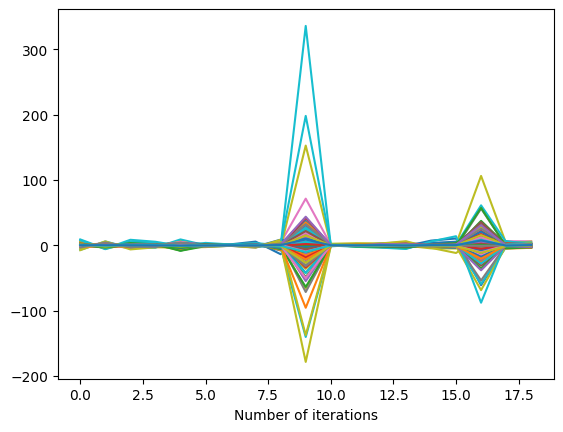

In [21]:
c = []
weights = np.insert(weights, 0, np.ones(131), 0)
for i in range(131,150):
    pl, weights_contribution = lu(weights[0:i], permute_l=True)
    weights_contribution = np.nan_to_num(weights_contribution)
#     print(weights_contribution)
    out = solve(weights_contribution, np.ones(131))
    print(out)
    out = out/out[-9]
    c.append(out)
c = np.array(c)
c_T = c.T
ran = [i for i in range(len(c_T[0]))]
for i in range(len(c_T)):
    plt.plot(ran, c_T[i])
plt.xlabel("Number of iterations")
# plt.savefig('./Gold/condensed/{}_contribution_calculation_iteration.png'.format(name_prefix), dpi=300, bbox_inches='tight')


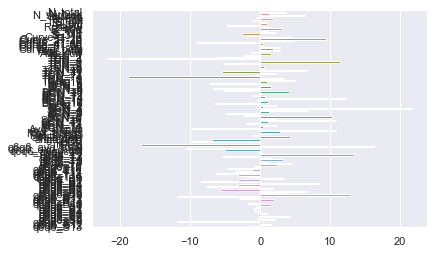

In [40]:
import seaborn as sns; sns.set()
sns.set(color_codes=True)
sns.set(font_scale=1)

sns.barplot(c[-1], feature_names)
plt.savefig('./Gold/{}_contribution_calculation.png'.format(name_prefix), dpi=300, bbox_inches='tight')


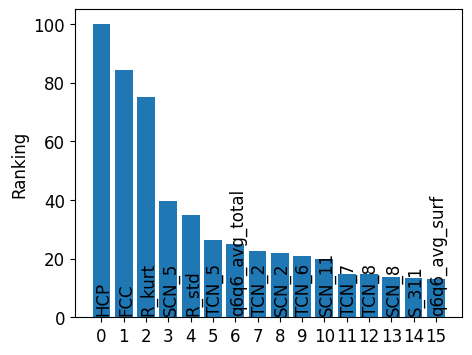

In [23]:
fig_FI_contribution_cal = plot_feature_importance(feature_names, c[-4],15)

In [24]:
fig_FI_contribution_cal.savefig('./New_figures/condensed/{}_cc.png'.format(name_prefix), dpi=300, bbox_inches='tight')


In [ ]:
# Contribution calculation requries 

In [ ]:
# We find the contribution and coefficient relationship through previous method (benchmark)
weights_output = np.zeros(np.shape(weights))
X_data = []
y_data = []
contribution_set = np.round(contribution_set, 4)
for j in range(len(weights)):
    for i in range(len(X[-1])):
        array_aux = np.ones(np.shape(X))
        array_aux[:,i] = 1-weights[j][i]
#         banchmark
        con_feature = contribution_set[i][0]
        X_new = array_aux * X
        results_new = base_model.evaluate(X_new, y, batch_size=10)
        results_round = np.round(results_new[0],4)
#         the loss change to banchmark
        con = abs(24.7673-results_new[0])
#         weights_output[j][i] = con/con_feature
        
        weight = weights[j][i]
        print(con, weight)

        weights_output[j][i] = con/con_feature

#     break

In [20]:
fig_FI_gold_weights = feature_model.layers[1].weights[0].numpy()[0]
print(fig_FI_gold_weights)
fig_FI_gold_weights = np.subtract(fig_FI_gold_weights, 1)
fig_FI_gold_weights

[ 0.5446293   0.8764322  -0.4098497   0.11982936  0.5797961   1.2371464
 -0.01760024  0.26248124  0.8617725   0.53924763 -0.2762348   0.29842606
  1.0504353   0.53771746 -0.02169958  0.6351433   0.90923417  1.0880257
  0.54129946  0.678493    0.34117424  0.0148221  -0.39025164 -0.60637236
  0.6679672   0.24130516 -0.3477933   0.59055173  0.29962054  0.12336271
 -0.41855422  0.84672743  1.07851     0.781441    1.3717048 ]


array([-0.45537072, -0.12356782, -1.4098496 , -0.88017064, -0.42020392,
        0.23714638, -1.0176003 , -0.7375188 , -0.13822752, -0.46075237,
       -1.2762349 , -0.70157397,  0.0504353 , -0.46228254, -1.0216995 ,
       -0.36485672, -0.09076583,  0.08802569, -0.45870054, -0.32150698,
       -0.65882576, -0.9851779 , -1.3902516 , -1.6063724 , -0.3320328 ,
       -0.7586948 , -1.3477933 , -0.40944827, -0.7003795 , -0.8766373 ,
       -1.4185542 , -0.15327257,  0.07851005, -0.21855903,  0.37170482],
      dtype=float32)

In [103]:
base_model_weights = base_model.layers[0].weights[0].numpy()
base_model_weights = np.reshape(base_model_weights, (35))

In [67]:
X_features

,N_bulk,Avg_bulk,BCN_5,BCN_6,BCN_7,BCN_8,BCN_9,BCN_10,BCN_11,BCN_12,...,q6q6_B6,q6q6_B7,q6q6_B8,q6q6_B9,q6q6_B10,q6q6_B11,q6q6_B12,q6q6_B13,q6q6_B14,q6q6_B15
0,1014,12.5552,0,0,0,0,0,0,70,434,...,29,29,27,30,17,25,30,7,2,0
1,1034,12.4952,0,0,0,0,0,4,73,470,...,45,40,36,25,26,22,19,10,2,0
2,3365,12.3902,0,0,0,0,0,4,172,1898,...,150,168,212,224,236,281,959,247,21,0
3,5292,12.3027,0,0,1,0,2,35,191,3407,...,87,112,193,204,285,489,2775,732,117,0
4,8508,12.2159,0,0,0,2,9,56,357,5993,...,112,169,307,317,429,645,5029,982,136,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,950,11.8126,0,0,0,1,14,82,255,362,...,1,0,0,0,0,0,0,0,0,0
3996,1469,11.7971,0,0,0,1,22,124,411,552,...,1,0,1,1,0,0,0,0,0,0
3997,1905,11.7948,0,0,0,2,21,159,536,736,...,1,0,1,0,0,0,0,0,0,0
3998,2199,11.8058,0,0,0,1,26,217,584,801,...,1,2,1,1,0,0,0,0,0,0


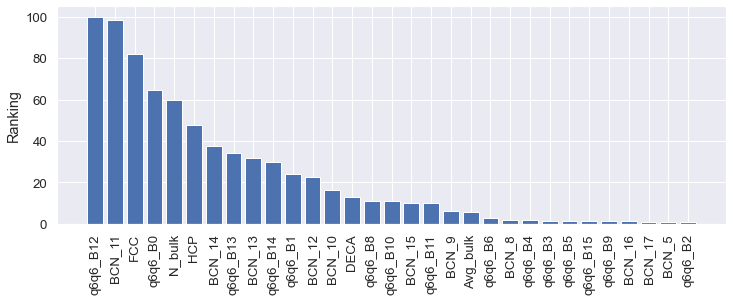

In [122]:
fig_FI_gold = utilities.plot_feature_importance(feature_set_bulk, base_model_weights)